CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchsummary import summary

CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")
device

CUDA Available? True


device(type='cuda')

CODE BLOCK: 3

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 115841080.30it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 113210928.81it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 36107339.03it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21648328.15it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



CODE BLOCK: 5

In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

CODE BLOCK: 6

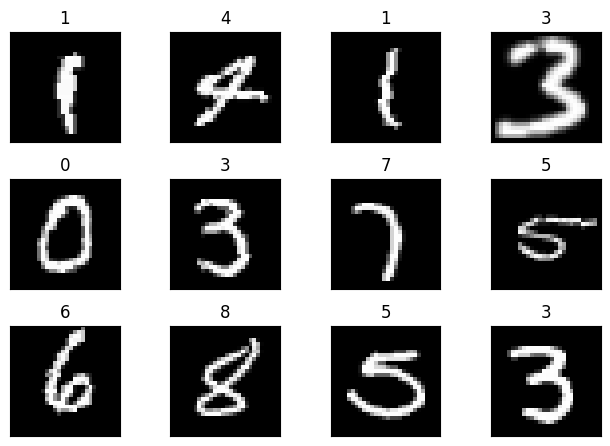

In [6]:
batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [31]:
from model import Net
from utils import *

In [26]:
cd Assignment 5/

/content/Assignment 5


In [11]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


CODE BLOCK: 8

In [12]:
# Data to plot accuracy and loss graphs


test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 8

CODE BLOCK: 9

In [32]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20
criterion = nn.CrossEntropyLoss()

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.3094 Batch_id=1 Accuracy=9.38:   1%|          | 1/118 [00:00<00:58,  2.01it/s]

Pred done
Pred done


Train: Loss=2.3050 Batch_id=3 Accuracy=9.62:   3%|▎         | 4/118 [00:00<00:22,  5.07it/s]

Pred done
Pred done


Train: Loss=2.2952 Batch_id=4 Accuracy=9.57:   4%|▍         | 5/118 [00:01<00:22,  5.04it/s]

Pred done
Pred done


Train: Loss=2.3006 Batch_id=6 Accuracy=9.68:   6%|▌         | 7/118 [00:01<00:20,  5.51it/s]

Pred done
Pred done


Train: Loss=2.3014 Batch_id=8 Accuracy=9.53:   8%|▊         | 9/118 [00:01<00:19,  5.48it/s]

Pred done


Train: Loss=2.2968 Batch_id=10 Accuracy=9.59:   9%|▉         | 11/118 [00:02<00:18,  5.81it/s]

Pred done
Pred done


Train: Loss=2.2929 Batch_id=11 Accuracy=9.59:  10%|█         | 12/118 [00:02<00:20,  5.24it/s]

Pred done
Pred done


Train: Loss=2.2873 Batch_id=14 Accuracy=9.71:  13%|█▎        | 15/118 [00:02<00:17,  5.86it/s]

Pred done
Pred done


Train: Loss=2.2838 Batch_id=16 Accuracy=9.96:  14%|█▎        | 16/118 [00:03<00:20,  5.00it/s]

Pred done
Pred done


Train: Loss=2.2753 Batch_id=18 Accuracy=10.95:  15%|█▌        | 18/118 [00:03<00:19,  5.25it/s]

Pred done
Pred done


Train: Loss=2.2722 Batch_id=20 Accuracy=11.69:  17%|█▋        | 20/118 [00:03<00:17,  5.48it/s]

Pred done
Pred done


Train: Loss=2.2602 Batch_id=21 Accuracy=12.12:  19%|█▊        | 22/118 [00:04<00:16,  5.86it/s]

Pred done
Pred done


Train: Loss=2.2525 Batch_id=23 Accuracy=13.21:  20%|██        | 24/118 [00:04<00:16,  5.85it/s]

Pred done


Train: Loss=2.2375 Batch_id=25 Accuracy=14.32:  21%|██        | 25/118 [00:04<00:18,  5.08it/s]

Pred done
Pred done


Train: Loss=2.2162 Batch_id=27 Accuracy=15.75:  23%|██▎       | 27/118 [00:05<00:17,  5.24it/s]

Pred done
Pred done


Train: Loss=2.1896 Batch_id=29 Accuracy=17.15:  25%|██▍       | 29/118 [00:05<00:17,  5.23it/s]

Pred done
Pred done


Train: Loss=2.1538 Batch_id=31 Accuracy=18.84:  26%|██▋       | 31/118 [00:05<00:16,  5.29it/s]

Pred done
Pred done


Train: Loss=2.0959 Batch_id=33 Accuracy=20.77:  28%|██▊       | 33/118 [00:06<00:16,  5.18it/s]

Pred done
Pred done


Train: Loss=2.0193 Batch_id=35 Accuracy=22.52:  30%|██▉       | 35/118 [00:07<00:20,  4.11it/s]

Pred done
Pred done


Train: Loss=1.8686 Batch_id=37 Accuracy=24.02:  31%|███▏      | 37/118 [00:07<00:21,  3.82it/s]

Pred done
Pred done


Train: Loss=1.6342 Batch_id=39 Accuracy=25.64:  33%|███▎      | 39/118 [00:08<00:19,  4.04it/s]

Pred done
Pred done


Train: Loss=1.3782 Batch_id=41 Accuracy=27.32:  35%|███▍      | 41/118 [00:08<00:20,  3.82it/s]

Pred done
Pred done


Train: Loss=1.1509 Batch_id=43 Accuracy=29.11:  36%|███▋      | 43/118 [00:09<00:19,  3.80it/s]

Pred done
Pred done


Train: Loss=1.1700 Batch_id=45 Accuracy=30.70:  38%|███▊      | 45/118 [00:09<00:17,  4.09it/s]

Pred done
Pred done


Train: Loss=3.8402 Batch_id=47 Accuracy=31.42:  40%|███▉      | 47/118 [00:09<00:15,  4.51it/s]

Pred done
Pred done


Train: Loss=2.7171 Batch_id=49 Accuracy=31.74:  42%|████▏     | 49/118 [00:10<00:14,  4.73it/s]

Pred done
Pred done


Train: Loss=1.9414 Batch_id=51 Accuracy=32.15:  43%|████▎     | 51/118 [00:10<00:13,  4.86it/s]

Pred done
Pred done


Train: Loss=2.0981 Batch_id=53 Accuracy=32.56:  45%|████▍     | 53/118 [00:11<00:12,  5.02it/s]

Pred done
Pred done


Train: Loss=2.1262 Batch_id=55 Accuracy=32.76:  47%|████▋     | 55/118 [00:11<00:12,  5.08it/s]

Pred done
Pred done


Train: Loss=2.0927 Batch_id=57 Accuracy=32.95:  48%|████▊     | 57/118 [00:11<00:11,  5.11it/s]

Pred done
Pred done


Train: Loss=2.0809 Batch_id=59 Accuracy=33.22:  50%|█████     | 59/118 [00:12<00:11,  5.13it/s]

Pred done
Pred done


Train: Loss=1.9983 Batch_id=61 Accuracy=33.68:  52%|█████▏    | 61/118 [00:12<00:10,  5.32it/s]

Pred done
Pred done


Train: Loss=1.9012 Batch_id=63 Accuracy=34.30:  53%|█████▎    | 63/118 [00:12<00:09,  5.52it/s]

Pred done
Pred done


Train: Loss=1.7819 Batch_id=65 Accuracy=34.96:  55%|█████▌    | 65/118 [00:13<00:09,  5.40it/s]

Pred done
Pred done


Train: Loss=1.5431 Batch_id=67 Accuracy=35.58:  57%|█████▋    | 67/118 [00:13<00:09,  5.64it/s]

Pred done
Pred done


Train: Loss=1.2945 Batch_id=69 Accuracy=36.23:  58%|█████▊    | 69/118 [00:13<00:08,  5.56it/s]

Pred done
Pred done


Train: Loss=1.1009 Batch_id=71 Accuracy=36.94:  60%|██████    | 71/118 [00:14<00:08,  5.65it/s]

Pred done
Pred done


Train: Loss=0.8278 Batch_id=73 Accuracy=37.92:  62%|██████▏   | 73/118 [00:14<00:07,  5.81it/s]

Pred done
Pred done


Train: Loss=0.7953 Batch_id=75 Accuracy=38.88:  64%|██████▎   | 75/118 [00:14<00:07,  5.94it/s]

Pred done
Pred done


Train: Loss=0.8768 Batch_id=77 Accuracy=39.75:  65%|██████▌   | 77/118 [00:15<00:07,  5.77it/s]

Pred done
Pred done


Train: Loss=0.7299 Batch_id=79 Accuracy=40.66:  67%|██████▋   | 79/118 [00:15<00:06,  5.77it/s]

Pred done
Pred done


Train: Loss=0.5389 Batch_id=81 Accuracy=41.54:  69%|██████▊   | 81/118 [00:16<00:06,  5.43it/s]

Pred done
Pred done


Train: Loss=0.6500 Batch_id=83 Accuracy=42.45:  70%|███████   | 83/118 [00:16<00:06,  5.57it/s]

Pred done
Pred done


Train: Loss=0.5935 Batch_id=85 Accuracy=43.36:  72%|███████▏  | 85/118 [00:16<00:05,  5.68it/s]

Pred done
Pred done


Train: Loss=0.4853 Batch_id=87 Accuracy=44.30:  74%|███████▎  | 87/118 [00:17<00:05,  5.54it/s]

Pred done
Pred done


Train: Loss=0.4501 Batch_id=89 Accuracy=45.21:  75%|███████▌  | 89/118 [00:17<00:05,  5.51it/s]

Pred done
Pred done


Train: Loss=0.4696 Batch_id=91 Accuracy=46.11:  77%|███████▋  | 91/118 [00:17<00:04,  5.43it/s]

Pred done
Pred done


Train: Loss=0.4580 Batch_id=93 Accuracy=46.99:  79%|███████▉  | 93/118 [00:18<00:04,  5.54it/s]

Pred done
Pred done


Train: Loss=0.3628 Batch_id=95 Accuracy=47.83:  81%|████████  | 95/118 [00:18<00:04,  5.72it/s]

Pred done
Pred done


Train: Loss=0.3640 Batch_id=97 Accuracy=48.63:  82%|████████▏ | 97/118 [00:18<00:03,  5.49it/s]

Pred done
Pred done


Train: Loss=0.4328 Batch_id=99 Accuracy=49.43:  84%|████████▍ | 99/118 [00:19<00:03,  5.39it/s]

Pred done
Pred done


Train: Loss=0.3853 Batch_id=101 Accuracy=50.18:  86%|████████▌ | 101/118 [00:19<00:03,  5.27it/s]

Pred done
Pred done


Train: Loss=0.2947 Batch_id=103 Accuracy=50.93:  87%|████████▋ | 103/118 [00:20<00:03,  4.47it/s]

Pred done
Pred done


Train: Loss=0.3570 Batch_id=105 Accuracy=51.63:  89%|████████▉ | 105/118 [00:20<00:03,  4.24it/s]

Pred done
Pred done


Train: Loss=0.3359 Batch_id=107 Accuracy=52.37:  91%|█████████ | 107/118 [00:21<00:02,  3.87it/s]

Pred done
Pred done


Train: Loss=0.3171 Batch_id=109 Accuracy=53.07:  92%|█████████▏| 109/118 [00:22<00:02,  3.65it/s]

Pred done
Pred done


Train: Loss=0.2896 Batch_id=111 Accuracy=53.77:  94%|█████████▍| 111/118 [00:22<00:01,  3.74it/s]

Pred done
Pred done


Train: Loss=0.3034 Batch_id=113 Accuracy=54.41:  96%|█████████▌| 113/118 [00:22<00:01,  4.21it/s]

Pred done
Pred done


Train: Loss=0.2971 Batch_id=115 Accuracy=55.02:  97%|█████████▋| 115/118 [00:23<00:00,  4.80it/s]

Pred done
Pred done


Train: Loss=0.3215 Batch_id=117 Accuracy=55.38: 100%|██████████| 118/118 [00:23<00:00,  5.02it/s]

Pred done
Pred done


Test set: Average loss: 0.2425, Accuracy: 9219/10000 (92.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.3935 Batch_id=1 Accuracy=89.36:   1%|          | 1/118 [00:00<00:54,  2.15it/s]

Pred done
Pred done


Train: Loss=0.2969 Batch_id=3 Accuracy=90.72:   3%|▎         | 3/118 [00:00<00:29,  3.94it/s]

Pred done
Pred done


Train: Loss=0.2671 Batch_id=5 Accuracy=90.79:   4%|▍         | 5/118 [00:01<00:23,  4.86it/s]

Pred done
Pred done


Train: Loss=0.2518 Batch_id=7 Accuracy=90.94:   6%|▌         | 7/118 [00:01<00:21,  5.12it/s]

Pred done
Pred done


Train: Loss=0.2355 Batch_id=9 Accuracy=91.52:   8%|▊         | 9/118 [00:01<00:20,  5.26it/s]

Pred done
Pred done


Train: Loss=0.3309 Batch_id=11 Accuracy=91.41:   9%|▉         | 11/118 [00:02<00:19,  5.49it/s]

Pred done
Pred done


Train: Loss=0.2135 Batch_id=13 Accuracy=91.60:  11%|█         | 13/118 [00:02<00:19,  5.45it/s]

Pred done
Pred done


Train: Loss=0.2362 Batch_id=15 Accuracy=91.53:  13%|█▎        | 15/118 [00:02<00:18,  5.48it/s]

Pred done
Pred done


Train: Loss=0.2333 Batch_id=17 Accuracy=91.70:  14%|█▍        | 17/118 [00:03<00:18,  5.60it/s]

Pred done
Pred done


Train: Loss=0.2678 Batch_id=19 Accuracy=91.75:  16%|█▌        | 19/118 [00:03<00:17,  5.74it/s]

Pred done
Pred done


Train: Loss=0.1905 Batch_id=21 Accuracy=91.95:  19%|█▊        | 22/118 [00:04<00:15,  6.20it/s]

Pred done
Pred done


Train: Loss=0.2821 Batch_id=23 Accuracy=91.92:  20%|██        | 24/118 [00:04<00:15,  6.01it/s]

Pred done
Pred done


Train: Loss=0.2583 Batch_id=25 Accuracy=91.93:  21%|██        | 25/118 [00:04<00:17,  5.27it/s]

Pred done
Pred done


Train: Loss=0.1904 Batch_id=27 Accuracy=91.99:  24%|██▎       | 28/118 [00:05<00:15,  5.72it/s]

Pred done
Pred done


Train: Loss=0.1724 Batch_id=29 Accuracy=92.05:  25%|██▌       | 30/118 [00:05<00:15,  5.81it/s]

Pred done
Pred done


Train: Loss=0.2091 Batch_id=30 Accuracy=92.14:  26%|██▋       | 31/118 [00:05<00:16,  5.31it/s]

Pred done
Pred done


Train: Loss=0.2012 Batch_id=32 Accuracy=92.23:  28%|██▊       | 33/118 [00:06<00:15,  5.39it/s]

Pred done
Pred done


Train: Loss=0.1821 Batch_id=34 Accuracy=92.33:  30%|██▉       | 35/118 [00:06<00:16,  5.11it/s]

Pred done
Pred done


Train: Loss=0.2325 Batch_id=36 Accuracy=92.40:  31%|███▏      | 37/118 [00:06<00:15,  5.27it/s]

Pred done


Train: Loss=0.2182 Batch_id=38 Accuracy=92.51:  33%|███▎      | 39/118 [00:07<00:17,  4.50it/s]

Pred done
Pred done


Train: Loss=0.1923 Batch_id=40 Accuracy=92.64:  35%|███▍      | 41/118 [00:08<00:19,  3.96it/s]

Pred done
Pred done


Train: Loss=0.1907 Batch_id=41 Accuracy=92.69:  36%|███▌      | 42/118 [00:08<00:23,  3.21it/s]

Pred done


Train: Loss=0.1614 Batch_id=42 Accuracy=92.74:  36%|███▋      | 43/118 [00:08<00:21,  3.55it/s]

Pred done


Train: Loss=0.2182 Batch_id=43 Accuracy=92.72:  37%|███▋      | 44/118 [00:09<00:24,  3.05it/s]

Pred done


Train: Loss=0.1976 Batch_id=44 Accuracy=92.72:  38%|███▊      | 45/118 [00:09<00:23,  3.16it/s]

Pred done


Train: Loss=0.1574 Batch_id=46 Accuracy=92.80:  39%|███▉      | 46/118 [00:09<00:24,  2.93it/s]

Pred done
Pred done


Train: Loss=0.1864 Batch_id=48 Accuracy=92.89:  41%|████      | 48/118 [00:10<00:19,  3.65it/s]

Pred done
Pred done


Train: Loss=0.2635 Batch_id=50 Accuracy=92.88:  42%|████▏     | 50/118 [00:10<00:16,  4.09it/s]

Pred done
Pred done


Train: Loss=0.1411 Batch_id=52 Accuracy=92.97:  44%|████▍     | 52/118 [00:11<00:14,  4.65it/s]

Pred done
Pred done


Train: Loss=0.2282 Batch_id=54 Accuracy=93.00:  46%|████▌     | 54/118 [00:11<00:13,  4.72it/s]

Pred done
Pred done


Train: Loss=0.1671 Batch_id=56 Accuracy=93.09:  47%|████▋     | 56/118 [00:11<00:12,  5.03it/s]

Pred done
Pred done


Train: Loss=0.1599 Batch_id=58 Accuracy=93.16:  49%|████▉     | 58/118 [00:12<00:11,  5.04it/s]

Pred done
Pred done


Train: Loss=0.1499 Batch_id=60 Accuracy=93.23:  51%|█████     | 60/118 [00:12<00:11,  5.05it/s]

Pred done
Pred done


Train: Loss=0.1420 Batch_id=62 Accuracy=93.31:  53%|█████▎    | 62/118 [00:12<00:11,  5.08it/s]

Pred done
Pred done


Train: Loss=0.1870 Batch_id=64 Accuracy=93.35:  54%|█████▍    | 64/118 [00:13<00:10,  5.14it/s]

Pred done
Pred done


Train: Loss=0.1616 Batch_id=66 Accuracy=93.40:  56%|█████▌    | 66/118 [00:13<00:10,  5.06it/s]

Pred done
Pred done


Train: Loss=0.1865 Batch_id=68 Accuracy=93.44:  58%|█████▊    | 68/118 [00:14<00:09,  5.08it/s]

Pred done
Pred done


Train: Loss=0.1126 Batch_id=70 Accuracy=93.52:  59%|█████▉    | 70/118 [00:14<00:09,  5.07it/s]

Pred done
Pred done


Train: Loss=0.1589 Batch_id=72 Accuracy=93.56:  61%|██████    | 72/118 [00:14<00:09,  5.10it/s]

Pred done
Pred done


Train: Loss=0.1979 Batch_id=74 Accuracy=93.58:  63%|██████▎   | 74/118 [00:15<00:08,  5.15it/s]

Pred done
Pred done


Train: Loss=0.1024 Batch_id=76 Accuracy=93.63:  64%|██████▍   | 76/118 [00:15<00:08,  5.05it/s]

Pred done
Pred done


Train: Loss=0.1306 Batch_id=78 Accuracy=93.71:  66%|██████▌   | 78/118 [00:16<00:07,  5.28it/s]

Pred done
Pred done


Train: Loss=0.1540 Batch_id=80 Accuracy=93.76:  68%|██████▊   | 80/118 [00:16<00:07,  5.20it/s]

Pred done
Pred done


Train: Loss=0.1629 Batch_id=82 Accuracy=93.79:  69%|██████▉   | 82/118 [00:16<00:06,  5.19it/s]

Pred done
Pred done


Train: Loss=0.1801 Batch_id=84 Accuracy=93.79:  71%|███████   | 84/118 [00:17<00:06,  5.41it/s]

Pred done
Pred done


Train: Loss=0.1753 Batch_id=86 Accuracy=93.82:  73%|███████▎  | 86/118 [00:17<00:06,  5.26it/s]

Pred done
Pred done


Train: Loss=0.1187 Batch_id=88 Accuracy=93.85:  75%|███████▍  | 88/118 [00:17<00:05,  5.19it/s]

Pred done
Pred done


Train: Loss=0.1239 Batch_id=90 Accuracy=93.89:  76%|███████▋  | 90/118 [00:18<00:05,  4.97it/s]

Pred done
Pred done


Train: Loss=0.1095 Batch_id=92 Accuracy=93.93:  78%|███████▊  | 92/118 [00:18<00:05,  5.05it/s]

Pred done
Pred done


Train: Loss=0.1435 Batch_id=94 Accuracy=93.97:  80%|███████▉  | 94/118 [00:19<00:04,  5.12it/s]

Pred done
Pred done


Train: Loss=0.1035 Batch_id=96 Accuracy=94.03:  81%|████████▏ | 96/118 [00:19<00:04,  5.16it/s]

Pred done
Pred done


Train: Loss=0.0958 Batch_id=98 Accuracy=94.06:  83%|████████▎ | 98/118 [00:19<00:03,  5.12it/s]

Pred done
Pred done


Train: Loss=0.1631 Batch_id=100 Accuracy=94.08:  85%|████████▍ | 100/118 [00:20<00:04,  4.07it/s]

Pred done
Pred done


Train: Loss=0.1047 Batch_id=102 Accuracy=94.12:  86%|████████▋ | 102/118 [00:21<00:04,  3.62it/s]

Pred done
Pred done


Train: Loss=0.1507 Batch_id=104 Accuracy=94.13:  88%|████████▊ | 104/118 [00:22<00:04,  3.47it/s]

Pred done
Pred done


Train: Loss=0.1178 Batch_id=106 Accuracy=94.14:  90%|████████▉ | 106/118 [00:22<00:03,  3.28it/s]

Pred done
Pred done


Train: Loss=0.1615 Batch_id=108 Accuracy=94.15:  92%|█████████▏| 108/118 [00:23<00:02,  3.47it/s]

Pred done
Pred done


Train: Loss=0.1473 Batch_id=110 Accuracy=94.18:  93%|█████████▎| 110/118 [00:23<00:02,  3.68it/s]

Pred done
Pred done


Train: Loss=0.1237 Batch_id=112 Accuracy=94.21:  95%|█████████▍| 112/118 [00:24<00:01,  4.07it/s]

Pred done
Pred done


Train: Loss=0.1460 Batch_id=114 Accuracy=94.24:  97%|█████████▋| 114/118 [00:24<00:00,  4.22it/s]

Pred done
Pred done


Train: Loss=0.1584 Batch_id=117 Accuracy=94.25: 100%|██████████| 118/118 [00:24<00:00,  4.77it/s]

Pred done
Pred done
Pred done


Test set: Average loss: 0.0831, Accuracy: 9744/10000 (97.44%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1893 Batch_id=1 Accuracy=95.51:   1%|          | 1/118 [00:00<00:58,  2.01it/s]

Pred done
Pred done


Train: Loss=0.1371 Batch_id=3 Accuracy=95.80:   3%|▎         | 3/118 [00:00<00:30,  3.83it/s]

Pred done
Pred done


Train: Loss=0.1665 Batch_id=5 Accuracy=95.54:   4%|▍         | 5/118 [00:01<00:24,  4.57it/s]

Pred done
Pred done


Train: Loss=0.1242 Batch_id=7 Accuracy=95.58:   6%|▌         | 7/118 [00:01<00:22,  4.92it/s]

Pred done
Pred done


Train: Loss=0.1294 Batch_id=9 Accuracy=95.62:   8%|▊         | 9/118 [00:02<00:21,  5.01it/s]

Pred done
Pred done


Train: Loss=0.1683 Batch_id=11 Accuracy=95.62:   9%|▉         | 11/118 [00:02<00:21,  5.05it/s]

Pred done
Pred done


Train: Loss=0.1127 Batch_id=13 Accuracy=95.68:  11%|█         | 13/118 [00:02<00:20,  5.03it/s]

Pred done
Pred done


Train: Loss=0.1536 Batch_id=15 Accuracy=95.69:  13%|█▎        | 15/118 [00:03<00:20,  4.99it/s]

Pred done
Pred done


Train: Loss=0.0843 Batch_id=17 Accuracy=95.82:  14%|█▍        | 17/118 [00:03<00:19,  5.11it/s]

Pred done
Pred done


Train: Loss=0.1310 Batch_id=19 Accuracy=95.82:  16%|█▌        | 19/118 [00:03<00:18,  5.22it/s]

Pred done
Pred done


Train: Loss=0.1202 Batch_id=21 Accuracy=95.82:  18%|█▊        | 21/118 [00:04<00:18,  5.36it/s]

Pred done
Pred done


Train: Loss=0.1252 Batch_id=23 Accuracy=95.82:  19%|█▉        | 23/118 [00:04<00:17,  5.42it/s]

Pred done
Pred done


Train: Loss=0.1120 Batch_id=25 Accuracy=95.86:  21%|██        | 25/118 [00:05<00:17,  5.44it/s]

Pred done
Pred done


Train: Loss=0.0859 Batch_id=27 Accuracy=95.87:  23%|██▎       | 27/118 [00:05<00:16,  5.63it/s]

Pred done
Pred done


Train: Loss=0.1163 Batch_id=29 Accuracy=95.90:  25%|██▍       | 29/118 [00:05<00:16,  5.33it/s]

Pred done
Pred done


Train: Loss=0.1223 Batch_id=30 Accuracy=95.88:  26%|██▋       | 31/118 [00:06<00:16,  5.37it/s]

Pred done


Train: Loss=0.1463 Batch_id=31 Accuracy=95.84:  27%|██▋       | 32/118 [00:06<00:16,  5.25it/s]

Pred done


Train: Loss=0.1317 Batch_id=32 Accuracy=95.83:  28%|██▊       | 33/118 [00:06<00:18,  4.52it/s]

Pred done


Train: Loss=0.0976 Batch_id=33 Accuracy=95.88:  29%|██▉       | 34/118 [00:06<00:18,  4.49it/s]

Pred done


Train: Loss=0.0991 Batch_id=34 Accuracy=95.91:  30%|██▉       | 35/118 [00:07<00:22,  3.68it/s]

Pred done


Train: Loss=0.1015 Batch_id=35 Accuracy=95.93:  31%|███       | 36/118 [00:07<00:22,  3.66it/s]

Pred done


Train: Loss=0.1057 Batch_id=36 Accuracy=95.96:  31%|███▏      | 37/118 [00:07<00:23,  3.40it/s]

Pred done


Train: Loss=0.1115 Batch_id=37 Accuracy=95.97:  32%|███▏      | 38/118 [00:08<00:24,  3.31it/s]

Pred done


Train: Loss=0.1082 Batch_id=38 Accuracy=95.99:  33%|███▎      | 39/118 [00:08<00:26,  2.95it/s]

Pred done


Train: Loss=0.1529 Batch_id=39 Accuracy=95.98:  34%|███▍      | 40/118 [00:08<00:24,  3.13it/s]

Pred done


Train: Loss=0.1084 Batch_id=40 Accuracy=95.99:  35%|███▍      | 41/118 [00:09<00:22,  3.40it/s]

Pred done
Pred done


Train: Loss=0.1156 Batch_id=42 Accuracy=96.00:  36%|███▋      | 43/118 [00:09<00:18,  4.13it/s]

Pred done


Train: Loss=0.1513 Batch_id=44 Accuracy=96.04:  37%|███▋      | 44/118 [00:09<00:17,  4.24it/s]

Pred done
Pred done


Train: Loss=0.1127 Batch_id=45 Accuracy=96.04:  39%|███▉      | 46/118 [00:10<00:16,  4.44it/s]

Pred done
Pred done


Train: Loss=0.1119 Batch_id=47 Accuracy=96.03:  41%|████      | 48/118 [00:10<00:15,  4.46it/s]

Pred done


Train: Loss=0.0714 Batch_id=49 Accuracy=96.08:  42%|████▏     | 49/118 [00:10<00:16,  4.19it/s]

Pred done
Pred done


Train: Loss=0.1148 Batch_id=51 Accuracy=96.08:  43%|████▎     | 51/118 [00:11<00:15,  4.28it/s]

Pred done
Pred done


Train: Loss=0.1597 Batch_id=53 Accuracy=96.07:  45%|████▍     | 53/118 [00:11<00:14,  4.41it/s]

Pred done
Pred done


Train: Loss=0.1058 Batch_id=55 Accuracy=96.07:  47%|████▋     | 55/118 [00:12<00:13,  4.81it/s]

Pred done
Pred done


Train: Loss=0.1684 Batch_id=57 Accuracy=96.05:  48%|████▊     | 57/118 [00:12<00:12,  4.76it/s]

Pred done
Pred done


Train: Loss=0.1185 Batch_id=59 Accuracy=96.10:  50%|█████     | 59/118 [00:12<00:12,  4.91it/s]

Pred done
Pred done


Train: Loss=0.0882 Batch_id=61 Accuracy=96.16:  52%|█████▏    | 61/118 [00:13<00:11,  4.97it/s]

Pred done
Pred done


Train: Loss=0.1350 Batch_id=63 Accuracy=96.16:  53%|█████▎    | 63/118 [00:13<00:11,  4.89it/s]

Pred done
Pred done


Train: Loss=0.0855 Batch_id=65 Accuracy=96.18:  55%|█████▌    | 65/118 [00:14<00:10,  4.95it/s]

Pred done
Pred done


Train: Loss=0.1453 Batch_id=67 Accuracy=96.15:  57%|█████▋    | 67/118 [00:14<00:10,  5.00it/s]

Pred done
Pred done


Train: Loss=0.1006 Batch_id=69 Accuracy=96.16:  58%|█████▊    | 69/118 [00:14<00:09,  5.07it/s]

Pred done
Pred done


Train: Loss=0.0786 Batch_id=71 Accuracy=96.16:  60%|██████    | 71/118 [00:15<00:09,  5.09it/s]

Pred done
Pred done


Train: Loss=0.1175 Batch_id=73 Accuracy=96.18:  62%|██████▏   | 73/118 [00:15<00:08,  5.30it/s]

Pred done
Pred done


Train: Loss=0.1210 Batch_id=75 Accuracy=96.18:  64%|██████▎   | 75/118 [00:16<00:08,  5.14it/s]

Pred done
Pred done


Train: Loss=0.0997 Batch_id=77 Accuracy=96.20:  65%|██████▌   | 77/118 [00:16<00:07,  5.22it/s]

Pred done
Pred done


Train: Loss=0.0785 Batch_id=79 Accuracy=96.19:  67%|██████▋   | 79/118 [00:16<00:07,  5.25it/s]

Pred done
Pred done


Train: Loss=0.1262 Batch_id=81 Accuracy=96.19:  69%|██████▊   | 81/118 [00:17<00:06,  5.32it/s]

Pred done
Pred done


Train: Loss=0.1242 Batch_id=83 Accuracy=96.21:  70%|███████   | 83/118 [00:17<00:06,  5.37it/s]

Pred done
Pred done


Train: Loss=0.1078 Batch_id=85 Accuracy=96.21:  72%|███████▏  | 85/118 [00:17<00:06,  5.37it/s]

Pred done
Pred done


Train: Loss=0.1176 Batch_id=87 Accuracy=96.20:  74%|███████▎  | 87/118 [00:18<00:05,  5.45it/s]

Pred done
Pred done


Train: Loss=0.1147 Batch_id=89 Accuracy=96.21:  75%|███████▌  | 89/118 [00:18<00:05,  5.46it/s]

Pred done
Pred done


Train: Loss=0.1066 Batch_id=91 Accuracy=96.22:  77%|███████▋  | 91/118 [00:19<00:04,  5.52it/s]

Pred done
Pred done


Train: Loss=0.1055 Batch_id=93 Accuracy=96.23:  79%|███████▉  | 93/118 [00:19<00:04,  5.20it/s]

Pred done
Pred done


Train: Loss=0.0835 Batch_id=95 Accuracy=96.24:  81%|████████  | 95/118 [00:20<00:05,  4.59it/s]

Pred done
Pred done


Train: Loss=0.1838 Batch_id=97 Accuracy=96.22:  82%|████████▏ | 97/118 [00:20<00:05,  4.04it/s]

Pred done
Pred done


Train: Loss=0.0908 Batch_id=99 Accuracy=96.23:  84%|████████▍ | 99/118 [00:21<00:05,  3.79it/s]

Pred done
Pred done


Train: Loss=0.0914 Batch_id=101 Accuracy=96.25:  86%|████████▌ | 101/118 [00:21<00:04,  3.61it/s]

Pred done
Pred done


Train: Loss=0.1118 Batch_id=103 Accuracy=96.25:  87%|████████▋ | 103/118 [00:22<00:03,  3.94it/s]

Pred done
Pred done


Train: Loss=0.0945 Batch_id=105 Accuracy=96.26:  89%|████████▉ | 105/118 [00:22<00:02,  4.39it/s]

Pred done
Pred done


Train: Loss=0.0847 Batch_id=107 Accuracy=96.27:  91%|█████████ | 107/118 [00:23<00:02,  4.59it/s]

Pred done
Pred done


Train: Loss=0.0669 Batch_id=109 Accuracy=96.29:  92%|█████████▏| 109/118 [00:23<00:01,  4.74it/s]

Pred done
Pred done


Train: Loss=0.0885 Batch_id=111 Accuracy=96.31:  94%|█████████▍| 111/118 [00:23<00:01,  4.82it/s]

Pred done
Pred done


Train: Loss=0.1112 Batch_id=113 Accuracy=96.33:  96%|█████████▌| 113/118 [00:24<00:00,  5.01it/s]

Pred done
Pred done


Train: Loss=0.0896 Batch_id=115 Accuracy=96.34:  97%|█████████▋| 115/118 [00:24<00:00,  5.49it/s]

Pred done
Pred done


Train: Loss=0.1148 Batch_id=117 Accuracy=96.35: 100%|██████████| 118/118 [00:24<00:00,  4.78it/s]

Pred done
Pred done


Test set: Average loss: 0.0713, Accuracy: 9766/10000 (97.66%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1713 Batch_id=1 Accuracy=95.90:   1%|          | 1/118 [00:00<00:57,  2.03it/s]

Pred done
Pred done


Train: Loss=0.1487 Batch_id=3 Accuracy=96.39:   3%|▎         | 3/118 [00:00<00:28,  4.02it/s]

Pred done
Pred done


Train: Loss=0.1566 Batch_id=5 Accuracy=96.09:   4%|▍         | 5/118 [00:01<00:23,  4.86it/s]

Pred done
Pred done


Train: Loss=0.1020 Batch_id=6 Accuracy=96.29:   6%|▌         | 7/118 [00:01<00:21,  5.22it/s]

Pred done
Pred done


Train: Loss=0.1166 Batch_id=9 Accuracy=96.54:   8%|▊         | 10/118 [00:02<00:19,  5.66it/s]

Pred done
Pred done


Train: Loss=0.1469 Batch_id=11 Accuracy=96.39:   9%|▉         | 11/118 [00:02<00:20,  5.17it/s]

Pred done
Pred done


Train: Loss=0.1358 Batch_id=13 Accuracy=96.33:  11%|█         | 13/118 [00:02<00:20,  5.16it/s]

Pred done
Pred done


Train: Loss=0.1015 Batch_id=15 Accuracy=96.42:  13%|█▎        | 15/118 [00:03<00:19,  5.18it/s]

Pred done
Pred done


Train: Loss=0.1164 Batch_id=17 Accuracy=96.39:  14%|█▍        | 17/118 [00:03<00:18,  5.38it/s]

Pred done
Pred done


Train: Loss=0.0864 Batch_id=19 Accuracy=96.46:  17%|█▋        | 20/118 [00:03<00:15,  6.14it/s]

Pred done
Pred done


Train: Loss=0.1077 Batch_id=21 Accuracy=96.55:  19%|█▊        | 22/118 [00:04<00:15,  6.01it/s]

Pred done
Pred done


Train: Loss=0.0767 Batch_id=23 Accuracy=96.60:  20%|██        | 24/118 [00:04<00:15,  6.01it/s]

Pred done
Pred done


Train: Loss=0.1111 Batch_id=25 Accuracy=96.63:  21%|██        | 25/118 [00:04<00:18,  4.99it/s]

Pred done
Pred done


Train: Loss=0.0841 Batch_id=27 Accuracy=96.72:  24%|██▎       | 28/118 [00:05<00:16,  5.51it/s]

Pred done
Pred done


Train: Loss=0.0831 Batch_id=28 Accuracy=96.75:  25%|██▍       | 29/118 [00:05<00:21,  4.11it/s]

Pred done
Pred done


Train: Loss=0.1018 Batch_id=30 Accuracy=96.69:  26%|██▋       | 31/118 [00:06<00:23,  3.66it/s]

Pred done
Pred done


Train: Loss=0.0923 Batch_id=32 Accuracy=96.76:  28%|██▊       | 33/118 [00:06<00:25,  3.30it/s]

Pred done
Pred done


Train: Loss=0.1298 Batch_id=34 Accuracy=96.75:  30%|██▉       | 35/118 [00:07<00:24,  3.39it/s]

Pred done


Train: Loss=0.0861 Batch_id=35 Accuracy=96.77:  31%|███       | 36/118 [00:07<00:23,  3.56it/s]

Pred done


Train: Loss=0.1119 Batch_id=36 Accuracy=96.74:  31%|███▏      | 37/118 [00:08<00:22,  3.54it/s]

Pred done
Pred done


Train: Loss=0.1076 Batch_id=38 Accuracy=96.77:  33%|███▎      | 39/118 [00:08<00:18,  4.39it/s]

Pred done
Pred done


Train: Loss=0.0607 Batch_id=40 Accuracy=96.81:  35%|███▍      | 41/118 [00:08<00:15,  4.83it/s]

Pred done


Train: Loss=0.0866 Batch_id=42 Accuracy=96.80:  36%|███▋      | 43/118 [00:09<00:14,  5.30it/s]

Pred done
Pred done


Train: Loss=0.0910 Batch_id=44 Accuracy=96.80:  38%|███▊      | 45/118 [00:09<00:12,  5.68it/s]

Pred done
Pred done


Train: Loss=0.0640 Batch_id=46 Accuracy=96.81:  39%|███▉      | 46/118 [00:09<00:14,  5.03it/s]

Pred done
Pred done


Train: Loss=0.0724 Batch_id=48 Accuracy=96.86:  41%|████      | 48/118 [00:10<00:13,  5.16it/s]

Pred done
Pred done


Train: Loss=0.0933 Batch_id=50 Accuracy=96.87:  42%|████▏     | 50/118 [00:10<00:13,  5.22it/s]

Pred done
Pred done


Train: Loss=0.1081 Batch_id=52 Accuracy=96.89:  44%|████▍     | 52/118 [00:10<00:12,  5.17it/s]

Pred done
Pred done


Train: Loss=0.1116 Batch_id=54 Accuracy=96.87:  46%|████▌     | 54/118 [00:11<00:12,  5.16it/s]

Pred done
Pred done


Train: Loss=0.0684 Batch_id=56 Accuracy=96.90:  47%|████▋     | 56/118 [00:11<00:11,  5.28it/s]

Pred done
Pred done


Train: Loss=0.0959 Batch_id=58 Accuracy=96.90:  49%|████▉     | 58/118 [00:11<00:11,  5.44it/s]

Pred done
Pred done


Train: Loss=0.1119 Batch_id=60 Accuracy=96.89:  51%|█████     | 60/118 [00:12<00:10,  5.46it/s]

Pred done
Pred done


Train: Loss=0.1021 Batch_id=62 Accuracy=96.91:  53%|█████▎    | 62/118 [00:12<00:10,  5.25it/s]

Pred done
Pred done


Train: Loss=0.1019 Batch_id=64 Accuracy=96.92:  54%|█████▍    | 64/118 [00:13<00:10,  5.22it/s]

Pred done
Pred done


Train: Loss=0.0830 Batch_id=66 Accuracy=96.94:  56%|█████▌    | 66/118 [00:13<00:09,  5.29it/s]

Pred done
Pred done


Train: Loss=0.0904 Batch_id=68 Accuracy=96.95:  58%|█████▊    | 68/118 [00:13<00:09,  5.29it/s]

Pred done
Pred done


Train: Loss=0.0742 Batch_id=70 Accuracy=96.96:  59%|█████▉    | 70/118 [00:14<00:09,  5.29it/s]

Pred done
Pred done


Train: Loss=0.0930 Batch_id=72 Accuracy=96.97:  61%|██████    | 72/118 [00:14<00:08,  5.23it/s]

Pred done
Pred done


Train: Loss=0.1224 Batch_id=74 Accuracy=96.97:  63%|██████▎   | 74/118 [00:15<00:08,  5.28it/s]

Pred done
Pred done


Train: Loss=0.1165 Batch_id=76 Accuracy=96.96:  64%|██████▍   | 76/118 [00:15<00:08,  5.25it/s]

Pred done
Pred done


Train: Loss=0.0804 Batch_id=78 Accuracy=96.97:  66%|██████▌   | 78/118 [00:15<00:07,  5.01it/s]

Pred done
Pred done


Train: Loss=0.0901 Batch_id=80 Accuracy=97.00:  68%|██████▊   | 80/118 [00:16<00:07,  5.21it/s]

Pred done
Pred done


Train: Loss=0.0790 Batch_id=82 Accuracy=97.01:  69%|██████▉   | 82/118 [00:16<00:06,  5.31it/s]

Pred done
Pred done


Train: Loss=0.0730 Batch_id=84 Accuracy=97.03:  71%|███████   | 84/118 [00:16<00:06,  5.37it/s]

Pred done
Pred done


Train: Loss=0.0926 Batch_id=86 Accuracy=97.03:  73%|███████▎  | 86/118 [00:17<00:05,  5.43it/s]

Pred done
Pred done


Train: Loss=0.0827 Batch_id=88 Accuracy=97.05:  75%|███████▍  | 88/118 [00:17<00:05,  5.34it/s]

Pred done
Pred done


Train: Loss=0.0686 Batch_id=90 Accuracy=97.07:  76%|███████▋  | 90/118 [00:18<00:06,  4.10it/s]

Pred done
Pred done


Train: Loss=0.0779 Batch_id=92 Accuracy=97.06:  78%|███████▊  | 92/118 [00:19<00:07,  3.55it/s]

Pred done
Pred done


Train: Loss=0.0738 Batch_id=94 Accuracy=97.06:  80%|███████▉  | 94/118 [00:19<00:07,  3.40it/s]

Pred done
Pred done


Train: Loss=0.0489 Batch_id=96 Accuracy=97.08:  81%|████████▏ | 96/118 [00:20<00:06,  3.32it/s]

Pred done
Pred done


Train: Loss=0.0764 Batch_id=98 Accuracy=97.09:  84%|████████▍ | 99/118 [00:21<00:05,  3.32it/s]

Pred done
Pred done


Train: Loss=0.1186 Batch_id=100 Accuracy=97.11:  85%|████████▍ | 100/118 [00:21<00:05,  3.01it/s]

Pred done
Pred done


Train: Loss=0.0546 Batch_id=102 Accuracy=97.12:  86%|████████▋ | 102/118 [00:22<00:04,  3.70it/s]

Pred done
Pred done


Train: Loss=0.0684 Batch_id=104 Accuracy=97.12:  88%|████████▊ | 104/118 [00:22<00:03,  4.08it/s]

Pred done
Pred done


Train: Loss=0.1044 Batch_id=106 Accuracy=97.13:  90%|████████▉ | 106/118 [00:23<00:02,  4.35it/s]

Pred done
Pred done


Train: Loss=0.0679 Batch_id=108 Accuracy=97.14:  92%|█████████▏| 108/118 [00:23<00:02,  4.35it/s]

Pred done
Pred done


Train: Loss=0.1056 Batch_id=110 Accuracy=97.14:  93%|█████████▎| 110/118 [00:23<00:01,  4.72it/s]

Pred done
Pred done


Train: Loss=0.0717 Batch_id=112 Accuracy=97.15:  95%|█████████▍| 112/118 [00:24<00:01,  4.99it/s]

Pred done
Pred done


Train: Loss=0.1117 Batch_id=114 Accuracy=97.14:  97%|█████████▋| 114/118 [00:24<00:00,  5.15it/s]

Pred done
Pred done


Train: Loss=0.0614 Batch_id=117 Accuracy=97.15: 100%|██████████| 118/118 [00:24<00:00,  4.73it/s]

Pred done
Pred done
Pred done


Test set: Average loss: 0.0513, Accuracy: 9832/10000 (98.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0767 Batch_id=1 Accuracy=97.66:   1%|          | 1/118 [00:00<01:00,  1.94it/s]

Pred done
Pred done


Train: Loss=0.0639 Batch_id=3 Accuracy=97.75:   3%|▎         | 3/118 [00:00<00:30,  3.72it/s]

Pred done
Pred done


Train: Loss=0.0939 Batch_id=5 Accuracy=97.40:   4%|▍         | 5/118 [00:01<00:24,  4.62it/s]

Pred done
Pred done


Train: Loss=0.1131 Batch_id=7 Accuracy=97.31:   6%|▌         | 7/118 [00:01<00:22,  5.00it/s]

Pred done
Pred done


Train: Loss=0.1275 Batch_id=9 Accuracy=97.42:   8%|▊         | 10/118 [00:02<00:19,  5.62it/s]

Pred done
Pred done


Train: Loss=0.1295 Batch_id=10 Accuracy=97.30:   9%|▉         | 11/118 [00:02<00:19,  5.56it/s]

Pred done
Pred done


Train: Loss=0.0680 Batch_id=12 Accuracy=97.45:  11%|█         | 13/118 [00:02<00:18,  5.72it/s]

Pred done


Train: Loss=0.1306 Batch_id=14 Accuracy=97.40:  13%|█▎        | 15/118 [00:02<00:18,  5.54it/s]

Pred done
Pred done


Train: Loss=0.0690 Batch_id=15 Accuracy=97.41:  14%|█▎        | 16/118 [00:03<00:18,  5.52it/s]

Pred done
Pred done


Train: Loss=0.0987 Batch_id=18 Accuracy=97.36:  16%|█▌        | 19/118 [00:03<00:16,  5.93it/s]

Pred done
Pred done


Train: Loss=0.0888 Batch_id=20 Accuracy=97.31:  17%|█▋        | 20/118 [00:04<00:21,  4.49it/s]

Pred done
Pred done


Train: Loss=0.0745 Batch_id=22 Accuracy=97.36:  19%|█▊        | 22/118 [00:04<00:26,  3.68it/s]

Pred done
Pred done


Train: Loss=0.0716 Batch_id=24 Accuracy=97.40:  20%|██        | 24/118 [00:05<00:26,  3.58it/s]

Pred done
Pred done


Train: Loss=0.0736 Batch_id=26 Accuracy=97.40:  22%|██▏       | 26/118 [00:05<00:27,  3.40it/s]

Pred done
Pred done


Train: Loss=0.0502 Batch_id=28 Accuracy=97.43:  24%|██▎       | 28/118 [00:06<00:27,  3.33it/s]

Pred done
Pred done


Train: Loss=0.0684 Batch_id=30 Accuracy=97.45:  25%|██▌       | 30/118 [00:07<00:26,  3.34it/s]

Pred done
Pred done


Train: Loss=0.0501 Batch_id=32 Accuracy=97.50:  27%|██▋       | 32/118 [00:07<00:21,  3.97it/s]

Pred done
Pred done


Train: Loss=0.0778 Batch_id=34 Accuracy=97.52:  29%|██▉       | 34/118 [00:07<00:19,  4.23it/s]

Pred done
Pred done


Train: Loss=0.0969 Batch_id=36 Accuracy=97.52:  31%|███       | 36/118 [00:08<00:18,  4.49it/s]

Pred done
Pred done


Train: Loss=0.0627 Batch_id=38 Accuracy=97.56:  32%|███▏      | 38/118 [00:08<00:16,  4.85it/s]

Pred done
Pred done


Train: Loss=0.0582 Batch_id=40 Accuracy=97.58:  34%|███▍      | 40/118 [00:08<00:15,  5.06it/s]

Pred done
Pred done


Train: Loss=0.0786 Batch_id=42 Accuracy=97.57:  36%|███▌      | 42/118 [00:09<00:14,  5.16it/s]

Pred done
Pred done


Train: Loss=0.0947 Batch_id=44 Accuracy=97.55:  37%|███▋      | 44/118 [00:09<00:14,  5.15it/s]

Pred done
Pred done


Train: Loss=0.0990 Batch_id=46 Accuracy=97.55:  39%|███▉      | 46/118 [00:10<00:13,  5.26it/s]

Pred done
Pred done


Train: Loss=0.0484 Batch_id=48 Accuracy=97.56:  41%|████      | 48/118 [00:10<00:13,  5.36it/s]

Pred done
Pred done


Train: Loss=0.0516 Batch_id=50 Accuracy=97.59:  42%|████▏     | 50/118 [00:10<00:12,  5.44it/s]

Pred done
Pred done


Train: Loss=0.0616 Batch_id=52 Accuracy=97.61:  44%|████▍     | 52/118 [00:11<00:12,  5.49it/s]

Pred done
Pred done


Train: Loss=0.0932 Batch_id=54 Accuracy=97.61:  46%|████▌     | 54/118 [00:11<00:11,  5.64it/s]

Pred done
Pred done


Train: Loss=0.0689 Batch_id=56 Accuracy=97.62:  47%|████▋     | 56/118 [00:11<00:11,  5.44it/s]

Pred done
Pred done


Train: Loss=0.0841 Batch_id=58 Accuracy=97.60:  49%|████▉     | 58/118 [00:12<00:10,  5.50it/s]

Pred done
Pred done


Train: Loss=0.0893 Batch_id=60 Accuracy=97.58:  51%|█████     | 60/118 [00:12<00:10,  5.40it/s]

Pred done
Pred done


Train: Loss=0.0562 Batch_id=62 Accuracy=97.60:  53%|█████▎    | 62/118 [00:13<00:10,  5.30it/s]

Pred done
Pred done


Train: Loss=0.0699 Batch_id=64 Accuracy=97.61:  54%|█████▍    | 64/118 [00:13<00:09,  5.42it/s]

Pred done
Pred done


Train: Loss=0.0698 Batch_id=66 Accuracy=97.62:  56%|█████▌    | 66/118 [00:13<00:09,  5.44it/s]

Pred done
Pred done


Train: Loss=0.0930 Batch_id=68 Accuracy=97.61:  58%|█████▊    | 68/118 [00:14<00:09,  5.38it/s]

Pred done
Pred done


Train: Loss=0.0622 Batch_id=70 Accuracy=97.63:  59%|█████▉    | 70/118 [00:14<00:08,  5.42it/s]

Pred done
Pred done


Train: Loss=0.0938 Batch_id=72 Accuracy=97.63:  61%|██████    | 72/118 [00:14<00:08,  5.39it/s]

Pred done
Pred done


Train: Loss=0.0975 Batch_id=74 Accuracy=97.63:  63%|██████▎   | 74/118 [00:15<00:08,  5.39it/s]

Pred done
Pred done


Train: Loss=0.0905 Batch_id=76 Accuracy=97.61:  64%|██████▍   | 76/118 [00:15<00:07,  5.38it/s]

Pred done
Pred done


Train: Loss=0.0919 Batch_id=78 Accuracy=97.59:  66%|██████▌   | 78/118 [00:15<00:07,  5.41it/s]

Pred done
Pred done


Train: Loss=0.0536 Batch_id=80 Accuracy=97.59:  68%|██████▊   | 80/118 [00:16<00:07,  5.42it/s]

Pred done
Pred done


Train: Loss=0.1125 Batch_id=82 Accuracy=97.56:  69%|██████▉   | 82/118 [00:16<00:06,  5.39it/s]

Pred done
Pred done


Train: Loss=0.0690 Batch_id=84 Accuracy=97.57:  71%|███████   | 84/118 [00:17<00:06,  5.32it/s]

Pred done
Pred done


Train: Loss=0.0853 Batch_id=86 Accuracy=97.56:  73%|███████▎  | 86/118 [00:17<00:06,  4.68it/s]

Pred done
Pred done


Train: Loss=0.0909 Batch_id=88 Accuracy=97.57:  75%|███████▍  | 88/118 [00:18<00:06,  4.36it/s]

Pred done
Pred done


Train: Loss=0.0481 Batch_id=90 Accuracy=97.58:  76%|███████▋  | 90/118 [00:18<00:06,  4.01it/s]

Pred done
Pred done


Train: Loss=0.0937 Batch_id=92 Accuracy=97.59:  78%|███████▊  | 92/118 [00:19<00:06,  3.72it/s]

Pred done
Pred done


Train: Loss=0.0667 Batch_id=94 Accuracy=97.60:  80%|███████▉  | 94/118 [00:20<00:06,  3.56it/s]

Pred done
Pred done


Train: Loss=0.0582 Batch_id=96 Accuracy=97.60:  81%|████████▏ | 96/118 [00:20<00:05,  3.88it/s]

Pred done
Pred done


Train: Loss=0.0792 Batch_id=98 Accuracy=97.60:  83%|████████▎ | 98/118 [00:20<00:04,  4.23it/s]

Pred done
Pred done


Train: Loss=0.0917 Batch_id=100 Accuracy=97.60:  85%|████████▍ | 100/118 [00:21<00:04,  4.44it/s]

Pred done
Pred done


Train: Loss=0.0687 Batch_id=102 Accuracy=97.61:  86%|████████▋ | 102/118 [00:21<00:03,  4.73it/s]

Pred done
Pred done


Train: Loss=0.0598 Batch_id=104 Accuracy=97.62:  88%|████████▊ | 104/118 [00:21<00:02,  4.90it/s]

Pred done
Pred done


Train: Loss=0.0584 Batch_id=106 Accuracy=97.63:  90%|████████▉ | 106/118 [00:22<00:02,  4.92it/s]

Pred done
Pred done


Train: Loss=0.1028 Batch_id=108 Accuracy=97.63:  92%|█████████▏| 108/118 [00:22<00:02,  5.00it/s]

Pred done
Pred done


Train: Loss=0.0829 Batch_id=110 Accuracy=97.63:  93%|█████████▎| 110/118 [00:23<00:01,  5.07it/s]

Pred done
Pred done


Train: Loss=0.0425 Batch_id=112 Accuracy=97.64:  95%|█████████▍| 112/118 [00:23<00:01,  5.18it/s]

Pred done
Pred done


Train: Loss=0.0737 Batch_id=114 Accuracy=97.64:  97%|█████████▋| 114/118 [00:23<00:00,  5.28it/s]

Pred done
Pred done


Train: Loss=0.0693 Batch_id=117 Accuracy=97.66: 100%|██████████| 118/118 [00:24<00:00,  4.88it/s]

Pred done
Pred done
Pred done


Test set: Average loss: 0.0398, Accuracy: 9878/10000 (98.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0825 Batch_id=1 Accuracy=97.95:   1%|          | 1/118 [00:00<00:56,  2.07it/s]

Pred done
Pred done


Train: Loss=0.0896 Batch_id=3 Accuracy=97.61:   3%|▎         | 3/118 [00:00<00:28,  4.01it/s]

Pred done
Pred done


Train: Loss=0.0914 Batch_id=5 Accuracy=97.49:   4%|▍         | 5/118 [00:01<00:23,  4.76it/s]

Pred done
Pred done


Train: Loss=0.0939 Batch_id=7 Accuracy=97.58:   6%|▌         | 7/118 [00:01<00:22,  4.93it/s]

Pred done
Pred done


Train: Loss=0.0776 Batch_id=9 Accuracy=97.64:   8%|▊         | 9/118 [00:01<00:21,  4.99it/s]

Pred done
Pred done


Train: Loss=0.0516 Batch_id=11 Accuracy=97.64:   9%|▉         | 11/118 [00:02<00:21,  5.08it/s]

Pred done
Pred done


Train: Loss=0.0585 Batch_id=13 Accuracy=97.67:  11%|█         | 13/118 [00:02<00:20,  5.15it/s]

Pred done
Pred done


Train: Loss=0.0628 Batch_id=15 Accuracy=97.77:  13%|█▎        | 15/118 [00:03<00:19,  5.21it/s]

Pred done
Pred done


Train: Loss=0.0699 Batch_id=17 Accuracy=97.82:  14%|█▍        | 17/118 [00:03<00:19,  5.31it/s]

Pred done
Pred done


Train: Loss=0.0768 Batch_id=19 Accuracy=97.84:  16%|█▌        | 19/118 [00:03<00:18,  5.30it/s]

Pred done
Pred done


Train: Loss=0.1094 Batch_id=21 Accuracy=97.75:  18%|█▊        | 21/118 [00:04<00:21,  4.45it/s]

Pred done
Pred done


Train: Loss=0.0730 Batch_id=23 Accuracy=97.74:  19%|█▉        | 23/118 [00:05<00:22,  4.19it/s]

Pred done
Pred done


Train: Loss=0.0611 Batch_id=25 Accuracy=97.80:  21%|██        | 25/118 [00:05<00:24,  3.75it/s]

Pred done
Pred done


Train: Loss=0.0635 Batch_id=27 Accuracy=97.80:  23%|██▎       | 27/118 [00:06<00:23,  3.86it/s]

Pred done
Pred done


Train: Loss=0.0813 Batch_id=29 Accuracy=97.77:  25%|██▍       | 29/118 [00:06<00:23,  3.85it/s]

Pred done
Pred done


Train: Loss=0.1107 Batch_id=31 Accuracy=97.73:  26%|██▋       | 31/118 [00:07<00:21,  4.02it/s]

Pred done
Pred done


Train: Loss=0.0546 Batch_id=33 Accuracy=97.77:  28%|██▊       | 33/118 [00:07<00:19,  4.43it/s]

Pred done
Pred done


Train: Loss=0.0839 Batch_id=35 Accuracy=97.75:  30%|██▉       | 35/118 [00:07<00:17,  4.73it/s]

Pred done
Pred done


Train: Loss=0.0449 Batch_id=37 Accuracy=97.78:  31%|███▏      | 37/118 [00:08<00:16,  4.97it/s]

Pred done
Pred done


Train: Loss=0.0846 Batch_id=39 Accuracy=97.79:  33%|███▎      | 39/118 [00:08<00:15,  5.11it/s]

Pred done
Pred done


Train: Loss=0.0746 Batch_id=41 Accuracy=97.77:  35%|███▍      | 41/118 [00:08<00:14,  5.27it/s]

Pred done
Pred done


Train: Loss=0.0658 Batch_id=43 Accuracy=97.77:  37%|███▋      | 44/118 [00:09<00:12,  5.79it/s]

Pred done
Pred done


Train: Loss=0.0393 Batch_id=45 Accuracy=97.78:  38%|███▊      | 45/118 [00:09<00:14,  5.11it/s]

Pred done
Pred done


Train: Loss=0.0522 Batch_id=47 Accuracy=97.79:  40%|███▉      | 47/118 [00:10<00:13,  5.22it/s]

Pred done
Pred done


Train: Loss=0.0854 Batch_id=49 Accuracy=97.78:  42%|████▏     | 49/118 [00:10<00:13,  5.21it/s]

Pred done
Pred done


Train: Loss=0.0746 Batch_id=51 Accuracy=97.78:  43%|████▎     | 51/118 [00:10<00:12,  5.17it/s]

Pred done
Pred done


Train: Loss=0.0354 Batch_id=53 Accuracy=97.79:  45%|████▍     | 53/118 [00:11<00:12,  5.24it/s]

Pred done
Pred done


Train: Loss=0.0687 Batch_id=55 Accuracy=97.81:  47%|████▋     | 55/118 [00:11<00:11,  5.32it/s]

Pred done
Pred done


Train: Loss=0.0647 Batch_id=57 Accuracy=97.81:  48%|████▊     | 57/118 [00:11<00:11,  5.54it/s]

Pred done
Pred done


Train: Loss=0.0817 Batch_id=59 Accuracy=97.80:  50%|█████     | 59/118 [00:12<00:10,  5.45it/s]

Pred done
Pred done


Train: Loss=0.0619 Batch_id=61 Accuracy=97.81:  53%|█████▎    | 62/118 [00:12<00:09,  5.91it/s]

Pred done
Pred done


Train: Loss=0.0567 Batch_id=63 Accuracy=97.81:  53%|█████▎    | 63/118 [00:13<00:09,  5.50it/s]

Pred done
Pred done


Train: Loss=0.0539 Batch_id=64 Accuracy=97.82:  55%|█████▌    | 65/118 [00:13<00:09,  5.73it/s]

Pred done


Train: Loss=0.0792 Batch_id=66 Accuracy=97.81:  57%|█████▋    | 67/118 [00:13<00:08,  5.67it/s]

Pred done
Pred done


Train: Loss=0.0588 Batch_id=68 Accuracy=97.82:  58%|█████▊    | 68/118 [00:13<00:10,  4.98it/s]

Pred done
Pred done


Train: Loss=0.0674 Batch_id=70 Accuracy=97.81:  60%|██████    | 71/118 [00:14<00:08,  5.73it/s]

Pred done
Pred done


Train: Loss=0.0620 Batch_id=72 Accuracy=97.81:  61%|██████    | 72/118 [00:14<00:09,  5.10it/s]

Pred done
Pred done


Train: Loss=0.0818 Batch_id=74 Accuracy=97.80:  63%|██████▎   | 74/118 [00:15<00:08,  5.06it/s]

Pred done
Pred done


Train: Loss=0.0672 Batch_id=76 Accuracy=97.81:  64%|██████▍   | 76/118 [00:15<00:08,  5.01it/s]

Pred done
Pred done


Train: Loss=0.0520 Batch_id=78 Accuracy=97.83:  66%|██████▌   | 78/118 [00:15<00:07,  5.20it/s]

Pred done
Pred done


Train: Loss=0.1102 Batch_id=80 Accuracy=97.81:  68%|██████▊   | 80/118 [00:16<00:07,  5.37it/s]

Pred done
Pred done


Train: Loss=0.0588 Batch_id=82 Accuracy=97.80:  69%|██████▉   | 82/118 [00:16<00:06,  5.24it/s]

Pred done
Pred done


Train: Loss=0.0721 Batch_id=84 Accuracy=97.79:  71%|███████   | 84/118 [00:16<00:06,  5.12it/s]

Pred done
Pred done


Train: Loss=0.0555 Batch_id=86 Accuracy=97.81:  73%|███████▎  | 86/118 [00:17<00:06,  4.79it/s]

Pred done
Pred done


Train: Loss=0.0567 Batch_id=88 Accuracy=97.80:  75%|███████▍  | 88/118 [00:18<00:06,  4.42it/s]

Pred done
Pred done


Train: Loss=0.0473 Batch_id=90 Accuracy=97.82:  76%|███████▋  | 90/118 [00:18<00:06,  4.12it/s]

Pred done
Pred done


Train: Loss=0.0791 Batch_id=92 Accuracy=97.82:  78%|███████▊  | 92/118 [00:19<00:06,  3.87it/s]

Pred done
Pred done


Train: Loss=0.0722 Batch_id=94 Accuracy=97.82:  81%|████████  | 95/118 [00:19<00:05,  4.05it/s]

Pred done
Pred done


Train: Loss=0.0862 Batch_id=96 Accuracy=97.82:  81%|████████▏ | 96/118 [00:20<00:05,  3.79it/s]

Pred done
Pred done


Train: Loss=0.0933 Batch_id=97 Accuracy=97.81:  83%|████████▎ | 98/118 [00:20<00:04,  4.25it/s]

Pred done
Pred done


Train: Loss=0.0554 Batch_id=99 Accuracy=97.82:  85%|████████▍ | 100/118 [00:20<00:03,  4.56it/s]

Pred done
Pred done


Train: Loss=0.0532 Batch_id=102 Accuracy=97.83:  86%|████████▋ | 102/118 [00:21<00:03,  4.69it/s]

Pred done
Pred done


Train: Loss=0.0655 Batch_id=104 Accuracy=97.83:  89%|████████▉ | 105/118 [00:21<00:02,  5.43it/s]

Pred done
Pred done


Train: Loss=0.0709 Batch_id=106 Accuracy=97.85:  90%|████████▉ | 106/118 [00:22<00:02,  4.62it/s]

Pred done
Pred done


Train: Loss=0.0659 Batch_id=108 Accuracy=97.85:  92%|█████████▏| 108/118 [00:22<00:02,  4.59it/s]

Pred done
Pred done


Train: Loss=0.0650 Batch_id=110 Accuracy=97.84:  94%|█████████▍| 111/118 [00:23<00:01,  5.59it/s]

Pred done
Pred done


Train: Loss=0.0594 Batch_id=112 Accuracy=97.83:  96%|█████████▌| 113/118 [00:23<00:00,  5.65it/s]

Pred done
Pred done


Train: Loss=0.0413 Batch_id=114 Accuracy=97.84:  97%|█████████▋| 115/118 [00:23<00:00,  5.64it/s]

Pred done
Pred done


Train: Loss=0.0349 Batch_id=117 Accuracy=97.85: 100%|██████████| 118/118 [00:24<00:00,  7.18it/s]

Pred done
Pred done
Pred done


Train: Loss=0.0349 Batch_id=117 Accuracy=97.85: 100%|██████████| 118/118 [00:24<00:00,  4.87it/s]


Test set: Average loss: 0.0386, Accuracy: 9873/10000 (98.73%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0659 Batch_id=1 Accuracy=98.05:   1%|          | 1/118 [00:00<00:59,  1.96it/s]

Pred done
Pred done


Train: Loss=0.0545 Batch_id=3 Accuracy=97.85:   3%|▎         | 3/118 [00:00<00:29,  3.87it/s]

Pred done
Pred done


Train: Loss=0.1026 Batch_id=5 Accuracy=97.69:   4%|▍         | 5/118 [00:01<00:24,  4.61it/s]

Pred done
Pred done


Train: Loss=0.0380 Batch_id=7 Accuracy=97.97:   7%|▋         | 8/118 [00:01<00:20,  5.36it/s]

Pred done
Pred done


Train: Loss=0.0532 Batch_id=9 Accuracy=98.07:   8%|▊         | 10/118 [00:02<00:19,  5.59it/s]

Pred done
Pred done


Train: Loss=0.0412 Batch_id=11 Accuracy=98.19:  10%|█         | 12/118 [00:02<00:19,  5.55it/s]

Pred done
Pred done


Train: Loss=0.0922 Batch_id=13 Accuracy=98.21:  11%|█         | 13/118 [00:02<00:21,  4.82it/s]

Pred done
Pred done


Train: Loss=0.0504 Batch_id=15 Accuracy=98.21:  13%|█▎        | 15/118 [00:03<00:20,  4.93it/s]

Pred done
Pred done


Train: Loss=0.0479 Batch_id=17 Accuracy=98.19:  14%|█▍        | 17/118 [00:03<00:20,  4.86it/s]

Pred done
Pred done


Train: Loss=0.0611 Batch_id=19 Accuracy=98.13:  16%|█▌        | 19/118 [00:04<00:23,  4.15it/s]

Pred done
Pred done


Train: Loss=0.0916 Batch_id=21 Accuracy=98.14:  18%|█▊        | 21/118 [00:04<00:25,  3.78it/s]

Pred done
Pred done


Train: Loss=0.0856 Batch_id=23 Accuracy=98.14:  19%|█▉        | 23/118 [00:05<00:28,  3.39it/s]

Pred done
Pred done


Train: Loss=0.0641 Batch_id=25 Accuracy=98.21:  21%|██        | 25/118 [00:06<00:27,  3.42it/s]

Pred done
Pred done


Train: Loss=0.0400 Batch_id=27 Accuracy=98.24:  23%|██▎       | 27/118 [00:06<00:27,  3.27it/s]

Pred done
Pred done


Train: Loss=0.0370 Batch_id=29 Accuracy=98.23:  25%|██▍       | 29/118 [00:07<00:24,  3.71it/s]

Pred done
Pred done


Train: Loss=0.0429 Batch_id=31 Accuracy=98.26:  26%|██▋       | 31/118 [00:07<00:21,  4.04it/s]

Pred done
Pred done


Train: Loss=0.0560 Batch_id=33 Accuracy=98.26:  28%|██▊       | 33/118 [00:07<00:19,  4.33it/s]

Pred done
Pred done


Train: Loss=0.0650 Batch_id=35 Accuracy=98.23:  30%|██▉       | 35/118 [00:08<00:17,  4.62it/s]

Pred done
Pred done


Train: Loss=0.0569 Batch_id=37 Accuracy=98.22:  31%|███▏      | 37/118 [00:08<00:16,  4.84it/s]

Pred done
Pred done


Train: Loss=0.0580 Batch_id=39 Accuracy=98.20:  33%|███▎      | 39/118 [00:09<00:15,  5.02it/s]

Pred done
Pred done


Train: Loss=0.0760 Batch_id=41 Accuracy=98.20:  35%|███▍      | 41/118 [00:09<00:14,  5.21it/s]

Pred done
Pred done


Train: Loss=0.0874 Batch_id=43 Accuracy=98.19:  36%|███▋      | 43/118 [00:09<00:14,  5.19it/s]

Pred done
Pred done


Train: Loss=0.0385 Batch_id=45 Accuracy=98.20:  38%|███▊      | 45/118 [00:10<00:13,  5.30it/s]

Pred done
Pred done


Train: Loss=0.0587 Batch_id=47 Accuracy=98.22:  40%|███▉      | 47/118 [00:10<00:13,  5.25it/s]

Pred done
Pred done


Train: Loss=0.0761 Batch_id=49 Accuracy=98.23:  42%|████▏     | 49/118 [00:10<00:13,  5.27it/s]

Pred done
Pred done


Train: Loss=0.0401 Batch_id=51 Accuracy=98.24:  43%|████▎     | 51/118 [00:11<00:12,  5.28it/s]

Pred done
Pred done


Train: Loss=0.0529 Batch_id=53 Accuracy=98.23:  45%|████▍     | 53/118 [00:11<00:12,  5.39it/s]

Pred done
Pred done


Train: Loss=0.0796 Batch_id=55 Accuracy=98.20:  47%|████▋     | 55/118 [00:12<00:11,  5.40it/s]

Pred done
Pred done


Train: Loss=0.0266 Batch_id=57 Accuracy=98.24:  48%|████▊     | 57/118 [00:12<00:11,  5.45it/s]

Pred done
Pred done


Train: Loss=0.0686 Batch_id=59 Accuracy=98.23:  50%|█████     | 59/118 [00:12<00:10,  5.40it/s]

Pred done
Pred done


Train: Loss=0.0688 Batch_id=61 Accuracy=98.20:  52%|█████▏    | 61/118 [00:13<00:10,  5.31it/s]

Pred done
Pred done


Train: Loss=0.0710 Batch_id=63 Accuracy=98.21:  53%|█████▎    | 63/118 [00:13<00:10,  5.39it/s]

Pred done
Pred done


Train: Loss=0.0868 Batch_id=65 Accuracy=98.19:  55%|█████▌    | 65/118 [00:13<00:10,  5.27it/s]

Pred done
Pred done


Train: Loss=0.0518 Batch_id=67 Accuracy=98.18:  57%|█████▋    | 67/118 [00:14<00:09,  5.32it/s]

Pred done
Pred done


Train: Loss=0.0479 Batch_id=69 Accuracy=98.18:  58%|█████▊    | 69/118 [00:14<00:08,  5.48it/s]

Pred done
Pred done


Train: Loss=0.0457 Batch_id=71 Accuracy=98.19:  60%|██████    | 71/118 [00:14<00:08,  5.42it/s]

Pred done
Pred done


Train: Loss=0.0639 Batch_id=73 Accuracy=98.20:  62%|██████▏   | 73/118 [00:15<00:08,  5.54it/s]

Pred done
Pred done


Train: Loss=0.0348 Batch_id=75 Accuracy=98.21:  64%|██████▎   | 75/118 [00:15<00:07,  5.47it/s]

Pred done
Pred done


Train: Loss=0.0598 Batch_id=77 Accuracy=98.21:  65%|██████▌   | 77/118 [00:16<00:07,  5.44it/s]

Pred done
Pred done


Train: Loss=0.0279 Batch_id=79 Accuracy=98.20:  67%|██████▋   | 79/118 [00:16<00:07,  5.39it/s]

Pred done
Pred done


Train: Loss=0.0614 Batch_id=81 Accuracy=98.21:  69%|██████▊   | 81/118 [00:16<00:06,  5.39it/s]

Pred done
Pred done


Train: Loss=0.0410 Batch_id=83 Accuracy=98.21:  70%|███████   | 83/118 [00:17<00:07,  4.74it/s]

Pred done
Pred done


Train: Loss=0.0773 Batch_id=85 Accuracy=98.21:  72%|███████▏  | 85/118 [00:17<00:07,  4.21it/s]

Pred done
Pred done


Train: Loss=0.0582 Batch_id=87 Accuracy=98.20:  74%|███████▎  | 87/118 [00:18<00:08,  3.86it/s]

Pred done
Pred done


Train: Loss=0.0919 Batch_id=89 Accuracy=98.20:  75%|███████▌  | 89/118 [00:19<00:07,  3.65it/s]

Pred done
Pred done


Train: Loss=0.0729 Batch_id=91 Accuracy=98.20:  77%|███████▋  | 91/118 [00:19<00:07,  3.66it/s]

Pred done
Pred done


Train: Loss=0.0608 Batch_id=93 Accuracy=98.18:  79%|███████▉  | 93/118 [00:20<00:06,  4.06it/s]

Pred done
Pred done


Train: Loss=0.0607 Batch_id=95 Accuracy=98.19:  81%|████████  | 95/118 [00:20<00:06,  3.66it/s]

Pred done
Pred done


Train: Loss=0.0755 Batch_id=97 Accuracy=98.19:  82%|████████▏ | 97/118 [00:21<00:05,  3.98it/s]

Pred done
Pred done


Train: Loss=0.0566 Batch_id=99 Accuracy=98.19:  84%|████████▍ | 99/118 [00:21<00:05,  3.62it/s]

Pred done
Pred done


Train: Loss=0.0407 Batch_id=101 Accuracy=98.19:  86%|████████▌ | 101/118 [00:22<00:04,  3.97it/s]

Pred done
Pred done


Train: Loss=0.0751 Batch_id=103 Accuracy=98.18:  87%|████████▋ | 103/118 [00:22<00:03,  4.31it/s]

Pred done
Pred done


Train: Loss=0.0473 Batch_id=105 Accuracy=98.18:  90%|████████▉ | 106/118 [00:23<00:02,  5.00it/s]

Pred done
Pred done


Train: Loss=0.1074 Batch_id=107 Accuracy=98.17:  92%|█████████▏| 108/118 [00:23<00:01,  5.23it/s]

Pred done
Pred done


Train: Loss=0.0896 Batch_id=109 Accuracy=98.16:  93%|█████████▎| 110/118 [00:23<00:01,  5.57it/s]

Pred done
Pred done


Train: Loss=0.0783 Batch_id=111 Accuracy=98.16:  94%|█████████▍| 111/118 [00:24<00:01,  4.65it/s]

Pred done
Pred done


Train: Loss=0.0692 Batch_id=113 Accuracy=98.15:  96%|█████████▌| 113/118 [00:24<00:01,  4.84it/s]

Pred done
Pred done


Train: Loss=0.0417 Batch_id=115 Accuracy=98.16:  97%|█████████▋| 115/118 [00:24<00:00,  4.90it/s]

Pred done
Pred done


Train: Loss=0.0511 Batch_id=117 Accuracy=98.17: 100%|██████████| 118/118 [00:25<00:00,  4.69it/s]

Pred done
Pred done


Test set: Average loss: 0.0347, Accuracy: 9885/10000 (98.85%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0532 Batch_id=1 Accuracy=98.34:   1%|          | 1/118 [00:00<00:55,  2.11it/s]

Pred done
Pred done


Train: Loss=0.0528 Batch_id=3 Accuracy=98.68:   3%|▎         | 3/118 [00:00<00:30,  3.81it/s]

Pred done
Pred done


Train: Loss=0.0398 Batch_id=5 Accuracy=98.67:   4%|▍         | 5/118 [00:01<00:25,  4.52it/s]

Pred done
Pred done


Train: Loss=0.0889 Batch_id=7 Accuracy=98.61:   6%|▌         | 7/118 [00:01<00:21,  5.12it/s]

Pred done
Pred done


Train: Loss=0.0510 Batch_id=9 Accuracy=98.54:   8%|▊         | 10/118 [00:02<00:18,  5.75it/s]

Pred done
Pred done


Train: Loss=0.0403 Batch_id=10 Accuracy=98.56:   9%|▉         | 11/118 [00:02<00:20,  5.28it/s]

Pred done
Pred done


Train: Loss=0.0505 Batch_id=12 Accuracy=98.60:  11%|█         | 13/118 [00:02<00:24,  4.22it/s]

Pred done


Train: Loss=0.0575 Batch_id=13 Accuracy=98.59:  12%|█▏        | 14/118 [00:03<00:23,  4.36it/s]

Pred done


Train: Loss=0.0609 Batch_id=14 Accuracy=98.52:  13%|█▎        | 15/118 [00:03<00:29,  3.47it/s]

Pred done
Pred done


Train: Loss=0.0381 Batch_id=16 Accuracy=98.53:  14%|█▍        | 17/118 [00:03<00:28,  3.53it/s]

Pred done


Train: Loss=0.0801 Batch_id=17 Accuracy=98.47:  15%|█▌        | 18/118 [00:04<00:30,  3.31it/s]

Pred done


Train: Loss=0.0833 Batch_id=18 Accuracy=98.41:  16%|█▌        | 19/118 [00:04<00:28,  3.45it/s]

Pred done


Train: Loss=0.0466 Batch_id=19 Accuracy=98.43:  17%|█▋        | 20/118 [00:04<00:28,  3.42it/s]

Pred done


Train: Loss=0.0437 Batch_id=20 Accuracy=98.45:  18%|█▊        | 21/118 [00:05<00:28,  3.37it/s]

Pred done


Train: Loss=0.0344 Batch_id=21 Accuracy=98.48:  19%|█▊        | 22/118 [00:05<00:27,  3.49it/s]

Pred done


Train: Loss=0.0467 Batch_id=23 Accuracy=98.50:  20%|██        | 24/118 [00:05<00:21,  4.41it/s]

Pred done
Pred done


Train: Loss=0.0609 Batch_id=25 Accuracy=98.46:  22%|██▏       | 26/118 [00:06<00:18,  4.93it/s]

Pred done
Pred done


Train: Loss=0.0528 Batch_id=27 Accuracy=98.42:  24%|██▎       | 28/118 [00:06<00:17,  5.29it/s]

Pred done
Pred done


Train: Loss=0.0546 Batch_id=29 Accuracy=98.42:  25%|██▍       | 29/118 [00:06<00:19,  4.63it/s]

Pred done
Pred done


Train: Loss=0.0558 Batch_id=31 Accuracy=98.43:  26%|██▋       | 31/118 [00:07<00:18,  4.82it/s]

Pred done
Pred done


Train: Loss=0.1127 Batch_id=33 Accuracy=98.35:  28%|██▊       | 33/118 [00:07<00:16,  5.07it/s]

Pred done
Pred done


Train: Loss=0.0486 Batch_id=35 Accuracy=98.35:  30%|██▉       | 35/118 [00:08<00:15,  5.20it/s]

Pred done
Pred done


Train: Loss=0.0509 Batch_id=37 Accuracy=98.38:  31%|███▏      | 37/118 [00:08<00:15,  5.18it/s]

Pred done
Pred done


Train: Loss=0.0414 Batch_id=39 Accuracy=98.40:  33%|███▎      | 39/118 [00:08<00:15,  5.07it/s]

Pred done
Pred done


Train: Loss=0.0495 Batch_id=41 Accuracy=98.43:  35%|███▍      | 41/118 [00:09<00:15,  5.10it/s]

Pred done
Pred done


Train: Loss=0.0312 Batch_id=43 Accuracy=98.44:  36%|███▋      | 43/118 [00:09<00:14,  5.12it/s]

Pred done
Pred done


Train: Loss=0.0516 Batch_id=45 Accuracy=98.42:  38%|███▊      | 45/118 [00:09<00:13,  5.27it/s]

Pred done
Pred done


Train: Loss=0.0623 Batch_id=47 Accuracy=98.40:  40%|███▉      | 47/118 [00:10<00:13,  5.21it/s]

Pred done
Pred done


Train: Loss=0.0627 Batch_id=49 Accuracy=98.41:  42%|████▏     | 49/118 [00:10<00:13,  5.20it/s]

Pred done
Pred done


Train: Loss=0.1201 Batch_id=51 Accuracy=98.37:  43%|████▎     | 51/118 [00:11<00:13,  5.14it/s]

Pred done
Pred done


Train: Loss=0.0805 Batch_id=53 Accuracy=98.34:  45%|████▍     | 53/118 [00:11<00:12,  5.16it/s]

Pred done
Pred done


Train: Loss=0.0477 Batch_id=55 Accuracy=98.34:  47%|████▋     | 55/118 [00:11<00:12,  5.18it/s]

Pred done
Pred done


Train: Loss=0.0482 Batch_id=57 Accuracy=98.35:  48%|████▊     | 57/118 [00:12<00:11,  5.24it/s]

Pred done
Pred done


Train: Loss=0.0872 Batch_id=59 Accuracy=98.32:  50%|█████     | 59/118 [00:12<00:11,  5.26it/s]

Pred done
Pred done


Train: Loss=0.0702 Batch_id=61 Accuracy=98.30:  52%|█████▏    | 61/118 [00:13<00:10,  5.26it/s]

Pred done
Pred done


Train: Loss=0.0277 Batch_id=63 Accuracy=98.31:  53%|█████▎    | 63/118 [00:13<00:10,  5.24it/s]

Pred done
Pred done


Train: Loss=0.0443 Batch_id=65 Accuracy=98.33:  55%|█████▌    | 65/118 [00:13<00:09,  5.31it/s]

Pred done
Pred done


Train: Loss=0.0471 Batch_id=67 Accuracy=98.33:  57%|█████▋    | 67/118 [00:14<00:09,  5.25it/s]

Pred done
Pred done


Train: Loss=0.0303 Batch_id=69 Accuracy=98.35:  58%|█████▊    | 69/118 [00:14<00:09,  5.39it/s]

Pred done
Pred done


Train: Loss=0.0309 Batch_id=71 Accuracy=98.34:  60%|██████    | 71/118 [00:14<00:08,  5.28it/s]

Pred done
Pred done


Train: Loss=0.0608 Batch_id=73 Accuracy=98.33:  62%|██████▏   | 73/118 [00:15<00:08,  5.35it/s]

Pred done
Pred done


Train: Loss=0.0424 Batch_id=75 Accuracy=98.34:  64%|██████▎   | 75/118 [00:15<00:09,  4.75it/s]

Pred done
Pred done


Train: Loss=0.0361 Batch_id=77 Accuracy=98.34:  65%|██████▌   | 77/118 [00:16<00:09,  4.18it/s]

Pred done
Pred done


Train: Loss=0.0384 Batch_id=79 Accuracy=98.35:  67%|██████▋   | 79/118 [00:17<00:10,  3.76it/s]

Pred done
Pred done


Train: Loss=0.0638 Batch_id=81 Accuracy=98.34:  69%|██████▊   | 81/118 [00:17<00:09,  3.90it/s]

Pred done
Pred done


Train: Loss=0.0305 Batch_id=83 Accuracy=98.35:  70%|███████   | 83/118 [00:18<00:09,  3.83it/s]

Pred done
Pred done


Train: Loss=0.0709 Batch_id=85 Accuracy=98.34:  72%|███████▏  | 85/118 [00:18<00:08,  3.69it/s]

Pred done
Pred done


Train: Loss=0.0449 Batch_id=87 Accuracy=98.36:  74%|███████▎  | 87/118 [00:19<00:07,  3.91it/s]

Pred done
Pred done


Train: Loss=0.0484 Batch_id=89 Accuracy=98.37:  75%|███████▌  | 89/118 [00:19<00:06,  4.17it/s]

Pred done
Pred done


Train: Loss=0.0411 Batch_id=91 Accuracy=98.36:  77%|███████▋  | 91/118 [00:19<00:06,  4.48it/s]

Pred done
Pred done


Train: Loss=0.0584 Batch_id=93 Accuracy=98.36:  79%|███████▉  | 93/118 [00:20<00:05,  4.66it/s]

Pred done
Pred done


Train: Loss=0.0626 Batch_id=95 Accuracy=98.35:  81%|████████  | 95/118 [00:20<00:04,  4.71it/s]

Pred done
Pred done


Train: Loss=0.0557 Batch_id=97 Accuracy=98.36:  82%|████████▏ | 97/118 [00:21<00:04,  4.98it/s]

Pred done
Pred done


Train: Loss=0.0462 Batch_id=99 Accuracy=98.36:  84%|████████▍ | 99/118 [00:21<00:03,  5.14it/s]

Pred done
Pred done


Train: Loss=0.0718 Batch_id=101 Accuracy=98.36:  86%|████████▌ | 101/118 [00:21<00:03,  5.06it/s]

Pred done
Pred done


Train: Loss=0.0498 Batch_id=103 Accuracy=98.36:  87%|████████▋ | 103/118 [00:22<00:02,  5.26it/s]

Pred done
Pred done


Train: Loss=0.0591 Batch_id=105 Accuracy=98.36:  89%|████████▉ | 105/118 [00:22<00:02,  5.41it/s]

Pred done
Pred done


Train: Loss=0.0414 Batch_id=107 Accuracy=98.36:  91%|█████████ | 107/118 [00:22<00:01,  5.55it/s]

Pred done
Pred done


Train: Loss=0.0474 Batch_id=109 Accuracy=98.36:  92%|█████████▏| 109/118 [00:23<00:01,  5.65it/s]

Pred done
Pred done


Train: Loss=0.0793 Batch_id=111 Accuracy=98.35:  94%|█████████▍| 111/118 [00:23<00:01,  5.35it/s]

Pred done
Pred done


Train: Loss=0.0554 Batch_id=113 Accuracy=98.35:  96%|█████████▌| 113/118 [00:24<00:00,  5.22it/s]

Pred done
Pred done


Train: Loss=0.0935 Batch_id=115 Accuracy=98.34:  97%|█████████▋| 115/118 [00:24<00:00,  5.47it/s]

Pred done
Pred done


Train: Loss=0.0991 Batch_id=117 Accuracy=98.33: 100%|██████████| 118/118 [00:24<00:00,  4.79it/s]

Pred done
Pred done


Test set: Average loss: 0.0341, Accuracy: 9883/10000 (98.83%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0642 Batch_id=1 Accuracy=97.85:   1%|          | 1/118 [00:00<00:58,  2.00it/s]

Pred done
Pred done


Train: Loss=0.0446 Batch_id=3 Accuracy=98.29:   3%|▎         | 4/118 [00:00<00:23,  4.84it/s]

Pred done
Pred done


Train: Loss=0.0775 Batch_id=5 Accuracy=98.31:   5%|▌         | 6/118 [00:01<00:21,  5.23it/s]

Pred done
Pred done


Train: Loss=0.0295 Batch_id=7 Accuracy=98.51:   6%|▌         | 7/118 [00:01<00:25,  4.36it/s]

Pred done
Pred done


Train: Loss=0.0493 Batch_id=8 Accuracy=98.55:   8%|▊         | 9/118 [00:02<00:25,  4.34it/s]

Pred done
Pred done


Train: Loss=0.0611 Batch_id=10 Accuracy=98.62:   9%|▉         | 11/118 [00:02<00:28,  3.79it/s]

Pred done
Pred done


Train: Loss=0.0769 Batch_id=12 Accuracy=98.50:  11%|█         | 13/118 [00:03<00:30,  3.43it/s]

Pred done


Train: Loss=0.0466 Batch_id=13 Accuracy=98.48:  12%|█▏        | 14/118 [00:03<00:28,  3.69it/s]

Pred done


Train: Loss=0.0458 Batch_id=14 Accuracy=98.48:  13%|█▎        | 15/118 [00:03<00:29,  3.45it/s]

Pred done


Train: Loss=0.0807 Batch_id=15 Accuracy=98.43:  14%|█▎        | 16/118 [00:04<00:27,  3.67it/s]

Pred done


Train: Loss=0.0446 Batch_id=16 Accuracy=98.46:  14%|█▍        | 17/118 [00:04<00:27,  3.62it/s]

Pred done


Train: Loss=0.0586 Batch_id=17 Accuracy=98.45:  15%|█▌        | 18/118 [00:04<00:28,  3.46it/s]

Pred done


Train: Loss=0.0443 Batch_id=18 Accuracy=98.44:  16%|█▌        | 19/118 [00:05<00:32,  3.08it/s]

Pred done
Pred done


Train: Loss=0.0242 Batch_id=21 Accuracy=98.32:  19%|█▊        | 22/118 [00:05<00:24,  3.97it/s]

Pred done
Pred done


Train: Loss=0.0762 Batch_id=22 Accuracy=98.32:  19%|█▉        | 23/118 [00:05<00:23,  3.96it/s]

Pred done
Pred done


Train: Loss=0.0446 Batch_id=24 Accuracy=98.34:  21%|██        | 25/118 [00:06<00:21,  4.32it/s]

Pred done
Pred done


Train: Loss=0.0316 Batch_id=26 Accuracy=98.38:  23%|██▎       | 27/118 [00:06<00:19,  4.63it/s]

Pred done
Pred done


Train: Loss=0.0788 Batch_id=28 Accuracy=98.40:  25%|██▍       | 29/118 [00:07<00:19,  4.68it/s]

Pred done
Pred done


Train: Loss=0.0438 Batch_id=31 Accuracy=98.43:  27%|██▋       | 32/118 [00:07<00:16,  5.28it/s]

Pred done
Pred done


Train: Loss=0.0420 Batch_id=33 Accuracy=98.45:  28%|██▊       | 33/118 [00:08<00:19,  4.34it/s]

Pred done
Pred done


Train: Loss=0.0687 Batch_id=35 Accuracy=98.45:  31%|███       | 36/118 [00:08<00:15,  5.42it/s]

Pred done
Pred done


Train: Loss=0.0576 Batch_id=37 Accuracy=98.45:  32%|███▏      | 38/118 [00:08<00:15,  5.29it/s]

Pred done
Pred done


Train: Loss=0.0450 Batch_id=38 Accuracy=98.46:  33%|███▎      | 39/118 [00:09<00:15,  4.98it/s]

Pred done
Pred done


Train: Loss=0.0328 Batch_id=41 Accuracy=98.46:  36%|███▌      | 42/118 [00:09<00:13,  5.54it/s]

Pred done
Pred done


Train: Loss=0.0489 Batch_id=43 Accuracy=98.46:  37%|███▋      | 44/118 [00:10<00:13,  5.33it/s]

Pred done
Pred done


Train: Loss=0.0316 Batch_id=45 Accuracy=98.48:  39%|███▉      | 46/118 [00:10<00:13,  5.53it/s]

Pred done
Pred done


Train: Loss=0.0387 Batch_id=47 Accuracy=98.48:  40%|███▉      | 47/118 [00:10<00:14,  4.92it/s]

Pred done
Pred done


Train: Loss=0.0591 Batch_id=49 Accuracy=98.46:  42%|████▏     | 50/118 [00:11<00:12,  5.37it/s]

Pred done
Pred done


Train: Loss=0.0484 Batch_id=51 Accuracy=98.46:  43%|████▎     | 51/118 [00:11<00:14,  4.64it/s]

Pred done
Pred done


Train: Loss=0.0446 Batch_id=53 Accuracy=98.45:  46%|████▌     | 54/118 [00:12<00:11,  5.44it/s]

Pred done
Pred done


Train: Loss=0.0509 Batch_id=55 Accuracy=98.44:  47%|████▋     | 56/118 [00:12<00:11,  5.34it/s]

Pred done
Pred done


Train: Loss=0.0650 Batch_id=57 Accuracy=98.45:  49%|████▉     | 58/118 [00:12<00:11,  5.32it/s]

Pred done
Pred done


Train: Loss=0.0664 Batch_id=59 Accuracy=98.43:  50%|█████     | 59/118 [00:13<00:12,  4.84it/s]

Pred done
Pred done


Train: Loss=0.0566 Batch_id=60 Accuracy=98.42:  52%|█████▏    | 61/118 [00:13<00:11,  4.77it/s]

Pred done
Pred done


Train: Loss=0.0363 Batch_id=62 Accuracy=98.43:  53%|█████▎    | 63/118 [00:13<00:11,  4.89it/s]

Pred done
Pred done


Train: Loss=0.0634 Batch_id=65 Accuracy=98.41:  55%|█████▌    | 65/118 [00:14<00:11,  4.64it/s]

Pred done
Pred done


Train: Loss=0.0608 Batch_id=67 Accuracy=98.42:  57%|█████▋    | 67/118 [00:14<00:10,  4.86it/s]

Pred done
Pred done


Train: Loss=0.0499 Batch_id=69 Accuracy=98.42:  58%|█████▊    | 69/118 [00:15<00:09,  5.13it/s]

Pred done
Pred done


Train: Loss=0.0498 Batch_id=71 Accuracy=98.42:  61%|██████    | 72/118 [00:15<00:08,  5.65it/s]

Pred done
Pred done


Train: Loss=0.0982 Batch_id=73 Accuracy=98.41:  62%|██████▏   | 73/118 [00:16<00:11,  3.76it/s]

Pred done
Pred done


Train: Loss=0.0742 Batch_id=75 Accuracy=98.40:  64%|██████▎   | 75/118 [00:16<00:12,  3.49it/s]

Pred done
Pred done


Train: Loss=0.0311 Batch_id=77 Accuracy=98.41:  65%|██████▌   | 77/118 [00:17<00:12,  3.31it/s]

Pred done
Pred done


Train: Loss=0.0646 Batch_id=79 Accuracy=98.40:  67%|██████▋   | 79/118 [00:18<00:11,  3.27it/s]

Pred done
Pred done


Train: Loss=0.0561 Batch_id=81 Accuracy=98.40:  69%|██████▊   | 81/118 [00:18<00:10,  3.45it/s]

Pred done
Pred done


Train: Loss=0.0336 Batch_id=83 Accuracy=98.42:  70%|███████   | 83/118 [00:19<00:08,  3.94it/s]

Pred done
Pred done


Train: Loss=0.0548 Batch_id=85 Accuracy=98.39:  72%|███████▏  | 85/118 [00:19<00:07,  4.20it/s]

Pred done
Pred done


Train: Loss=0.0552 Batch_id=87 Accuracy=98.39:  74%|███████▎  | 87/118 [00:19<00:06,  4.58it/s]

Pred done
Pred done


Train: Loss=0.0468 Batch_id=89 Accuracy=98.39:  75%|███████▌  | 89/118 [00:20<00:05,  4.92it/s]

Pred done
Pred done


Train: Loss=0.0555 Batch_id=90 Accuracy=98.39:  77%|███████▋  | 91/118 [00:20<00:05,  5.06it/s]

Pred done
Pred done


Train: Loss=0.0517 Batch_id=93 Accuracy=98.41:  79%|███████▉  | 93/118 [00:21<00:05,  4.88it/s]

Pred done
Pred done


Train: Loss=0.0778 Batch_id=94 Accuracy=98.41:  81%|████████  | 95/118 [00:21<00:04,  5.11it/s]

Pred done
Pred done


Train: Loss=0.0509 Batch_id=97 Accuracy=98.41:  83%|████████▎ | 98/118 [00:21<00:03,  5.43it/s]

Pred done
Pred done


Train: Loss=0.0383 Batch_id=99 Accuracy=98.41:  85%|████████▍ | 100/118 [00:22<00:03,  5.54it/s]

Pred done
Pred done


Train: Loss=0.0711 Batch_id=101 Accuracy=98.41:  86%|████████▌ | 101/118 [00:22<00:03,  4.99it/s]

Pred done
Pred done


Train: Loss=0.0440 Batch_id=103 Accuracy=98.42:  88%|████████▊ | 104/118 [00:22<00:02,  5.75it/s]

Pred done
Pred done


Train: Loss=0.0380 Batch_id=105 Accuracy=98.43:  90%|████████▉ | 106/118 [00:23<00:02,  5.73it/s]

Pred done
Pred done


Train: Loss=0.0804 Batch_id=106 Accuracy=98.42:  91%|█████████ | 107/118 [00:23<00:02,  5.23it/s]

Pred done


Train: Loss=0.0771 Batch_id=107 Accuracy=98.41:  92%|█████████▏| 108/118 [00:23<00:01,  5.13it/s]

Pred done
Pred done


Train: Loss=0.0253 Batch_id=109 Accuracy=98.42:  93%|█████████▎| 110/118 [00:24<00:01,  5.40it/s]

Pred done


Train: Loss=0.0583 Batch_id=110 Accuracy=98.42:  94%|█████████▍| 111/118 [00:24<00:01,  4.91it/s]

Pred done
Pred done


Train: Loss=0.0404 Batch_id=112 Accuracy=98.43:  96%|█████████▌| 113/118 [00:24<00:00,  5.23it/s]

Pred done


Train: Loss=0.0596 Batch_id=113 Accuracy=98.42:  97%|█████████▋| 114/118 [00:24<00:00,  4.99it/s]

Pred done
Pred done


Train: Loss=0.0565 Batch_id=117 Accuracy=98.43: 100%|██████████| 118/118 [00:25<00:00,  4.64it/s]

Pred done
Pred done
Pred done


Test set: Average loss: 0.0302, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0380 Batch_id=1 Accuracy=98.24:   1%|          | 1/118 [00:00<01:00,  1.94it/s]

Pred done
Pred done


Train: Loss=0.0428 Batch_id=3 Accuracy=98.34:   3%|▎         | 3/118 [00:01<00:34,  3.37it/s]

Pred done
Pred done


Train: Loss=0.0436 Batch_id=5 Accuracy=98.47:   4%|▍         | 5/118 [00:01<00:35,  3.21it/s]

Pred done
Pred done


Train: Loss=0.0395 Batch_id=7 Accuracy=98.63:   6%|▌         | 7/118 [00:02<00:33,  3.31it/s]

Pred done
Pred done


Train: Loss=0.0459 Batch_id=9 Accuracy=98.55:   8%|▊         | 9/118 [00:02<00:33,  3.29it/s]

Pred done
Pred done


Train: Loss=0.0339 Batch_id=11 Accuracy=98.54:   9%|▉         | 11/118 [00:03<00:34,  3.11it/s]

Pred done
Pred done


Train: Loss=0.0634 Batch_id=13 Accuracy=98.48:  11%|█         | 13/118 [00:04<00:32,  3.28it/s]

Pred done
Pred done


Train: Loss=0.0199 Batch_id=15 Accuracy=98.52:  13%|█▎        | 15/118 [00:04<00:27,  3.81it/s]

Pred done
Pred done


Train: Loss=0.0578 Batch_id=17 Accuracy=98.49:  14%|█▍        | 17/118 [00:04<00:25,  4.01it/s]

Pred done
Pred done


Train: Loss=0.0461 Batch_id=19 Accuracy=98.49:  16%|█▌        | 19/118 [00:05<00:22,  4.40it/s]

Pred done
Pred done


Train: Loss=0.0414 Batch_id=21 Accuracy=98.44:  18%|█▊        | 21/118 [00:05<00:20,  4.69it/s]

Pred done
Pred done


Train: Loss=0.0208 Batch_id=23 Accuracy=98.49:  19%|█▉        | 23/118 [00:06<00:19,  4.78it/s]

Pred done
Pred done


Train: Loss=0.0586 Batch_id=25 Accuracy=98.48:  21%|██        | 25/118 [00:06<00:18,  4.93it/s]

Pred done
Pred done


Train: Loss=0.0578 Batch_id=27 Accuracy=98.45:  23%|██▎       | 27/118 [00:06<00:18,  5.02it/s]

Pred done
Pred done


Train: Loss=0.0442 Batch_id=29 Accuracy=98.46:  25%|██▍       | 29/118 [00:07<00:17,  5.10it/s]

Pred done
Pred done


Train: Loss=0.0441 Batch_id=31 Accuracy=98.48:  26%|██▋       | 31/118 [00:07<00:16,  5.23it/s]

Pred done
Pred done


Train: Loss=0.0447 Batch_id=33 Accuracy=98.45:  28%|██▊       | 33/118 [00:07<00:16,  5.20it/s]

Pred done
Pred done


Train: Loss=0.0395 Batch_id=35 Accuracy=98.44:  30%|██▉       | 35/118 [00:08<00:15,  5.29it/s]

Pred done
Pred done


Train: Loss=0.0190 Batch_id=37 Accuracy=98.48:  31%|███▏      | 37/118 [00:08<00:14,  5.43it/s]

Pred done
Pred done


Train: Loss=0.0456 Batch_id=39 Accuracy=98.49:  33%|███▎      | 39/118 [00:08<00:14,  5.43it/s]

Pred done
Pred done


Train: Loss=0.0540 Batch_id=41 Accuracy=98.49:  35%|███▍      | 41/118 [00:09<00:14,  5.40it/s]

Pred done
Pred done


Train: Loss=0.0570 Batch_id=43 Accuracy=98.50:  36%|███▋      | 43/118 [00:09<00:13,  5.44it/s]

Pred done
Pred done


Train: Loss=0.0288 Batch_id=45 Accuracy=98.51:  38%|███▊      | 45/118 [00:10<00:13,  5.48it/s]

Pred done
Pred done


Train: Loss=0.0825 Batch_id=47 Accuracy=98.49:  40%|███▉      | 47/118 [00:10<00:13,  5.42it/s]

Pred done
Pred done


Train: Loss=0.0486 Batch_id=49 Accuracy=98.50:  42%|████▏     | 49/118 [00:10<00:12,  5.51it/s]

Pred done
Pred done


Train: Loss=0.0341 Batch_id=51 Accuracy=98.51:  43%|████▎     | 51/118 [00:11<00:12,  5.50it/s]

Pred done
Pred done


Train: Loss=0.0531 Batch_id=53 Accuracy=98.51:  45%|████▍     | 53/118 [00:11<00:11,  5.51it/s]

Pred done
Pred done


Train: Loss=0.0479 Batch_id=55 Accuracy=98.50:  47%|████▋     | 55/118 [00:11<00:11,  5.47it/s]

Pred done
Pred done


Train: Loss=0.0648 Batch_id=57 Accuracy=98.50:  48%|████▊     | 57/118 [00:12<00:11,  5.48it/s]

Pred done
Pred done


Train: Loss=0.1033 Batch_id=59 Accuracy=98.49:  50%|█████     | 59/118 [00:12<00:10,  5.37it/s]

Pred done
Pred done


Train: Loss=0.0319 Batch_id=61 Accuracy=98.50:  53%|█████▎    | 62/118 [00:13<00:09,  5.90it/s]

Pred done
Pred done


Train: Loss=0.0875 Batch_id=62 Accuracy=98.48:  53%|█████▎    | 63/118 [00:13<00:10,  5.44it/s]

Pred done
Pred done


Train: Loss=0.0605 Batch_id=64 Accuracy=98.47:  55%|█████▌    | 65/118 [00:13<00:09,  5.47it/s]

Pred done


Train: Loss=0.0465 Batch_id=65 Accuracy=98.47:  56%|█████▌    | 66/118 [00:13<00:10,  5.19it/s]

Pred done
Pred done


Train: Loss=0.0261 Batch_id=67 Accuracy=98.47:  58%|█████▊    | 68/118 [00:14<00:11,  4.36it/s]

Pred done


Train: Loss=0.0553 Batch_id=68 Accuracy=98.48:  58%|█████▊    | 69/118 [00:14<00:12,  3.85it/s]

Pred done
Pred done


Train: Loss=0.0472 Batch_id=70 Accuracy=98.50:  60%|██████    | 71/118 [00:15<00:13,  3.42it/s]

Pred done
Pred done


Train: Loss=0.0500 Batch_id=73 Accuracy=98.47:  63%|██████▎   | 74/118 [00:16<00:10,  4.02it/s]

Pred done
Pred done


Train: Loss=0.0387 Batch_id=75 Accuracy=98.47:  64%|██████▍   | 76/118 [00:16<00:10,  3.96it/s]

Pred done
Pred done


Train: Loss=0.0443 Batch_id=77 Accuracy=98.47:  65%|██████▌   | 77/118 [00:17<00:12,  3.22it/s]

Pred done
Pred done


Train: Loss=0.0526 Batch_id=79 Accuracy=98.47:  68%|██████▊   | 80/118 [00:17<00:08,  4.29it/s]

Pred done
Pred done


Train: Loss=0.0398 Batch_id=80 Accuracy=98.47:  69%|██████▊   | 81/118 [00:17<00:08,  4.32it/s]

Pred done
Pred done


Train: Loss=0.0468 Batch_id=82 Accuracy=98.47:  70%|███████   | 83/118 [00:18<00:07,  4.98it/s]

Pred done


Train: Loss=0.0802 Batch_id=83 Accuracy=98.45:  71%|███████   | 84/118 [00:18<00:07,  4.73it/s]

Pred done
Pred done


Train: Loss=0.0506 Batch_id=85 Accuracy=98.46:  73%|███████▎  | 86/118 [00:18<00:06,  4.91it/s]

Pred done
Pred done


Train: Loss=0.0571 Batch_id=87 Accuracy=98.45:  75%|███████▍  | 88/118 [00:19<00:05,  5.13it/s]

Pred done


Train: Loss=0.0564 Batch_id=88 Accuracy=98.45:  75%|███████▌  | 89/118 [00:19<00:05,  4.93it/s]

Pred done
Pred done


Train: Loss=0.0813 Batch_id=90 Accuracy=98.44:  77%|███████▋  | 91/118 [00:19<00:05,  5.26it/s]

Pred done


Train: Loss=0.0468 Batch_id=92 Accuracy=98.44:  79%|███████▉  | 93/118 [00:20<00:04,  5.67it/s]

Pred done
Pred done


Train: Loss=0.0397 Batch_id=94 Accuracy=98.44:  80%|███████▉  | 94/118 [00:20<00:05,  4.67it/s]

Pred done
Pred done


Train: Loss=0.0771 Batch_id=96 Accuracy=98.43:  82%|████████▏ | 97/118 [00:20<00:03,  5.53it/s]

Pred done
Pred done


Train: Loss=0.0471 Batch_id=98 Accuracy=98.43:  84%|████████▍ | 99/118 [00:21<00:03,  5.36it/s]

Pred done
Pred done


Train: Loss=0.0191 Batch_id=99 Accuracy=98.44:  85%|████████▍ | 100/118 [00:21<00:03,  5.15it/s]

Pred done
Pred done


Train: Loss=0.0709 Batch_id=101 Accuracy=98.44:  86%|████████▋ | 102/118 [00:21<00:03,  5.29it/s]

Pred done
Pred done


Train: Loss=0.0450 Batch_id=104 Accuracy=98.46:  89%|████████▉ | 105/118 [00:22<00:02,  5.53it/s]

Pred done
Pred done


Train: Loss=0.0474 Batch_id=106 Accuracy=98.47:  91%|█████████ | 107/118 [00:22<00:01,  5.57it/s]

Pred done
Pred done


Train: Loss=0.0335 Batch_id=108 Accuracy=98.49:  92%|█████████▏| 108/118 [00:23<00:02,  4.64it/s]

Pred done
Pred done


Train: Loss=0.0504 Batch_id=110 Accuracy=98.49:  93%|█████████▎| 110/118 [00:23<00:01,  4.90it/s]

Pred done
Pred done


Train: Loss=0.0332 Batch_id=112 Accuracy=98.49:  95%|█████████▍| 112/118 [00:23<00:01,  4.98it/s]

Pred done
Pred done


Train: Loss=0.0559 Batch_id=114 Accuracy=98.49:  97%|█████████▋| 114/118 [00:24<00:00,  5.02it/s]

Pred done
Pred done


Train: Loss=0.0162 Batch_id=117 Accuracy=98.49: 100%|██████████| 118/118 [00:24<00:00,  4.76it/s]

Pred done
Pred done
Pred done


Test set: Average loss: 0.0318, Accuracy: 9888/10000 (98.88%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0476 Batch_id=1 Accuracy=98.93:   1%|          | 1/118 [00:00<01:05,  1.79it/s]

Pred done
Pred done


Train: Loss=0.0642 Batch_id=3 Accuracy=98.73:   3%|▎         | 3/118 [00:01<00:44,  2.60it/s]

Pred done
Pred done


Train: Loss=0.0535 Batch_id=5 Accuracy=98.73:   4%|▍         | 5/118 [00:01<00:39,  2.86it/s]

Pred done
Pred done


Train: Loss=0.0485 Batch_id=7 Accuracy=98.73:   6%|▌         | 7/118 [00:02<00:37,  2.99it/s]

Pred done
Pred done


Train: Loss=0.0332 Batch_id=9 Accuracy=98.73:   8%|▊         | 9/118 [00:03<00:36,  3.01it/s]

Pred done
Pred done


Train: Loss=0.0505 Batch_id=11 Accuracy=98.67:   9%|▉         | 11/118 [00:03<00:32,  3.26it/s]

Pred done
Pred done


Train: Loss=0.0223 Batch_id=13 Accuracy=98.72:  11%|█         | 13/118 [00:04<00:28,  3.73it/s]

Pred done
Pred done


Train: Loss=0.0680 Batch_id=15 Accuracy=98.68:  13%|█▎        | 15/118 [00:04<00:24,  4.12it/s]

Pred done
Pred done


Train: Loss=0.0343 Batch_id=17 Accuracy=98.72:  14%|█▍        | 17/118 [00:04<00:22,  4.51it/s]

Pred done
Pred done


Train: Loss=0.0398 Batch_id=19 Accuracy=98.72:  16%|█▌        | 19/118 [00:05<00:20,  4.74it/s]

Pred done
Pred done


Train: Loss=0.0377 Batch_id=21 Accuracy=98.75:  18%|█▊        | 21/118 [00:05<00:20,  4.82it/s]

Pred done
Pred done


Train: Loss=0.0455 Batch_id=23 Accuracy=98.71:  19%|█▉        | 23/118 [00:05<00:18,  5.04it/s]

Pred done
Pred done


Train: Loss=0.0416 Batch_id=25 Accuracy=98.72:  21%|██        | 25/118 [00:06<00:18,  5.10it/s]

Pred done
Pred done


Train: Loss=0.0247 Batch_id=27 Accuracy=98.74:  23%|██▎       | 27/118 [00:06<00:17,  5.15it/s]

Pred done
Pred done


Train: Loss=0.0641 Batch_id=29 Accuracy=98.74:  25%|██▍       | 29/118 [00:07<00:17,  5.19it/s]

Pred done
Pred done


Train: Loss=0.0349 Batch_id=31 Accuracy=98.74:  27%|██▋       | 32/118 [00:07<00:16,  5.30it/s]

Pred done
Pred done


Train: Loss=0.0730 Batch_id=32 Accuracy=98.72:  28%|██▊       | 33/118 [00:07<00:18,  4.57it/s]

Pred done


Train: Loss=0.0379 Batch_id=33 Accuracy=98.71:  29%|██▉       | 34/118 [00:08<00:20,  4.04it/s]

Pred done
Pred done


Train: Loss=0.0266 Batch_id=35 Accuracy=98.72:  31%|███       | 36/118 [00:08<00:18,  4.32it/s]

Pred done
Pred done


Train: Loss=0.0288 Batch_id=38 Accuracy=98.72:  33%|███▎      | 39/118 [00:09<00:15,  5.21it/s]

Pred done
Pred done


Train: Loss=0.0651 Batch_id=40 Accuracy=98.68:  34%|███▍      | 40/118 [00:09<00:17,  4.47it/s]

Pred done
Pred done


Train: Loss=0.0631 Batch_id=42 Accuracy=98.68:  36%|███▌      | 42/118 [00:09<00:16,  4.65it/s]

Pred done
Pred done


Train: Loss=0.0241 Batch_id=44 Accuracy=98.70:  37%|███▋      | 44/118 [00:10<00:15,  4.79it/s]

Pred done
Pred done


Train: Loss=0.0317 Batch_id=46 Accuracy=98.71:  39%|███▉      | 46/118 [00:10<00:14,  4.92it/s]

Pred done
Pred done


Train: Loss=0.0462 Batch_id=48 Accuracy=98.70:  41%|████      | 48/118 [00:11<00:14,  4.89it/s]

Pred done
Pred done


Train: Loss=0.0385 Batch_id=50 Accuracy=98.71:  42%|████▏     | 50/118 [00:11<00:13,  4.94it/s]

Pred done
Pred done


Train: Loss=0.0494 Batch_id=52 Accuracy=98.68:  44%|████▍     | 52/118 [00:11<00:13,  5.08it/s]

Pred done
Pred done


Train: Loss=0.0274 Batch_id=53 Accuracy=98.69:  46%|████▌     | 54/118 [00:12<00:13,  4.86it/s]

Pred done


Train: Loss=0.0380 Batch_id=54 Accuracy=98.70:  47%|████▋     | 55/118 [00:12<00:13,  4.74it/s]

Pred done


Train: Loss=0.0567 Batch_id=55 Accuracy=98.68:  47%|████▋     | 56/118 [00:12<00:13,  4.71it/s]

Pred done


Train: Loss=0.0812 Batch_id=56 Accuracy=98.67:  48%|████▊     | 57/118 [00:13<00:13,  4.66it/s]

Pred done


Train: Loss=0.0293 Batch_id=58 Accuracy=98.67:  50%|█████     | 59/118 [00:13<00:11,  4.98it/s]

Pred done
Pred done


Train: Loss=0.0696 Batch_id=59 Accuracy=98.67:  51%|█████     | 60/118 [00:13<00:14,  4.11it/s]

Pred done
Pred done


Train: Loss=0.0240 Batch_id=61 Accuracy=98.68:  53%|█████▎    | 62/118 [00:14<00:14,  3.76it/s]

Pred done


Train: Loss=0.0361 Batch_id=62 Accuracy=98.68:  53%|█████▎    | 63/118 [00:14<00:14,  3.74it/s]

Pred done


Train: Loss=0.0368 Batch_id=63 Accuracy=98.68:  54%|█████▍    | 64/118 [00:14<00:16,  3.36it/s]

Pred done


Train: Loss=0.0369 Batch_id=64 Accuracy=98.68:  55%|█████▌    | 65/118 [00:15<00:15,  3.50it/s]

Pred done


Train: Loss=0.0440 Batch_id=66 Accuracy=98.69:  57%|█████▋    | 67/118 [00:15<00:12,  3.94it/s]

Pred done
Pred done


Train: Loss=0.0518 Batch_id=68 Accuracy=98.68:  58%|█████▊    | 68/118 [00:16<00:17,  2.93it/s]

Pred done
Pred done


Train: Loss=0.0524 Batch_id=70 Accuracy=98.67:  59%|█████▉    | 70/118 [00:17<00:18,  2.66it/s]

Pred done
Pred done


Train: Loss=0.0347 Batch_id=72 Accuracy=98.68:  61%|██████    | 72/118 [00:17<00:13,  3.39it/s]

Pred done
Pred done


Train: Loss=0.0370 Batch_id=74 Accuracy=98.67:  63%|██████▎   | 74/118 [00:17<00:11,  3.83it/s]

Pred done
Pred done


Train: Loss=0.0679 Batch_id=76 Accuracy=98.66:  64%|██████▍   | 76/118 [00:18<00:10,  4.09it/s]

Pred done
Pred done


Train: Loss=0.0411 Batch_id=78 Accuracy=98.67:  66%|██████▌   | 78/118 [00:18<00:09,  4.06it/s]

Pred done
Pred done


Train: Loss=0.0621 Batch_id=80 Accuracy=98.66:  68%|██████▊   | 80/118 [00:19<00:08,  4.40it/s]

Pred done
Pred done


Train: Loss=0.0603 Batch_id=82 Accuracy=98.66:  69%|██████▉   | 82/118 [00:19<00:07,  4.57it/s]

Pred done
Pred done


Train: Loss=0.0511 Batch_id=84 Accuracy=98.66:  71%|███████   | 84/118 [00:20<00:07,  4.66it/s]

Pred done
Pred done


Train: Loss=0.0270 Batch_id=86 Accuracy=98.67:  73%|███████▎  | 86/118 [00:20<00:06,  4.83it/s]

Pred done
Pred done


Train: Loss=0.0425 Batch_id=88 Accuracy=98.66:  75%|███████▍  | 88/118 [00:20<00:06,  4.54it/s]

Pred done
Pred done


Train: Loss=0.0349 Batch_id=90 Accuracy=98.66:  76%|███████▋  | 90/118 [00:21<00:05,  4.69it/s]

Pred done
Pred done


Train: Loss=0.0364 Batch_id=92 Accuracy=98.67:  78%|███████▊  | 92/118 [00:21<00:05,  4.48it/s]

Pred done
Pred done


Train: Loss=0.0533 Batch_id=94 Accuracy=98.67:  80%|███████▉  | 94/118 [00:22<00:05,  4.59it/s]

Pred done
Pred done


Train: Loss=0.0446 Batch_id=96 Accuracy=98.66:  81%|████████▏ | 96/118 [00:22<00:04,  4.72it/s]

Pred done
Pred done


Train: Loss=0.0277 Batch_id=98 Accuracy=98.65:  83%|████████▎ | 98/118 [00:22<00:04,  4.82it/s]

Pred done
Pred done


Train: Loss=0.0521 Batch_id=100 Accuracy=98.64:  85%|████████▍ | 100/118 [00:23<00:03,  5.06it/s]

Pred done
Pred done


Train: Loss=0.0476 Batch_id=102 Accuracy=98.64:  87%|████████▋ | 103/118 [00:23<00:02,  5.53it/s]

Pred done
Pred done


Train: Loss=0.0396 Batch_id=104 Accuracy=98.64:  88%|████████▊ | 104/118 [00:24<00:02,  4.90it/s]

Pred done
Pred done


Train: Loss=0.0441 Batch_id=106 Accuracy=98.65:  90%|████████▉ | 106/118 [00:24<00:02,  5.01it/s]

Pred done
Pred done


Train: Loss=0.0416 Batch_id=108 Accuracy=98.64:  92%|█████████▏| 108/118 [00:24<00:02,  4.93it/s]

Pred done
Pred done


Train: Loss=0.0536 Batch_id=110 Accuracy=98.64:  93%|█████████▎| 110/118 [00:25<00:01,  5.00it/s]

Pred done
Pred done


Train: Loss=0.0405 Batch_id=112 Accuracy=98.65:  95%|█████████▍| 112/118 [00:25<00:01,  5.10it/s]

Pred done
Pred done


Train: Loss=0.0632 Batch_id=114 Accuracy=98.64:  97%|█████████▋| 114/118 [00:26<00:00,  5.00it/s]

Pred done
Pred done


Train: Loss=0.1187 Batch_id=117 Accuracy=98.63: 100%|██████████| 118/118 [00:26<00:00,  4.45it/s]

Pred done
Pred done
Pred done


Test set: Average loss: 0.0276, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0431 Batch_id=1 Accuracy=98.34:   1%|          | 1/118 [00:00<00:57,  2.03it/s]

Pred done
Pred done


Train: Loss=0.0287 Batch_id=3 Accuracy=98.44:   3%|▎         | 3/118 [00:00<00:29,  3.84it/s]

Pred done
Pred done


Train: Loss=0.0431 Batch_id=5 Accuracy=98.57:   4%|▍         | 5/118 [00:01<00:26,  4.34it/s]

Pred done
Pred done


Train: Loss=0.0492 Batch_id=7 Accuracy=98.56:   6%|▌         | 7/118 [00:01<00:23,  4.74it/s]

Pred done
Pred done


Train: Loss=0.0400 Batch_id=9 Accuracy=98.52:   8%|▊         | 9/118 [00:02<00:21,  5.12it/s]

Pred done
Pred done


Train: Loss=0.0702 Batch_id=11 Accuracy=98.47:   9%|▉         | 11/118 [00:02<00:20,  5.20it/s]

Pred done
Pred done


Train: Loss=0.0357 Batch_id=13 Accuracy=98.52:  11%|█         | 13/118 [00:02<00:20,  5.15it/s]

Pred done
Pred done


Train: Loss=0.0582 Batch_id=15 Accuracy=98.55:  13%|█▎        | 15/118 [00:03<00:19,  5.25it/s]

Pred done
Pred done


Train: Loss=0.0570 Batch_id=17 Accuracy=98.52:  14%|█▍        | 17/118 [00:03<00:19,  5.20it/s]

Pred done
Pred done


Train: Loss=0.0803 Batch_id=19 Accuracy=98.49:  16%|█▌        | 19/118 [00:03<00:19,  5.08it/s]

Pred done
Pred done


Train: Loss=0.0365 Batch_id=21 Accuracy=98.51:  18%|█▊        | 21/118 [00:04<00:18,  5.14it/s]

Pred done
Pred done


Train: Loss=0.0400 Batch_id=23 Accuracy=98.50:  19%|█▉        | 23/118 [00:04<00:18,  5.05it/s]

Pred done
Pred done


Train: Loss=0.0345 Batch_id=25 Accuracy=98.54:  21%|██        | 25/118 [00:05<00:18,  5.07it/s]

Pred done
Pred done


Train: Loss=0.0438 Batch_id=27 Accuracy=98.55:  23%|██▎       | 27/118 [00:05<00:17,  5.22it/s]

Pred done
Pred done


Train: Loss=0.0576 Batch_id=29 Accuracy=98.57:  25%|██▍       | 29/118 [00:05<00:17,  5.19it/s]

Pred done
Pred done


Train: Loss=0.0311 Batch_id=31 Accuracy=98.56:  26%|██▋       | 31/118 [00:06<00:16,  5.17it/s]

Pred done
Pred done


Train: Loss=0.0330 Batch_id=33 Accuracy=98.55:  28%|██▊       | 33/118 [00:06<00:16,  5.26it/s]

Pred done
Pred done


Train: Loss=0.0316 Batch_id=35 Accuracy=98.56:  30%|██▉       | 35/118 [00:07<00:15,  5.27it/s]

Pred done
Pred done


Train: Loss=0.0401 Batch_id=37 Accuracy=98.58:  31%|███▏      | 37/118 [00:07<00:15,  5.31it/s]

Pred done
Pred done


Train: Loss=0.0403 Batch_id=39 Accuracy=98.60:  33%|███▎      | 39/118 [00:07<00:15,  5.18it/s]

Pred done
Pred done


Train: Loss=0.0405 Batch_id=41 Accuracy=98.60:  35%|███▍      | 41/118 [00:08<00:14,  5.34it/s]

Pred done
Pred done


Train: Loss=0.0252 Batch_id=43 Accuracy=98.62:  36%|███▋      | 43/118 [00:08<00:14,  5.01it/s]

Pred done
Pred done


Train: Loss=0.0255 Batch_id=45 Accuracy=98.61:  38%|███▊      | 45/118 [00:08<00:14,  5.12it/s]

Pred done
Pred done


Train: Loss=0.0338 Batch_id=47 Accuracy=98.58:  40%|███▉      | 47/118 [00:09<00:13,  5.08it/s]

Pred done
Pred done


Train: Loss=0.0471 Batch_id=49 Accuracy=98.60:  42%|████▏     | 49/118 [00:09<00:13,  5.20it/s]

Pred done
Pred done


Train: Loss=0.0451 Batch_id=51 Accuracy=98.62:  43%|████▎     | 51/118 [00:10<00:13,  5.05it/s]

Pred done
Pred done


Train: Loss=0.0312 Batch_id=53 Accuracy=98.62:  45%|████▍     | 53/118 [00:10<00:13,  4.81it/s]

Pred done
Pred done


Train: Loss=0.0375 Batch_id=54 Accuracy=98.63:  47%|████▋     | 55/118 [00:11<00:13,  4.55it/s]

Pred done
Pred done


Train: Loss=0.0315 Batch_id=56 Accuracy=98.63:  48%|████▊     | 57/118 [00:11<00:16,  3.76it/s]

Pred done


Train: Loss=0.0418 Batch_id=57 Accuracy=98.63:  49%|████▉     | 58/118 [00:11<00:15,  3.98it/s]

Pred done


Train: Loss=0.0593 Batch_id=58 Accuracy=98.62:  50%|█████     | 59/118 [00:12<00:16,  3.52it/s]

Pred done
Pred done


Train: Loss=0.0386 Batch_id=61 Accuracy=98.64:  53%|█████▎    | 62/118 [00:13<00:14,  3.93it/s]

Pred done
Pred done


Train: Loss=0.0510 Batch_id=63 Accuracy=98.64:  53%|█████▎    | 63/118 [00:13<00:16,  3.33it/s]

Pred done
Pred done


Train: Loss=0.0579 Batch_id=65 Accuracy=98.65:  55%|█████▌    | 65/118 [00:13<00:13,  4.01it/s]

Pred done
Pred done


Train: Loss=0.0382 Batch_id=67 Accuracy=98.66:  57%|█████▋    | 67/118 [00:14<00:11,  4.39it/s]

Pred done
Pred done


Train: Loss=0.0353 Batch_id=69 Accuracy=98.66:  58%|█████▊    | 69/118 [00:14<00:10,  4.65it/s]

Pred done
Pred done


Train: Loss=0.0334 Batch_id=71 Accuracy=98.66:  60%|██████    | 71/118 [00:15<00:09,  4.89it/s]

Pred done
Pred done


Train: Loss=0.0330 Batch_id=73 Accuracy=98.66:  62%|██████▏   | 73/118 [00:15<00:08,  5.08it/s]

Pred done
Pred done


Train: Loss=0.0249 Batch_id=75 Accuracy=98.68:  64%|██████▍   | 76/118 [00:15<00:07,  5.63it/s]

Pred done
Pred done


Train: Loss=0.0242 Batch_id=76 Accuracy=98.68:  65%|██████▌   | 77/118 [00:16<00:07,  5.39it/s]

Pred done
Pred done


Train: Loss=0.0361 Batch_id=78 Accuracy=98.69:  67%|██████▋   | 79/118 [00:16<00:07,  5.42it/s]

Pred done


Train: Loss=0.0537 Batch_id=80 Accuracy=98.68:  69%|██████▊   | 81/118 [00:16<00:06,  5.75it/s]

Pred done
Pred done


Train: Loss=0.0353 Batch_id=82 Accuracy=98.69:  70%|███████   | 83/118 [00:17<00:06,  5.59it/s]

Pred done
Pred done


Train: Loss=0.0477 Batch_id=84 Accuracy=98.66:  72%|███████▏  | 85/118 [00:17<00:06,  5.39it/s]

Pred done
Pred done


Train: Loss=0.0458 Batch_id=85 Accuracy=98.66:  73%|███████▎  | 86/118 [00:17<00:06,  5.21it/s]

Pred done
Pred done


Train: Loss=0.0673 Batch_id=87 Accuracy=98.65:  75%|███████▍  | 88/118 [00:18<00:05,  5.02it/s]

Pred done
Pred done


Train: Loss=0.0333 Batch_id=89 Accuracy=98.65:  76%|███████▋  | 90/118 [00:18<00:05,  5.07it/s]

Pred done
Pred done


Train: Loss=0.0367 Batch_id=91 Accuracy=98.64:  78%|███████▊  | 92/118 [00:18<00:04,  5.26it/s]

Pred done


Train: Loss=0.0506 Batch_id=92 Accuracy=98.63:  79%|███████▉  | 93/118 [00:19<00:05,  4.89it/s]

Pred done
Pred done


Train: Loss=0.0455 Batch_id=95 Accuracy=98.63:  81%|████████▏ | 96/118 [00:19<00:03,  5.58it/s]

Pred done
Pred done


Train: Loss=0.0317 Batch_id=97 Accuracy=98.63:  82%|████████▏ | 97/118 [00:20<00:04,  4.55it/s]

Pred done
Pred done


Train: Loss=0.0345 Batch_id=99 Accuracy=98.63:  84%|████████▍ | 99/118 [00:20<00:03,  4.80it/s]

Pred done
Pred done


Train: Loss=0.0210 Batch_id=101 Accuracy=98.64:  86%|████████▌ | 101/118 [00:20<00:03,  4.99it/s]

Pred done
Pred done


Train: Loss=0.0365 Batch_id=103 Accuracy=98.65:  88%|████████▊ | 104/118 [00:21<00:02,  5.58it/s]

Pred done
Pred done


Train: Loss=0.0512 Batch_id=105 Accuracy=98.65:  90%|████████▉ | 106/118 [00:21<00:02,  5.60it/s]

Pred done
Pred done


Train: Loss=0.0557 Batch_id=107 Accuracy=98.65:  92%|█████████▏| 108/118 [00:22<00:01,  5.66it/s]

Pred done
Pred done


Train: Loss=0.0520 Batch_id=109 Accuracy=98.65:  92%|█████████▏| 109/118 [00:22<00:01,  4.64it/s]

Pred done
Pred done


Train: Loss=0.0460 Batch_id=111 Accuracy=98.64:  94%|█████████▍| 111/118 [00:22<00:01,  4.70it/s]

Pred done
Pred done


Train: Loss=0.0442 Batch_id=113 Accuracy=98.65:  96%|█████████▌| 113/118 [00:23<00:01,  4.81it/s]

Pred done
Pred done


Train: Loss=0.0518 Batch_id=114 Accuracy=98.65:  97%|█████████▋| 115/118 [00:23<00:00,  4.89it/s]

Pred done


Train: Loss=0.0260 Batch_id=115 Accuracy=98.65:  98%|█████████▊| 116/118 [00:23<00:00,  4.72it/s]

Pred done
Pred done


Train: Loss=0.0288 Batch_id=117 Accuracy=98.65: 100%|██████████| 118/118 [00:24<00:00,  4.90it/s]

Pred done


Test set: Average loss: 0.0289, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0324 Batch_id=1 Accuracy=98.93:   1%|          | 1/118 [00:00<00:57,  2.05it/s]

Pred done
Pred done


Train: Loss=0.0556 Batch_id=3 Accuracy=98.88:   3%|▎         | 3/118 [00:00<00:31,  3.68it/s]

Pred done
Pred done


Train: Loss=0.0286 Batch_id=5 Accuracy=98.73:   4%|▍         | 5/118 [00:01<00:27,  4.17it/s]

Pred done
Pred done


Train: Loss=0.0517 Batch_id=7 Accuracy=98.63:   6%|▌         | 7/118 [00:01<00:24,  4.59it/s]

Pred done
Pred done


Train: Loss=0.0390 Batch_id=9 Accuracy=98.59:   8%|▊         | 9/118 [00:02<00:21,  5.06it/s]

Pred done
Pred done


Train: Loss=0.0445 Batch_id=11 Accuracy=98.63:   9%|▉         | 11/118 [00:02<00:21,  5.06it/s]

Pred done
Pred done


Train: Loss=0.0380 Batch_id=13 Accuracy=98.65:  11%|█         | 13/118 [00:02<00:20,  5.11it/s]

Pred done
Pred done


Train: Loss=0.0437 Batch_id=15 Accuracy=98.66:  13%|█▎        | 15/118 [00:03<00:20,  4.98it/s]

Pred done
Pred done


Train: Loss=0.0297 Batch_id=17 Accuracy=98.67:  14%|█▍        | 17/118 [00:03<00:20,  4.98it/s]

Pred done
Pred done


Train: Loss=0.0361 Batch_id=19 Accuracy=98.68:  16%|█▌        | 19/118 [00:04<00:19,  5.01it/s]

Pred done
Pred done


Train: Loss=0.0275 Batch_id=21 Accuracy=98.72:  18%|█▊        | 21/118 [00:04<00:18,  5.15it/s]

Pred done
Pred done


Train: Loss=0.0438 Batch_id=23 Accuracy=98.76:  19%|█▉        | 23/118 [00:04<00:18,  5.25it/s]

Pred done
Pred done


Train: Loss=0.0209 Batch_id=25 Accuracy=98.81:  21%|██        | 25/118 [00:05<00:18,  5.11it/s]

Pred done
Pred done


Train: Loss=0.0348 Batch_id=27 Accuracy=98.80:  23%|██▎       | 27/118 [00:05<00:18,  4.98it/s]

Pred done
Pred done


Train: Loss=0.0322 Batch_id=29 Accuracy=98.81:  25%|██▍       | 29/118 [00:06<00:17,  5.00it/s]

Pred done
Pred done


Train: Loss=0.0177 Batch_id=31 Accuracy=98.83:  26%|██▋       | 31/118 [00:06<00:17,  4.90it/s]

Pred done
Pred done


Train: Loss=0.0344 Batch_id=33 Accuracy=98.84:  28%|██▊       | 33/118 [00:06<00:18,  4.62it/s]

Pred done
Pred done


Train: Loss=0.0283 Batch_id=35 Accuracy=98.84:  30%|██▉       | 35/118 [00:07<00:20,  3.98it/s]

Pred done
Pred done


Train: Loss=0.0455 Batch_id=37 Accuracy=98.83:  31%|███▏      | 37/118 [00:08<00:24,  3.32it/s]

Pred done
Pred done


Train: Loss=0.0235 Batch_id=39 Accuracy=98.84:  33%|███▎      | 39/118 [00:09<00:28,  2.75it/s]

Pred done
Pred done


Train: Loss=0.0345 Batch_id=41 Accuracy=98.85:  35%|███▍      | 41/118 [00:11<00:43,  1.77it/s]

Pred done
Pred done


Train: Loss=0.0316 Batch_id=43 Accuracy=98.85:  36%|███▋      | 43/118 [00:12<00:43,  1.74it/s]

Pred done
Pred done


Train: Loss=0.0346 Batch_id=45 Accuracy=98.85:  38%|███▊      | 45/118 [00:13<00:34,  2.14it/s]

Pred done
Pred done


Train: Loss=0.0539 Batch_id=47 Accuracy=98.85:  40%|███▉      | 47/118 [00:13<00:29,  2.39it/s]

Pred done
Pred done


Train: Loss=0.0219 Batch_id=49 Accuracy=98.86:  42%|████▏     | 49/118 [00:14<00:28,  2.45it/s]

Pred done
Pred done


Train: Loss=0.0434 Batch_id=51 Accuracy=98.85:  43%|████▎     | 51/118 [00:15<00:26,  2.50it/s]

Pred done
Pred done


Train: Loss=0.0215 Batch_id=53 Accuracy=98.86:  45%|████▍     | 53/118 [00:16<00:25,  2.58it/s]

Pred done
Pred done


Train: Loss=0.0402 Batch_id=55 Accuracy=98.88:  47%|████▋     | 55/118 [00:16<00:25,  2.44it/s]

Pred done
Pred done


Train: Loss=0.0399 Batch_id=57 Accuracy=98.86:  48%|████▊     | 57/118 [00:17<00:25,  2.40it/s]

Pred done
Pred done


Train: Loss=0.0354 Batch_id=59 Accuracy=98.86:  50%|█████     | 59/118 [00:18<00:24,  2.40it/s]

Pred done
Pred done


Train: Loss=0.0491 Batch_id=61 Accuracy=98.87:  52%|█████▏    | 61/118 [00:19<00:22,  2.48it/s]

Pred done
Pred done


Train: Loss=0.0330 Batch_id=63 Accuracy=98.86:  53%|█████▎    | 63/118 [00:19<00:19,  2.77it/s]

Pred done
Pred done


Train: Loss=0.0270 Batch_id=65 Accuracy=98.87:  55%|█████▌    | 65/118 [00:20<00:16,  3.29it/s]

Pred done
Pred done


Train: Loss=0.0353 Batch_id=67 Accuracy=98.85:  57%|█████▋    | 67/118 [00:20<00:14,  3.64it/s]

Pred done
Pred done


Train: Loss=0.0257 Batch_id=69 Accuracy=98.85:  58%|█████▊    | 69/118 [00:21<00:12,  3.85it/s]

Pred done
Pred done


Train: Loss=0.0305 Batch_id=71 Accuracy=98.85:  60%|██████    | 71/118 [00:21<00:11,  4.04it/s]

Pred done
Pred done


Train: Loss=0.0281 Batch_id=73 Accuracy=98.85:  62%|██████▏   | 73/118 [00:21<00:10,  4.33it/s]

Pred done
Pred done


Train: Loss=0.0434 Batch_id=75 Accuracy=98.85:  64%|██████▎   | 75/118 [00:22<00:09,  4.52it/s]

Pred done
Pred done


Train: Loss=0.0217 Batch_id=77 Accuracy=98.86:  65%|██████▌   | 77/118 [00:22<00:09,  4.46it/s]

Pred done
Pred done


Train: Loss=0.0358 Batch_id=79 Accuracy=98.85:  67%|██████▋   | 79/118 [00:23<00:09,  3.98it/s]

Pred done
Pred done


Train: Loss=0.0686 Batch_id=81 Accuracy=98.85:  69%|██████▊   | 81/118 [00:24<00:09,  3.81it/s]

Pred done
Pred done


Train: Loss=0.0252 Batch_id=83 Accuracy=98.85:  70%|███████   | 83/118 [00:24<00:09,  3.66it/s]

Pred done
Pred done


Train: Loss=0.0275 Batch_id=85 Accuracy=98.85:  72%|███████▏  | 85/118 [00:25<00:09,  3.56it/s]

Pred done
Pred done


Train: Loss=0.0323 Batch_id=87 Accuracy=98.86:  74%|███████▎  | 87/118 [00:25<00:08,  3.61it/s]

Pred done
Pred done


Train: Loss=0.0533 Batch_id=89 Accuracy=98.86:  75%|███████▌  | 89/118 [00:26<00:07,  3.86it/s]

Pred done
Pred done


Train: Loss=0.0302 Batch_id=91 Accuracy=98.87:  77%|███████▋  | 91/118 [00:26<00:06,  4.16it/s]

Pred done
Pred done


Train: Loss=0.0655 Batch_id=93 Accuracy=98.86:  79%|███████▉  | 93/118 [00:26<00:05,  4.41it/s]

Pred done
Pred done


Train: Loss=0.0361 Batch_id=95 Accuracy=98.85:  81%|████████  | 95/118 [00:27<00:05,  4.55it/s]

Pred done
Pred done


Train: Loss=0.0563 Batch_id=97 Accuracy=98.84:  82%|████████▏ | 97/118 [00:27<00:04,  4.75it/s]

Pred done
Pred done


Train: Loss=0.0500 Batch_id=99 Accuracy=98.84:  84%|████████▍ | 99/118 [00:28<00:03,  4.83it/s]

Pred done
Pred done


Train: Loss=0.0298 Batch_id=101 Accuracy=98.85:  86%|████████▌ | 101/118 [00:28<00:03,  4.82it/s]

Pred done
Pred done


Train: Loss=0.0346 Batch_id=103 Accuracy=98.85:  87%|████████▋ | 103/118 [00:28<00:03,  4.99it/s]

Pred done
Pred done


Train: Loss=0.0240 Batch_id=105 Accuracy=98.86:  89%|████████▉ | 105/118 [00:29<00:02,  5.15it/s]

Pred done
Pred done


Train: Loss=0.0453 Batch_id=107 Accuracy=98.86:  91%|█████████ | 107/118 [00:29<00:02,  5.30it/s]

Pred done
Pred done


Train: Loss=0.0338 Batch_id=109 Accuracy=98.87:  92%|█████████▏| 109/118 [00:29<00:01,  5.34it/s]

Pred done
Pred done


Train: Loss=0.0270 Batch_id=111 Accuracy=98.87:  94%|█████████▍| 111/118 [00:30<00:01,  5.23it/s]

Pred done
Pred done


Train: Loss=0.0618 Batch_id=113 Accuracy=98.87:  96%|█████████▌| 113/118 [00:30<00:00,  5.16it/s]

Pred done
Pred done


Train: Loss=0.0446 Batch_id=115 Accuracy=98.87:  97%|█████████▋| 115/118 [00:31<00:00,  5.48it/s]

Pred done
Pred done


Train: Loss=0.0310 Batch_id=117 Accuracy=98.87: 100%|██████████| 118/118 [00:31<00:00,  3.76it/s]

Pred done
Pred done


Test set: Average loss: 0.0283, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0579 Batch_id=1 Accuracy=98.44:   1%|          | 1/118 [00:00<00:58,  1.99it/s]

Pred done
Pred done


Train: Loss=0.0548 Batch_id=3 Accuracy=98.29:   3%|▎         | 3/118 [00:00<00:30,  3.72it/s]

Pred done
Pred done


Train: Loss=0.0374 Batch_id=5 Accuracy=98.47:   4%|▍         | 5/118 [00:01<00:25,  4.49it/s]

Pred done
Pred done


Train: Loss=0.0374 Batch_id=7 Accuracy=98.61:   6%|▌         | 7/118 [00:01<00:22,  4.85it/s]

Pred done
Pred done


Train: Loss=0.0334 Batch_id=9 Accuracy=98.73:   8%|▊         | 9/118 [00:02<00:22,  4.94it/s]

Pred done
Pred done


Train: Loss=0.0451 Batch_id=11 Accuracy=98.73:   9%|▉         | 11/118 [00:02<00:21,  5.05it/s]

Pred done
Pred done


Train: Loss=0.0191 Batch_id=13 Accuracy=98.77:  12%|█▏        | 14/118 [00:03<00:22,  4.72it/s]

Pred done
Pred done


Train: Loss=0.0474 Batch_id=15 Accuracy=98.78:  14%|█▎        | 16/118 [00:03<00:24,  4.18it/s]

Pred done
Pred done


Train: Loss=0.0541 Batch_id=17 Accuracy=98.76:  15%|█▌        | 18/118 [00:04<00:23,  4.21it/s]

Pred done
Pred done


Train: Loss=0.0601 Batch_id=19 Accuracy=98.72:  16%|█▌        | 19/118 [00:04<00:32,  3.04it/s]

Pred done
Pred done


Train: Loss=0.0607 Batch_id=21 Accuracy=98.69:  18%|█▊        | 21/118 [00:05<00:31,  3.12it/s]

Pred done
Pred done


Train: Loss=0.0616 Batch_id=23 Accuracy=98.67:  19%|█▉        | 23/118 [00:05<00:28,  3.37it/s]

Pred done
Pred done


Train: Loss=0.0299 Batch_id=25 Accuracy=98.69:  21%|██        | 25/118 [00:06<00:23,  3.95it/s]

Pred done
Pred done


Train: Loss=0.0575 Batch_id=27 Accuracy=98.66:  23%|██▎       | 27/118 [00:06<00:20,  4.37it/s]

Pred done
Pred done


Train: Loss=0.0300 Batch_id=29 Accuracy=98.68:  25%|██▍       | 29/118 [00:07<00:19,  4.53it/s]

Pred done
Pred done


Train: Loss=0.0318 Batch_id=31 Accuracy=98.67:  26%|██▋       | 31/118 [00:07<00:18,  4.75it/s]

Pred done
Pred done


Train: Loss=0.0473 Batch_id=33 Accuracy=98.67:  28%|██▊       | 33/118 [00:07<00:17,  4.93it/s]

Pred done
Pred done


Train: Loss=0.0459 Batch_id=35 Accuracy=98.68:  30%|██▉       | 35/118 [00:08<00:17,  4.66it/s]

Pred done
Pred done


Train: Loss=0.0266 Batch_id=37 Accuracy=98.70:  31%|███▏      | 37/118 [00:08<00:17,  4.75it/s]

Pred done
Pred done


Train: Loss=0.0396 Batch_id=39 Accuracy=98.68:  33%|███▎      | 39/118 [00:09<00:16,  4.81it/s]

Pred done
Pred done


Train: Loss=0.0460 Batch_id=41 Accuracy=98.69:  35%|███▍      | 41/118 [00:09<00:15,  4.91it/s]

Pred done
Pred done


Train: Loss=0.0228 Batch_id=43 Accuracy=98.71:  36%|███▋      | 43/118 [00:09<00:15,  4.98it/s]

Pred done
Pred done


Train: Loss=0.0362 Batch_id=45 Accuracy=98.72:  38%|███▊      | 45/118 [00:10<00:14,  4.93it/s]

Pred done
Pred done


Train: Loss=0.0309 Batch_id=47 Accuracy=98.73:  40%|███▉      | 47/118 [00:10<00:14,  4.96it/s]

Pred done
Pred done


Train: Loss=0.0299 Batch_id=49 Accuracy=98.72:  42%|████▏     | 49/118 [00:11<00:13,  5.07it/s]

Pred done
Pred done


Train: Loss=0.0440 Batch_id=51 Accuracy=98.73:  43%|████▎     | 51/118 [00:11<00:13,  5.09it/s]

Pred done
Pred done


Train: Loss=0.0210 Batch_id=53 Accuracy=98.74:  45%|████▍     | 53/118 [00:11<00:12,  5.04it/s]

Pred done
Pred done


Train: Loss=0.0396 Batch_id=55 Accuracy=98.75:  47%|████▋     | 55/118 [00:12<00:12,  5.00it/s]

Pred done
Pred done


Train: Loss=0.0334 Batch_id=57 Accuracy=98.75:  48%|████▊     | 57/118 [00:12<00:12,  5.06it/s]

Pred done
Pred done


Train: Loss=0.0381 Batch_id=59 Accuracy=98.75:  50%|█████     | 59/118 [00:13<00:11,  5.09it/s]

Pred done
Pred done


Train: Loss=0.0184 Batch_id=61 Accuracy=98.75:  52%|█████▏    | 61/118 [00:13<00:11,  4.95it/s]

Pred done
Pred done


Train: Loss=0.0365 Batch_id=63 Accuracy=98.74:  53%|█████▎    | 63/118 [00:13<00:10,  5.06it/s]

Pred done
Pred done


Train: Loss=0.0488 Batch_id=65 Accuracy=98.75:  55%|█████▌    | 65/118 [00:14<00:10,  5.15it/s]

Pred done
Pred done


Train: Loss=0.0274 Batch_id=67 Accuracy=98.76:  57%|█████▋    | 67/118 [00:14<00:09,  5.12it/s]

Pred done
Pred done


Train: Loss=0.0461 Batch_id=69 Accuracy=98.76:  58%|█████▊    | 69/118 [00:15<00:09,  5.04it/s]

Pred done
Pred done


Train: Loss=0.0273 Batch_id=71 Accuracy=98.77:  60%|██████    | 71/118 [00:15<00:09,  4.95it/s]

Pred done
Pred done


Train: Loss=0.0226 Batch_id=73 Accuracy=98.77:  62%|██████▏   | 73/118 [00:15<00:09,  4.87it/s]

Pred done
Pred done


Train: Loss=0.0398 Batch_id=75 Accuracy=98.78:  64%|██████▎   | 75/118 [00:16<00:09,  4.66it/s]

Pred done
Pred done


Train: Loss=0.0349 Batch_id=77 Accuracy=98.79:  65%|██████▌   | 77/118 [00:16<00:09,  4.22it/s]

Pred done
Pred done


Train: Loss=0.0556 Batch_id=79 Accuracy=98.78:  67%|██████▋   | 79/118 [00:17<00:10,  3.83it/s]

Pred done
Pred done


Train: Loss=0.0382 Batch_id=81 Accuracy=98.78:  69%|██████▊   | 81/118 [00:18<00:09,  3.71it/s]

Pred done
Pred done


Train: Loss=0.0348 Batch_id=83 Accuracy=98.78:  70%|███████   | 83/118 [00:18<00:09,  3.81it/s]

Pred done
Pred done


Train: Loss=0.0357 Batch_id=85 Accuracy=98.79:  72%|███████▏  | 85/118 [00:19<00:08,  3.88it/s]

Pred done
Pred done


Train: Loss=0.0409 Batch_id=87 Accuracy=98.79:  74%|███████▎  | 87/118 [00:19<00:07,  4.13it/s]

Pred done
Pred done


Train: Loss=0.0221 Batch_id=89 Accuracy=98.78:  75%|███████▌  | 89/118 [00:19<00:06,  4.35it/s]

Pred done
Pred done


Train: Loss=0.0291 Batch_id=91 Accuracy=98.79:  77%|███████▋  | 91/118 [00:20<00:05,  4.64it/s]

Pred done
Pred done


Train: Loss=0.0300 Batch_id=93 Accuracy=98.79:  79%|███████▉  | 93/118 [00:20<00:05,  4.71it/s]

Pred done
Pred done


Train: Loss=0.0598 Batch_id=95 Accuracy=98.78:  81%|████████  | 95/118 [00:21<00:04,  4.79it/s]

Pred done
Pred done


Train: Loss=0.0537 Batch_id=97 Accuracy=98.78:  82%|████████▏ | 97/118 [00:21<00:04,  5.00it/s]

Pred done
Pred done


Train: Loss=0.0267 Batch_id=99 Accuracy=98.78:  84%|████████▍ | 99/118 [00:21<00:03,  5.14it/s]

Pred done
Pred done


Train: Loss=0.0394 Batch_id=101 Accuracy=98.78:  86%|████████▌ | 101/118 [00:22<00:03,  5.26it/s]

Pred done
Pred done


Train: Loss=0.0451 Batch_id=103 Accuracy=98.78:  87%|████████▋ | 103/118 [00:22<00:02,  5.14it/s]

Pred done
Pred done


Train: Loss=0.0367 Batch_id=105 Accuracy=98.78:  89%|████████▉ | 105/118 [00:23<00:02,  5.14it/s]

Pred done
Pred done


Train: Loss=0.0217 Batch_id=107 Accuracy=98.78:  91%|█████████ | 107/118 [00:23<00:02,  5.25it/s]

Pred done
Pred done


Train: Loss=0.0387 Batch_id=109 Accuracy=98.79:  92%|█████████▏| 109/118 [00:23<00:01,  5.34it/s]

Pred done
Pred done


Train: Loss=0.0226 Batch_id=111 Accuracy=98.79:  95%|█████████▍| 112/118 [00:24<00:01,  5.77it/s]

Pred done
Pred done


Train: Loss=0.0634 Batch_id=113 Accuracy=98.79:  97%|█████████▋| 114/118 [00:24<00:00,  5.69it/s]

Pred done
Pred done


Train: Loss=0.0310 Batch_id=115 Accuracy=98.80:  98%|█████████▊| 116/118 [00:24<00:00,  5.49it/s]

Pred done
Pred done


Train: Loss=0.0508 Batch_id=117 Accuracy=98.80: 100%|██████████| 118/118 [00:25<00:00,  4.67it/s]

Pred done
Pred done


Test set: Average loss: 0.0257, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0417 Batch_id=1 Accuracy=98.93:   1%|          | 1/118 [00:00<00:57,  2.04it/s]

Pred done
Pred done


Train: Loss=0.0265 Batch_id=3 Accuracy=98.78:   3%|▎         | 3/118 [00:00<00:31,  3.62it/s]

Pred done
Pred done


Train: Loss=0.0266 Batch_id=5 Accuracy=98.86:   4%|▍         | 5/118 [00:01<00:27,  4.14it/s]

Pred done
Pred done


Train: Loss=0.0221 Batch_id=7 Accuracy=98.78:   6%|▌         | 7/118 [00:01<00:25,  4.39it/s]

Pred done
Pred done


Train: Loss=0.0377 Batch_id=9 Accuracy=98.79:   8%|▊         | 9/118 [00:02<00:27,  4.01it/s]

Pred done
Pred done


Train: Loss=0.0306 Batch_id=11 Accuracy=98.84:   9%|▉         | 11/118 [00:02<00:28,  3.79it/s]

Pred done
Pred done


Train: Loss=0.0349 Batch_id=13 Accuracy=98.77:  11%|█         | 13/118 [00:03<00:29,  3.50it/s]

Pred done
Pred done


Train: Loss=0.0502 Batch_id=15 Accuracy=98.77:  13%|█▎        | 15/118 [00:04<00:31,  3.32it/s]

Pred done
Pred done


Train: Loss=0.0385 Batch_id=17 Accuracy=98.76:  14%|█▍        | 17/118 [00:04<00:27,  3.63it/s]

Pred done
Pred done


Train: Loss=0.0210 Batch_id=19 Accuracy=98.75:  16%|█▌        | 19/118 [00:05<00:26,  3.68it/s]

Pred done
Pred done


Train: Loss=0.0392 Batch_id=21 Accuracy=98.75:  18%|█▊        | 21/118 [00:05<00:24,  3.96it/s]

Pred done
Pred done


Train: Loss=0.0222 Batch_id=23 Accuracy=98.78:  19%|█▉        | 23/118 [00:06<00:22,  4.20it/s]

Pred done
Pred done


Train: Loss=0.0358 Batch_id=25 Accuracy=98.80:  21%|██        | 25/118 [00:06<00:20,  4.54it/s]

Pred done
Pred done


Train: Loss=0.0322 Batch_id=27 Accuracy=98.81:  23%|██▎       | 27/118 [00:06<00:20,  4.52it/s]

Pred done
Pred done


Train: Loss=0.0382 Batch_id=29 Accuracy=98.79:  25%|██▍       | 29/118 [00:07<00:18,  4.81it/s]

Pred done
Pred done


Train: Loss=0.0310 Batch_id=31 Accuracy=98.82:  26%|██▋       | 31/118 [00:07<00:18,  4.75it/s]

Pred done
Pred done


Train: Loss=0.0342 Batch_id=33 Accuracy=98.82:  28%|██▊       | 33/118 [00:08<00:18,  4.72it/s]

Pred done
Pred done


Train: Loss=0.0182 Batch_id=35 Accuracy=98.86:  30%|██▉       | 35/118 [00:08<00:17,  4.66it/s]

Pred done
Pred done


Train: Loss=0.0195 Batch_id=37 Accuracy=98.87:  31%|███▏      | 37/118 [00:08<00:16,  4.80it/s]

Pred done
Pred done


Train: Loss=0.0310 Batch_id=39 Accuracy=98.85:  33%|███▎      | 39/118 [00:09<00:15,  4.98it/s]

Pred done
Pred done


Train: Loss=0.0206 Batch_id=41 Accuracy=98.87:  35%|███▍      | 41/118 [00:09<00:16,  4.77it/s]

Pred done
Pred done


Train: Loss=0.0576 Batch_id=43 Accuracy=98.87:  36%|███▋      | 43/118 [00:10<00:15,  5.00it/s]

Pred done
Pred done


Train: Loss=0.0393 Batch_id=45 Accuracy=98.87:  38%|███▊      | 45/118 [00:10<00:14,  5.02it/s]

Pred done
Pred done


Train: Loss=0.0179 Batch_id=47 Accuracy=98.87:  40%|███▉      | 47/118 [00:10<00:13,  5.08it/s]

Pred done
Pred done


Train: Loss=0.0417 Batch_id=49 Accuracy=98.87:  42%|████▏     | 49/118 [00:11<00:13,  4.98it/s]

Pred done
Pred done


Train: Loss=0.0404 Batch_id=51 Accuracy=98.86:  43%|████▎     | 51/118 [00:11<00:13,  4.92it/s]

Pred done
Pred done


Train: Loss=0.0578 Batch_id=53 Accuracy=98.86:  45%|████▍     | 53/118 [00:12<00:13,  4.99it/s]

Pred done
Pred done


Train: Loss=0.0303 Batch_id=55 Accuracy=98.87:  47%|████▋     | 55/118 [00:12<00:12,  5.03it/s]

Pred done
Pred done


Train: Loss=0.0279 Batch_id=57 Accuracy=98.86:  48%|████▊     | 57/118 [00:12<00:11,  5.10it/s]

Pred done
Pred done


Train: Loss=0.0366 Batch_id=59 Accuracy=98.86:  50%|█████     | 59/118 [00:13<00:11,  5.07it/s]

Pred done
Pred done


Train: Loss=0.0466 Batch_id=61 Accuracy=98.86:  52%|█████▏    | 61/118 [00:13<00:11,  5.08it/s]

Pred done
Pred done


Train: Loss=0.0327 Batch_id=63 Accuracy=98.87:  53%|█████▎    | 63/118 [00:14<00:11,  4.98it/s]

Pred done
Pred done


Train: Loss=0.0478 Batch_id=65 Accuracy=98.88:  55%|█████▌    | 65/118 [00:14<00:10,  5.02it/s]

Pred done
Pred done


Train: Loss=0.0279 Batch_id=67 Accuracy=98.88:  57%|█████▋    | 67/118 [00:14<00:10,  5.04it/s]

Pred done
Pred done


Train: Loss=0.0332 Batch_id=69 Accuracy=98.89:  58%|█████▊    | 69/118 [00:15<00:10,  4.47it/s]

Pred done
Pred done


Train: Loss=0.0278 Batch_id=71 Accuracy=98.89:  60%|██████    | 71/118 [00:16<00:11,  4.01it/s]

Pred done
Pred done


Train: Loss=0.0272 Batch_id=73 Accuracy=98.89:  62%|██████▏   | 73/118 [00:16<00:12,  3.73it/s]

Pred done
Pred done


Train: Loss=0.0433 Batch_id=75 Accuracy=98.88:  64%|██████▎   | 75/118 [00:17<00:11,  3.85it/s]

Pred done
Pred done


Train: Loss=0.0243 Batch_id=77 Accuracy=98.89:  65%|██████▌   | 77/118 [00:17<00:11,  3.53it/s]

Pred done
Pred done


Train: Loss=0.0217 Batch_id=79 Accuracy=98.90:  67%|██████▋   | 79/118 [00:18<00:10,  3.62it/s]

Pred done
Pred done


Train: Loss=0.0581 Batch_id=81 Accuracy=98.89:  69%|██████▉   | 82/118 [00:18<00:08,  4.24it/s]

Pred done
Pred done


Train: Loss=0.0286 Batch_id=83 Accuracy=98.89:  71%|███████   | 84/118 [00:19<00:07,  4.65it/s]

Pred done
Pred done


Train: Loss=0.0458 Batch_id=85 Accuracy=98.89:  72%|███████▏  | 85/118 [00:19<00:07,  4.16it/s]

Pred done
Pred done


Train: Loss=0.0436 Batch_id=87 Accuracy=98.90:  74%|███████▎  | 87/118 [00:20<00:07,  4.39it/s]

Pred done
Pred done


Train: Loss=0.0385 Batch_id=89 Accuracy=98.90:  76%|███████▋  | 90/118 [00:20<00:05,  5.07it/s]

Pred done
Pred done


Train: Loss=0.0273 Batch_id=91 Accuracy=98.89:  78%|███████▊  | 92/118 [00:20<00:05,  5.08it/s]

Pred done
Pred done


Train: Loss=0.0328 Batch_id=92 Accuracy=98.89:  79%|███████▉  | 93/118 [00:21<00:05,  4.73it/s]

Pred done
Pred done


Train: Loss=0.0551 Batch_id=95 Accuracy=98.89:  81%|████████▏ | 96/118 [00:21<00:04,  5.41it/s]

Pred done
Pred done


Train: Loss=0.0317 Batch_id=97 Accuracy=98.89:  82%|████████▏ | 97/118 [00:22<00:04,  4.51it/s]

Pred done
Pred done


Train: Loss=0.0375 Batch_id=99 Accuracy=98.88:  84%|████████▍ | 99/118 [00:22<00:04,  4.68it/s]

Pred done
Pred done


Train: Loss=0.0332 Batch_id=101 Accuracy=98.88:  86%|████████▌ | 101/118 [00:22<00:03,  4.97it/s]

Pred done
Pred done


Train: Loss=0.0483 Batch_id=103 Accuracy=98.88:  87%|████████▋ | 103/118 [00:23<00:03,  4.96it/s]

Pred done
Pred done


Train: Loss=0.0284 Batch_id=105 Accuracy=98.87:  90%|████████▉ | 106/118 [00:23<00:02,  5.65it/s]

Pred done
Pred done


Train: Loss=0.0287 Batch_id=106 Accuracy=98.87:  91%|█████████ | 107/118 [00:23<00:02,  5.21it/s]

Pred done
Pred done


Train: Loss=0.0333 Batch_id=109 Accuracy=98.88:  93%|█████████▎| 110/118 [00:24<00:01,  5.42it/s]

Pred done
Pred done


Train: Loss=0.0400 Batch_id=111 Accuracy=98.87:  95%|█████████▍| 112/118 [00:24<00:01,  5.40it/s]

Pred done
Pred done


Train: Loss=0.0339 Batch_id=113 Accuracy=98.87:  97%|█████████▋| 114/118 [00:25<00:00,  5.27it/s]

Pred done
Pred done


Train: Loss=0.0276 Batch_id=115 Accuracy=98.87:  98%|█████████▊| 116/118 [00:25<00:00,  5.15it/s]

Pred done
Pred done


Train: Loss=0.0256 Batch_id=117 Accuracy=98.87: 100%|██████████| 118/118 [00:25<00:00,  4.55it/s]

Pred done
Pred done


Test set: Average loss: 0.0282, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0378 Batch_id=1 Accuracy=98.24:   1%|          | 1/118 [00:00<01:12,  1.62it/s]

Pred done
Pred done


Train: Loss=0.0514 Batch_id=3 Accuracy=98.49:   3%|▎         | 3/118 [00:01<00:40,  2.81it/s]

Pred done
Pred done


Train: Loss=0.0364 Batch_id=5 Accuracy=98.54:   4%|▍         | 5/118 [00:01<00:37,  3.04it/s]

Pred done
Pred done


Train: Loss=0.0647 Batch_id=7 Accuracy=98.56:   6%|▌         | 7/118 [00:02<00:34,  3.18it/s]

Pred done
Pred done


Train: Loss=0.0209 Batch_id=9 Accuracy=98.59:   8%|▊         | 9/118 [00:03<00:34,  3.12it/s]

Pred done
Pred done


Train: Loss=0.0579 Batch_id=10 Accuracy=98.54:   9%|▉         | 11/118 [00:03<00:31,  3.40it/s]

Pred done
Pred done


Train: Loss=0.0334 Batch_id=13 Accuracy=98.67:  12%|█▏        | 14/118 [00:04<00:24,  4.26it/s]

Pred done
Pred done


Train: Loss=0.0237 Batch_id=15 Accuracy=98.72:  14%|█▎        | 16/118 [00:04<00:21,  4.68it/s]

Pred done
Pred done


Train: Loss=0.0327 Batch_id=17 Accuracy=98.75:  14%|█▍        | 17/118 [00:04<00:23,  4.27it/s]

Pred done
Pred done


Train: Loss=0.0281 Batch_id=19 Accuracy=98.82:  17%|█▋        | 20/118 [00:05<00:18,  5.30it/s]

Pred done
Pred done


Train: Loss=0.0314 Batch_id=21 Accuracy=98.79:  18%|█▊        | 21/118 [00:05<00:20,  4.72it/s]

Pred done
Pred done


Train: Loss=0.0551 Batch_id=23 Accuracy=98.74:  19%|█▉        | 23/118 [00:05<00:19,  4.82it/s]

Pred done
Pred done


Train: Loss=0.0406 Batch_id=25 Accuracy=98.78:  22%|██▏       | 26/118 [00:06<00:16,  5.47it/s]

Pred done
Pred done


Train: Loss=0.0492 Batch_id=26 Accuracy=98.77:  23%|██▎       | 27/118 [00:06<00:18,  4.95it/s]

Pred done
Pred done


Train: Loss=0.0404 Batch_id=28 Accuracy=98.77:  25%|██▍       | 29/118 [00:07<00:17,  5.15it/s]

Pred done


Train: Loss=0.0257 Batch_id=30 Accuracy=98.78:  26%|██▋       | 31/118 [00:07<00:16,  5.32it/s]

Pred done
Pred done


Train: Loss=0.0203 Batch_id=32 Accuracy=98.80:  27%|██▋       | 32/118 [00:07<00:18,  4.53it/s]

Pred done
Pred done


Train: Loss=0.0240 Batch_id=34 Accuracy=98.81:  29%|██▉       | 34/118 [00:08<00:17,  4.75it/s]

Pred done
Pred done


Train: Loss=0.0442 Batch_id=36 Accuracy=98.79:  31%|███       | 36/118 [00:08<00:17,  4.78it/s]

Pred done
Pred done


Train: Loss=0.0261 Batch_id=38 Accuracy=98.81:  32%|███▏      | 38/118 [00:09<00:16,  4.95it/s]

Pred done
Pred done


Train: Loss=0.0353 Batch_id=40 Accuracy=98.81:  34%|███▍      | 40/118 [00:09<00:15,  4.94it/s]

Pred done
Pred done


Train: Loss=0.0266 Batch_id=42 Accuracy=98.81:  36%|███▌      | 42/118 [00:09<00:15,  5.05it/s]

Pred done
Pred done


Train: Loss=0.0517 Batch_id=44 Accuracy=98.80:  37%|███▋      | 44/118 [00:10<00:14,  5.13it/s]

Pred done
Pred done


Train: Loss=0.0307 Batch_id=46 Accuracy=98.82:  39%|███▉      | 46/118 [00:10<00:14,  5.06it/s]

Pred done
Pred done


Train: Loss=0.0453 Batch_id=48 Accuracy=98.82:  41%|████      | 48/118 [00:10<00:13,  5.04it/s]

Pred done
Pred done


Train: Loss=0.0217 Batch_id=50 Accuracy=98.83:  42%|████▏     | 50/118 [00:11<00:13,  5.10it/s]

Pred done
Pred done


Train: Loss=0.0153 Batch_id=52 Accuracy=98.86:  44%|████▍     | 52/118 [00:11<00:13,  5.01it/s]

Pred done
Pred done


Train: Loss=0.0317 Batch_id=54 Accuracy=98.88:  46%|████▌     | 54/118 [00:12<00:12,  5.22it/s]

Pred done
Pred done


Train: Loss=0.0134 Batch_id=56 Accuracy=98.88:  48%|████▊     | 57/118 [00:12<00:10,  5.67it/s]

Pred done
Pred done


Train: Loss=0.0324 Batch_id=57 Accuracy=98.87:  49%|████▉     | 58/118 [00:12<00:11,  5.18it/s]

Pred done
Pred done


Train: Loss=0.0145 Batch_id=59 Accuracy=98.89:  51%|█████     | 60/118 [00:13<00:12,  4.66it/s]

Pred done
Pred done


Train: Loss=0.0178 Batch_id=61 Accuracy=98.90:  53%|█████▎    | 62/118 [00:13<00:11,  4.80it/s]

Pred done
Pred done


Train: Loss=0.0115 Batch_id=63 Accuracy=98.92:  54%|█████▍    | 64/118 [00:14<00:12,  4.26it/s]

Pred done


Train: Loss=0.0316 Batch_id=64 Accuracy=98.92:  55%|█████▌    | 65/118 [00:14<00:14,  3.76it/s]

Pred done


Train: Loss=0.0304 Batch_id=65 Accuracy=98.92:  56%|█████▌    | 66/118 [00:14<00:13,  3.72it/s]

Pred done


Train: Loss=0.0240 Batch_id=66 Accuracy=98.92:  57%|█████▋    | 67/118 [00:15<00:14,  3.44it/s]

Pred done


Train: Loss=0.0355 Batch_id=67 Accuracy=98.92:  58%|█████▊    | 68/118 [00:15<00:14,  3.42it/s]

Pred done


Train: Loss=0.0241 Batch_id=68 Accuracy=98.93:  58%|█████▊    | 69/118 [00:15<00:14,  3.28it/s]

Pred done


Train: Loss=0.0324 Batch_id=69 Accuracy=98.93:  59%|█████▉    | 70/118 [00:16<00:14,  3.26it/s]

Pred done


Train: Loss=0.0334 Batch_id=70 Accuracy=98.93:  60%|██████    | 71/118 [00:16<00:15,  3.12it/s]

Pred done


Train: Loss=0.0308 Batch_id=71 Accuracy=98.93:  61%|██████    | 72/118 [00:16<00:14,  3.15it/s]

Pred done


Train: Loss=0.0238 Batch_id=72 Accuracy=98.92:  62%|██████▏   | 73/118 [00:17<00:14,  3.17it/s]

Pred done


Train: Loss=0.0134 Batch_id=73 Accuracy=98.93:  63%|██████▎   | 74/118 [00:17<00:12,  3.52it/s]

Pred done
Pred done


Train: Loss=0.0330 Batch_id=75 Accuracy=98.94:  64%|██████▍   | 76/118 [00:17<00:10,  4.03it/s]

Pred done
Pred done


Train: Loss=0.0131 Batch_id=78 Accuracy=98.97:  67%|██████▋   | 79/118 [00:18<00:08,  4.79it/s]

Pred done
Pred done


Train: Loss=0.0406 Batch_id=79 Accuracy=98.97:  68%|██████▊   | 80/118 [00:18<00:08,  4.61it/s]

Pred done
Pred done


Train: Loss=0.0287 Batch_id=81 Accuracy=98.97:  69%|██████▉   | 82/118 [00:18<00:07,  4.80it/s]

Pred done
Pred done


Train: Loss=0.0243 Batch_id=84 Accuracy=98.97:  72%|███████▏  | 85/118 [00:19<00:06,  5.39it/s]

Pred done
Pred done


Train: Loss=0.0375 Batch_id=86 Accuracy=98.98:  73%|███████▎  | 86/118 [00:19<00:07,  4.33it/s]

Pred done
Pred done


Train: Loss=0.0118 Batch_id=88 Accuracy=98.99:  75%|███████▍  | 88/118 [00:20<00:06,  4.59it/s]

Pred done
Pred done


Train: Loss=0.0390 Batch_id=90 Accuracy=99.00:  76%|███████▋  | 90/118 [00:20<00:05,  4.74it/s]

Pred done
Pred done


Train: Loss=0.0268 Batch_id=92 Accuracy=99.00:  78%|███████▊  | 92/118 [00:21<00:05,  4.74it/s]

Pred done
Pred done


Train: Loss=0.0157 Batch_id=94 Accuracy=99.00:  80%|███████▉  | 94/118 [00:21<00:04,  4.89it/s]

Pred done
Pred done


Train: Loss=0.0272 Batch_id=96 Accuracy=99.00:  81%|████████▏ | 96/118 [00:21<00:04,  4.86it/s]

Pred done
Pred done


Train: Loss=0.0286 Batch_id=98 Accuracy=99.00:  83%|████████▎ | 98/118 [00:22<00:04,  4.95it/s]

Pred done
Pred done


Train: Loss=0.0178 Batch_id=100 Accuracy=99.01:  85%|████████▍ | 100/118 [00:22<00:03,  4.97it/s]

Pred done
Pred done


Train: Loss=0.0424 Batch_id=102 Accuracy=99.00:  86%|████████▋ | 102/118 [00:23<00:03,  4.96it/s]

Pred done
Pred done


Train: Loss=0.0523 Batch_id=104 Accuracy=99.00:  88%|████████▊ | 104/118 [00:23<00:02,  5.15it/s]

Pred done
Pred done


Train: Loss=0.0298 Batch_id=106 Accuracy=99.01:  90%|████████▉ | 106/118 [00:23<00:02,  5.10it/s]

Pred done
Pred done


Train: Loss=0.0206 Batch_id=108 Accuracy=99.01:  92%|█████████▏| 108/118 [00:24<00:01,  5.28it/s]

Pred done
Pred done


Train: Loss=0.0346 Batch_id=110 Accuracy=99.01:  93%|█████████▎| 110/118 [00:24<00:01,  5.29it/s]

Pred done
Pred done


Train: Loss=0.0155 Batch_id=112 Accuracy=99.02:  95%|█████████▍| 112/118 [00:24<00:01,  5.15it/s]

Pred done
Pred done


Train: Loss=0.0116 Batch_id=114 Accuracy=99.02:  97%|█████████▋| 114/118 [00:25<00:00,  5.13it/s]

Pred done
Pred done


Train: Loss=0.0565 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [00:25<00:00,  4.57it/s]

Pred done
Pred done
Pred done


Test set: Average loss: 0.0207, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0169 Batch_id=1 Accuracy=99.61:   1%|          | 1/118 [00:00<01:12,  1.62it/s]

Pred done
Pred done


Train: Loss=0.0286 Batch_id=3 Accuracy=99.37:   3%|▎         | 3/118 [00:01<00:34,  3.37it/s]

Pred done
Pred done


Train: Loss=0.0285 Batch_id=5 Accuracy=99.28:   5%|▌         | 6/118 [00:01<00:23,  4.85it/s]

Pred done
Pred done


Train: Loss=0.0412 Batch_id=6 Accuracy=99.14:   6%|▌         | 7/118 [00:01<00:24,  4.45it/s]

Pred done
Pred done


Train: Loss=0.0211 Batch_id=9 Accuracy=99.12:   8%|▊         | 10/118 [00:02<00:20,  5.27it/s]

Pred done
Pred done


Train: Loss=0.0308 Batch_id=11 Accuracy=99.09:   9%|▉         | 11/118 [00:02<00:24,  4.41it/s]

Pred done
Pred done


Train: Loss=0.0255 Batch_id=13 Accuracy=99.08:  11%|█         | 13/118 [00:03<00:23,  4.55it/s]

Pred done
Pred done


Train: Loss=0.0364 Batch_id=15 Accuracy=99.10:  14%|█▎        | 16/118 [00:03<00:18,  5.49it/s]

Pred done
Pred done


Train: Loss=0.0242 Batch_id=17 Accuracy=99.11:  15%|█▌        | 18/118 [00:03<00:18,  5.36it/s]

Pred done
Pred done


Train: Loss=0.0138 Batch_id=19 Accuracy=99.18:  16%|█▌        | 19/118 [00:04<00:21,  4.57it/s]

Pred done
Pred done


Train: Loss=0.0432 Batch_id=21 Accuracy=99.17:  18%|█▊        | 21/118 [00:04<00:20,  4.67it/s]

Pred done
Pred done


Train: Loss=0.0392 Batch_id=23 Accuracy=99.16:  19%|█▉        | 23/118 [00:05<00:20,  4.68it/s]

Pred done
Pred done


Train: Loss=0.0225 Batch_id=25 Accuracy=99.14:  21%|██        | 25/118 [00:05<00:18,  5.04it/s]

Pred done
Pred done


Train: Loss=0.0299 Batch_id=27 Accuracy=99.14:  24%|██▎       | 28/118 [00:05<00:16,  5.49it/s]

Pred done
Pred done


Train: Loss=0.0239 Batch_id=29 Accuracy=99.13:  25%|██▌       | 30/118 [00:06<00:15,  5.59it/s]

Pred done
Pred done


Train: Loss=0.0213 Batch_id=31 Accuracy=99.15:  26%|██▋       | 31/118 [00:06<00:18,  4.60it/s]

Pred done
Pred done


Train: Loss=0.0208 Batch_id=33 Accuracy=99.15:  28%|██▊       | 33/118 [00:07<00:18,  4.63it/s]

Pred done
Pred done


Train: Loss=0.0353 Batch_id=35 Accuracy=99.16:  30%|██▉       | 35/118 [00:07<00:17,  4.72it/s]

Pred done
Pred done


Train: Loss=0.0177 Batch_id=37 Accuracy=99.18:  31%|███▏      | 37/118 [00:07<00:17,  4.73it/s]

Pred done
Pred done


Train: Loss=0.0154 Batch_id=39 Accuracy=99.18:  33%|███▎      | 39/118 [00:08<00:16,  4.72it/s]

Pred done
Pred done


Train: Loss=0.0832 Batch_id=41 Accuracy=99.16:  35%|███▍      | 41/118 [00:08<00:16,  4.76it/s]

Pred done
Pred done


Train: Loss=0.0305 Batch_id=43 Accuracy=99.17:  36%|███▋      | 43/118 [00:09<00:15,  4.80it/s]

Pred done
Pred done


Train: Loss=0.0405 Batch_id=45 Accuracy=99.17:  38%|███▊      | 45/118 [00:09<00:15,  4.77it/s]

Pred done
Pred done


Train: Loss=0.0414 Batch_id=47 Accuracy=99.15:  40%|███▉      | 47/118 [00:10<00:14,  4.75it/s]

Pred done
Pred done


Train: Loss=0.0200 Batch_id=49 Accuracy=99.14:  42%|████▏     | 49/118 [00:10<00:13,  4.98it/s]

Pred done
Pred done


Train: Loss=0.0180 Batch_id=51 Accuracy=99.15:  43%|████▎     | 51/118 [00:10<00:15,  4.33it/s]

Pred done
Pred done


Train: Loss=0.0291 Batch_id=53 Accuracy=99.16:  45%|████▍     | 53/118 [00:11<00:17,  3.80it/s]

Pred done
Pred done


Train: Loss=0.0279 Batch_id=55 Accuracy=99.16:  47%|████▋     | 55/118 [00:12<00:17,  3.61it/s]

Pred done
Pred done


Train: Loss=0.0239 Batch_id=57 Accuracy=99.16:  48%|████▊     | 57/118 [00:12<00:17,  3.55it/s]

Pred done
Pred done


Train: Loss=0.0338 Batch_id=59 Accuracy=99.15:  50%|█████     | 59/118 [00:13<00:16,  3.55it/s]

Pred done
Pred done


Train: Loss=0.0362 Batch_id=61 Accuracy=99.15:  52%|█████▏    | 61/118 [00:14<00:16,  3.45it/s]

Pred done
Pred done


Train: Loss=0.0255 Batch_id=63 Accuracy=99.16:  53%|█████▎    | 63/118 [00:14<00:14,  3.78it/s]

Pred done
Pred done


Train: Loss=0.0431 Batch_id=65 Accuracy=99.15:  55%|█████▌    | 65/118 [00:14<00:13,  4.06it/s]

Pred done
Pred done


Train: Loss=0.0285 Batch_id=67 Accuracy=99.16:  57%|█████▋    | 67/118 [00:15<00:11,  4.26it/s]

Pred done
Pred done


Train: Loss=0.0221 Batch_id=69 Accuracy=99.17:  58%|█████▊    | 69/118 [00:15<00:10,  4.49it/s]

Pred done
Pred done


Train: Loss=0.0441 Batch_id=71 Accuracy=99.16:  60%|██████    | 71/118 [00:16<00:10,  4.59it/s]

Pred done
Pred done


Train: Loss=0.0251 Batch_id=73 Accuracy=99.17:  62%|██████▏   | 73/118 [00:16<00:09,  4.70it/s]

Pred done
Pred done


Train: Loss=0.0360 Batch_id=75 Accuracy=99.16:  64%|██████▎   | 75/118 [00:16<00:08,  4.82it/s]

Pred done
Pred done


Train: Loss=0.0242 Batch_id=77 Accuracy=99.17:  65%|██████▌   | 77/118 [00:17<00:08,  4.82it/s]

Pred done
Pred done


Train: Loss=0.0236 Batch_id=79 Accuracy=99.17:  67%|██████▋   | 79/118 [00:17<00:08,  4.87it/s]

Pred done
Pred done


Train: Loss=0.0230 Batch_id=81 Accuracy=99.18:  69%|██████▊   | 81/118 [00:18<00:07,  5.03it/s]

Pred done
Pred done


Train: Loss=0.0347 Batch_id=83 Accuracy=99.16:  70%|███████   | 83/118 [00:18<00:07,  4.97it/s]

Pred done
Pred done


Train: Loss=0.0565 Batch_id=85 Accuracy=99.16:  72%|███████▏  | 85/118 [00:18<00:06,  5.02it/s]

Pred done
Pred done


Train: Loss=0.0179 Batch_id=87 Accuracy=99.16:  74%|███████▎  | 87/118 [00:19<00:06,  5.01it/s]

Pred done
Pred done


Train: Loss=0.0373 Batch_id=89 Accuracy=99.16:  75%|███████▌  | 89/118 [00:19<00:05,  4.92it/s]

Pred done
Pred done


Train: Loss=0.0277 Batch_id=91 Accuracy=99.16:  77%|███████▋  | 91/118 [00:20<00:05,  4.88it/s]

Pred done
Pred done


Train: Loss=0.0243 Batch_id=93 Accuracy=99.16:  79%|███████▉  | 93/118 [00:20<00:05,  4.87it/s]

Pred done
Pred done


Train: Loss=0.0275 Batch_id=95 Accuracy=99.16:  81%|████████  | 95/118 [00:20<00:04,  4.88it/s]

Pred done
Pred done


Train: Loss=0.0349 Batch_id=97 Accuracy=99.17:  82%|████████▏ | 97/118 [00:21<00:04,  4.80it/s]

Pred done
Pred done


Train: Loss=0.0290 Batch_id=99 Accuracy=99.17:  84%|████████▍ | 99/118 [00:21<00:04,  4.73it/s]

Pred done
Pred done


Train: Loss=0.0362 Batch_id=101 Accuracy=99.16:  86%|████████▌ | 101/118 [00:22<00:03,  4.82it/s]

Pred done
Pred done


Train: Loss=0.0530 Batch_id=103 Accuracy=99.15:  87%|████████▋ | 103/118 [00:22<00:03,  4.85it/s]

Pred done
Pred done


Train: Loss=0.0377 Batch_id=105 Accuracy=99.16:  89%|████████▉ | 105/118 [00:23<00:02,  4.84it/s]

Pred done
Pred done


Train: Loss=0.0171 Batch_id=107 Accuracy=99.16:  91%|█████████ | 107/118 [00:23<00:02,  4.89it/s]

Pred done
Pred done


Train: Loss=0.0326 Batch_id=109 Accuracy=99.16:  92%|█████████▏| 109/118 [00:23<00:01,  4.96it/s]

Pred done
Pred done


Train: Loss=0.0260 Batch_id=111 Accuracy=99.16:  94%|█████████▍| 111/118 [00:24<00:01,  4.74it/s]

Pred done
Pred done


Train: Loss=0.0151 Batch_id=113 Accuracy=99.16:  97%|█████████▋| 114/118 [00:24<00:00,  4.60it/s]

Pred done
Pred done


Train: Loss=0.0225 Batch_id=115 Accuracy=99.17:  97%|█████████▋| 115/118 [00:25<00:00,  3.58it/s]

Pred done
Pred done


Train: Loss=0.0302 Batch_id=117 Accuracy=99.16: 100%|██████████| 118/118 [00:25<00:00,  4.55it/s]

Pred done
Pred done


Test set: Average loss: 0.0208, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0307 Batch_id=1 Accuracy=99.02:   1%|          | 1/118 [00:00<00:58,  2.00it/s]

Pred done
Pred done


Train: Loss=0.0319 Batch_id=3 Accuracy=99.02:   3%|▎         | 3/118 [00:00<00:32,  3.50it/s]

Pred done
Pred done


Train: Loss=0.0248 Batch_id=5 Accuracy=99.15:   4%|▍         | 5/118 [00:01<00:27,  4.16it/s]

Pred done
Pred done


Train: Loss=0.0412 Batch_id=7 Accuracy=99.12:   6%|▌         | 7/118 [00:01<00:25,  4.43it/s]

Pred done
Pred done


Train: Loss=0.0356 Batch_id=9 Accuracy=99.08:   8%|▊         | 9/118 [00:02<00:23,  4.71it/s]

Pred done
Pred done


Train: Loss=0.0396 Batch_id=11 Accuracy=99.09:   9%|▉         | 11/118 [00:02<00:22,  4.76it/s]

Pred done
Pred done


Train: Loss=0.0168 Batch_id=13 Accuracy=99.16:  11%|█         | 13/118 [00:02<00:21,  4.98it/s]

Pred done
Pred done


Train: Loss=0.0354 Batch_id=15 Accuracy=99.13:  13%|█▎        | 15/118 [00:03<00:20,  5.14it/s]

Pred done
Pred done


Train: Loss=0.0440 Batch_id=17 Accuracy=99.09:  14%|█▍        | 17/118 [00:03<00:20,  5.03it/s]

Pred done
Pred done


Train: Loss=0.0275 Batch_id=19 Accuracy=99.06:  16%|█▌        | 19/118 [00:04<00:19,  5.01it/s]

Pred done
Pred done


Train: Loss=0.0411 Batch_id=21 Accuracy=99.01:  18%|█▊        | 21/118 [00:04<00:18,  5.19it/s]

Pred done
Pred done


Train: Loss=0.0331 Batch_id=23 Accuracy=99.01:  19%|█▉        | 23/118 [00:04<00:18,  5.10it/s]

Pred done
Pred done


Train: Loss=0.0221 Batch_id=25 Accuracy=99.02:  21%|██        | 25/118 [00:05<00:18,  5.00it/s]

Pred done
Pred done


Train: Loss=0.0244 Batch_id=27 Accuracy=99.04:  23%|██▎       | 27/118 [00:05<00:18,  5.00it/s]

Pred done
Pred done


Train: Loss=0.0351 Batch_id=29 Accuracy=99.05:  25%|██▍       | 29/118 [00:06<00:17,  4.99it/s]

Pred done
Pred done


Train: Loss=0.0203 Batch_id=31 Accuracy=99.08:  26%|██▋       | 31/118 [00:06<00:17,  5.11it/s]

Pred done
Pred done


Train: Loss=0.0580 Batch_id=33 Accuracy=99.08:  28%|██▊       | 33/118 [00:06<00:16,  5.13it/s]

Pred done
Pred done


Train: Loss=0.0220 Batch_id=35 Accuracy=99.10:  31%|███       | 36/118 [00:07<00:14,  5.53it/s]

Pred done
Pred done


Train: Loss=0.0064 Batch_id=36 Accuracy=99.12:  31%|███▏      | 37/118 [00:07<00:15,  5.33it/s]

Pred done
Pred done


Train: Loss=0.0211 Batch_id=39 Accuracy=99.11:  34%|███▍      | 40/118 [00:08<00:14,  5.37it/s]

Pred done
Pred done


Train: Loss=0.0152 Batch_id=40 Accuracy=99.12:  35%|███▍      | 41/118 [00:08<00:16,  4.72it/s]

Pred done
Pred done


Train: Loss=0.0264 Batch_id=42 Accuracy=99.13:  36%|███▋      | 43/118 [00:08<00:18,  4.09it/s]

Pred done


Train: Loss=0.0219 Batch_id=43 Accuracy=99.14:  37%|███▋      | 44/118 [00:09<00:17,  4.17it/s]

Pred done


Train: Loss=0.0270 Batch_id=44 Accuracy=99.14:  38%|███▊      | 45/118 [00:09<00:21,  3.34it/s]

Pred done
Pred done


Train: Loss=0.0355 Batch_id=46 Accuracy=99.14:  40%|███▉      | 47/118 [00:10<00:23,  3.08it/s]

Pred done
Pred done


Train: Loss=0.0377 Batch_id=48 Accuracy=99.14:  42%|████▏     | 49/118 [00:10<00:22,  3.03it/s]

Pred done
Pred done


Train: Loss=0.0143 Batch_id=50 Accuracy=99.14:  43%|████▎     | 51/118 [00:11<00:21,  3.12it/s]

Pred done
Pred done


Train: Loss=0.0112 Batch_id=53 Accuracy=99.16:  46%|████▌     | 54/118 [00:12<00:15,  4.14it/s]

Pred done
Pred done


Train: Loss=0.0227 Batch_id=55 Accuracy=99.16:  47%|████▋     | 55/118 [00:12<00:17,  3.65it/s]

Pred done
Pred done


Train: Loss=0.0243 Batch_id=57 Accuracy=99.15:  48%|████▊     | 57/118 [00:12<00:15,  4.01it/s]

Pred done
Pred done


Train: Loss=0.0265 Batch_id=59 Accuracy=99.16:  50%|█████     | 59/118 [00:13<00:13,  4.37it/s]

Pred done
Pred done


Train: Loss=0.0385 Batch_id=61 Accuracy=99.15:  52%|█████▏    | 61/118 [00:13<00:12,  4.69it/s]

Pred done
Pred done


Train: Loss=0.0431 Batch_id=63 Accuracy=99.14:  53%|█████▎    | 63/118 [00:14<00:11,  4.77it/s]

Pred done
Pred done


Train: Loss=0.0417 Batch_id=65 Accuracy=99.14:  55%|█████▌    | 65/118 [00:14<00:10,  4.88it/s]

Pred done
Pred done


Train: Loss=0.0215 Batch_id=67 Accuracy=99.15:  57%|█████▋    | 67/118 [00:14<00:10,  4.93it/s]

Pred done
Pred done


Train: Loss=0.0122 Batch_id=69 Accuracy=99.16:  58%|█████▊    | 69/118 [00:15<00:09,  4.98it/s]

Pred done
Pred done


Train: Loss=0.0230 Batch_id=71 Accuracy=99.17:  60%|██████    | 71/118 [00:15<00:09,  4.85it/s]

Pred done
Pred done


Train: Loss=0.0174 Batch_id=73 Accuracy=99.17:  62%|██████▏   | 73/118 [00:16<00:09,  4.83it/s]

Pred done
Pred done


Train: Loss=0.0359 Batch_id=75 Accuracy=99.16:  64%|██████▎   | 75/118 [00:16<00:08,  5.00it/s]

Pred done
Pred done


Train: Loss=0.0206 Batch_id=77 Accuracy=99.16:  65%|██████▌   | 77/118 [00:16<00:08,  5.02it/s]

Pred done
Pred done


Train: Loss=0.0232 Batch_id=79 Accuracy=99.17:  67%|██████▋   | 79/118 [00:17<00:07,  5.06it/s]

Pred done
Pred done


Train: Loss=0.0296 Batch_id=81 Accuracy=99.16:  69%|██████▊   | 81/118 [00:17<00:07,  4.99it/s]

Pred done
Pred done


Train: Loss=0.0307 Batch_id=83 Accuracy=99.16:  70%|███████   | 83/118 [00:18<00:06,  5.14it/s]

Pred done
Pred done


Train: Loss=0.0308 Batch_id=85 Accuracy=99.15:  72%|███████▏  | 85/118 [00:18<00:06,  5.12it/s]

Pred done
Pred done


Train: Loss=0.0069 Batch_id=87 Accuracy=99.14:  74%|███████▎  | 87/118 [00:19<00:07,  4.35it/s]

Pred done
Pred done


Train: Loss=0.0390 Batch_id=89 Accuracy=99.14:  75%|███████▌  | 89/118 [00:19<00:07,  3.90it/s]

Pred done
Pred done


Train: Loss=0.0433 Batch_id=91 Accuracy=99.13:  77%|███████▋  | 91/118 [00:20<00:07,  3.48it/s]

Pred done
Pred done


Train: Loss=0.0111 Batch_id=93 Accuracy=99.14:  79%|███████▉  | 93/118 [00:20<00:06,  3.64it/s]

Pred done
Pred done


Train: Loss=0.0166 Batch_id=95 Accuracy=99.15:  81%|████████  | 95/118 [00:21<00:05,  4.05it/s]

Pred done
Pred done


Train: Loss=0.0197 Batch_id=97 Accuracy=99.15:  82%|████████▏ | 97/118 [00:21<00:04,  4.36it/s]

Pred done
Pred done


Train: Loss=0.0341 Batch_id=99 Accuracy=99.14:  84%|████████▍ | 99/118 [00:22<00:04,  4.32it/s]

Pred done
Pred done


Train: Loss=0.0490 Batch_id=101 Accuracy=99.15:  86%|████████▌ | 101/118 [00:22<00:04,  4.17it/s]

Pred done
Pred done


Train: Loss=0.0154 Batch_id=103 Accuracy=99.15:  87%|████████▋ | 103/118 [00:23<00:03,  3.75it/s]

Pred done
Pred done


Train: Loss=0.0518 Batch_id=105 Accuracy=99.14:  89%|████████▉ | 105/118 [00:24<00:03,  3.39it/s]

Pred done
Pred done


Train: Loss=0.0299 Batch_id=107 Accuracy=99.13:  91%|█████████ | 107/118 [00:24<00:03,  3.55it/s]

Pred done
Pred done


Train: Loss=0.0109 Batch_id=109 Accuracy=99.14:  92%|█████████▏| 109/118 [00:25<00:02,  3.34it/s]

Pred done
Pred done


Train: Loss=0.0160 Batch_id=111 Accuracy=99.14:  94%|█████████▍| 111/118 [00:25<00:01,  3.73it/s]

Pred done
Pred done


Train: Loss=0.0361 Batch_id=113 Accuracy=99.13:  96%|█████████▌| 113/118 [00:26<00:01,  4.01it/s]

Pred done
Pred done


Train: Loss=0.0174 Batch_id=115 Accuracy=99.14:  97%|█████████▋| 115/118 [00:26<00:00,  4.28it/s]

Pred done
Pred done


Train: Loss=0.0047 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [00:26<00:00,  4.42it/s]

Pred done
Pred done


Test set: Average loss: 0.0206, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0104 Batch_id=1 Accuracy=99.51:   1%|          | 1/118 [00:00<01:01,  1.91it/s]

Pred done
Pred done


Train: Loss=0.0215 Batch_id=3 Accuracy=99.22:   3%|▎         | 3/118 [00:00<00:32,  3.53it/s]

Pred done
Pred done


Train: Loss=0.0178 Batch_id=5 Accuracy=99.28:   4%|▍         | 5/118 [00:01<00:27,  4.04it/s]

Pred done
Pred done


Train: Loss=0.0300 Batch_id=7 Accuracy=99.22:   6%|▌         | 7/118 [00:01<00:25,  4.32it/s]

Pred done
Pred done


Train: Loss=0.0480 Batch_id=9 Accuracy=99.14:   8%|▊         | 9/118 [00:02<00:23,  4.63it/s]

Pred done
Pred done


Train: Loss=0.0223 Batch_id=11 Accuracy=99.15:   9%|▉         | 11/118 [00:02<00:22,  4.69it/s]

Pred done
Pred done


Train: Loss=0.0172 Batch_id=13 Accuracy=99.19:  11%|█         | 13/118 [00:03<00:22,  4.77it/s]

Pred done
Pred done


Train: Loss=0.0408 Batch_id=15 Accuracy=99.18:  13%|█▎        | 15/118 [00:03<00:21,  4.78it/s]

Pred done
Pred done


Train: Loss=0.0284 Batch_id=17 Accuracy=99.16:  14%|█▍        | 17/118 [00:03<00:20,  4.87it/s]

Pred done
Pred done


Train: Loss=0.0215 Batch_id=19 Accuracy=99.18:  16%|█▌        | 19/118 [00:04<00:20,  4.93it/s]

Pred done
Pred done


Train: Loss=0.0171 Batch_id=21 Accuracy=99.21:  18%|█▊        | 21/118 [00:04<00:19,  5.02it/s]

Pred done
Pred done


Train: Loss=0.0115 Batch_id=23 Accuracy=99.20:  19%|█▉        | 23/118 [00:05<00:19,  4.90it/s]

Pred done
Pred done


Train: Loss=0.0260 Batch_id=25 Accuracy=99.23:  21%|██        | 25/118 [00:05<00:18,  4.94it/s]

Pred done
Pred done


Train: Loss=0.0186 Batch_id=27 Accuracy=99.23:  23%|██▎       | 27/118 [00:05<00:18,  5.03it/s]

Pred done
Pred done


Train: Loss=0.0251 Batch_id=29 Accuracy=99.24:  25%|██▍       | 29/118 [00:06<00:17,  5.10it/s]

Pred done
Pred done


Train: Loss=0.0292 Batch_id=31 Accuracy=99.25:  26%|██▋       | 31/118 [00:06<00:17,  5.00it/s]

Pred done
Pred done


Train: Loss=0.0229 Batch_id=33 Accuracy=99.26:  28%|██▊       | 33/118 [00:07<00:18,  4.53it/s]

Pred done
Pred done


Train: Loss=0.0178 Batch_id=35 Accuracy=99.26:  30%|██▉       | 35/118 [00:07<00:21,  3.90it/s]

Pred done
Pred done


Train: Loss=0.0298 Batch_id=37 Accuracy=99.28:  31%|███▏      | 37/118 [00:08<00:22,  3.67it/s]

Pred done
Pred done


Train: Loss=0.0222 Batch_id=39 Accuracy=99.27:  33%|███▎      | 39/118 [00:09<00:22,  3.45it/s]

Pred done
Pred done


Train: Loss=0.0272 Batch_id=41 Accuracy=99.28:  35%|███▍      | 41/118 [00:09<00:23,  3.34it/s]

Pred done
Pred done


Train: Loss=0.0395 Batch_id=43 Accuracy=99.28:  36%|███▋      | 43/118 [00:10<00:20,  3.60it/s]

Pred done
Pred done


Train: Loss=0.0343 Batch_id=45 Accuracy=99.29:  38%|███▊      | 45/118 [00:10<00:18,  3.91it/s]

Pred done
Pred done


Train: Loss=0.0257 Batch_id=47 Accuracy=99.27:  40%|███▉      | 47/118 [00:11<00:17,  4.14it/s]

Pred done
Pred done


Train: Loss=0.0481 Batch_id=49 Accuracy=99.25:  42%|████▏     | 49/118 [00:11<00:16,  4.31it/s]

Pred done
Pred done


Train: Loss=0.0346 Batch_id=51 Accuracy=99.24:  43%|████▎     | 51/118 [00:11<00:15,  4.40it/s]

Pred done
Pred done


Train: Loss=0.0281 Batch_id=53 Accuracy=99.23:  45%|████▍     | 53/118 [00:12<00:14,  4.54it/s]

Pred done
Pred done


Train: Loss=0.0646 Batch_id=55 Accuracy=99.22:  47%|████▋     | 55/118 [00:12<00:13,  4.67it/s]

Pred done
Pred done


Train: Loss=0.0377 Batch_id=57 Accuracy=99.22:  48%|████▊     | 57/118 [00:13<00:12,  4.78it/s]

Pred done
Pred done


Train: Loss=0.0298 Batch_id=59 Accuracy=99.21:  50%|█████     | 59/118 [00:13<00:11,  4.93it/s]

Pred done
Pred done


Train: Loss=0.0208 Batch_id=61 Accuracy=99.22:  52%|█████▏    | 61/118 [00:13<00:11,  5.00it/s]

Pred done
Pred done


Train: Loss=0.0174 Batch_id=63 Accuracy=99.23:  53%|█████▎    | 63/118 [00:14<00:10,  5.10it/s]

Pred done
Pred done


Train: Loss=0.0247 Batch_id=65 Accuracy=99.23:  55%|█████▌    | 65/118 [00:14<00:10,  5.10it/s]

Pred done
Pred done


Train: Loss=0.0308 Batch_id=67 Accuracy=99.22:  57%|█████▋    | 67/118 [00:15<00:10,  5.06it/s]

Pred done
Pred done


Train: Loss=0.0299 Batch_id=69 Accuracy=99.22:  58%|█████▊    | 69/118 [00:15<00:09,  5.05it/s]

Pred done
Pred done


Train: Loss=0.0276 Batch_id=71 Accuracy=99.22:  60%|██████    | 71/118 [00:15<00:09,  4.95it/s]

Pred done
Pred done


Train: Loss=0.0569 Batch_id=73 Accuracy=99.21:  62%|██████▏   | 73/118 [00:16<00:09,  4.95it/s]

Pred done
Pred done


Train: Loss=0.0132 Batch_id=75 Accuracy=99.21:  64%|██████▎   | 75/118 [00:16<00:08,  4.82it/s]

Pred done
Pred done


Train: Loss=0.0266 Batch_id=77 Accuracy=99.21:  65%|██████▌   | 77/118 [00:17<00:08,  4.67it/s]

Pred done
Pred done


Train: Loss=0.0139 Batch_id=79 Accuracy=99.21:  67%|██████▋   | 79/118 [00:17<00:08,  4.84it/s]

Pred done
Pred done


Train: Loss=0.0432 Batch_id=81 Accuracy=99.20:  69%|██████▊   | 81/118 [00:17<00:07,  4.80it/s]

Pred done
Pred done


Train: Loss=0.0268 Batch_id=83 Accuracy=99.20:  70%|███████   | 83/118 [00:18<00:06,  5.05it/s]

Pred done
Pred done


Train: Loss=0.0145 Batch_id=85 Accuracy=99.21:  72%|███████▏  | 85/118 [00:18<00:06,  5.01it/s]

Pred done
Pred done


Train: Loss=0.0313 Batch_id=87 Accuracy=99.21:  74%|███████▎  | 87/118 [00:19<00:06,  5.01it/s]

Pred done
Pred done


Train: Loss=0.0195 Batch_id=89 Accuracy=99.21:  75%|███████▌  | 89/118 [00:19<00:05,  5.11it/s]

Pred done
Pred done


Train: Loss=0.0250 Batch_id=91 Accuracy=99.21:  77%|███████▋  | 91/118 [00:19<00:05,  4.83it/s]

Pred done
Pred done


Train: Loss=0.0330 Batch_id=93 Accuracy=99.21:  79%|███████▉  | 93/118 [00:20<00:06,  4.11it/s]

Pred done
Pred done


Train: Loss=0.0224 Batch_id=95 Accuracy=99.21:  81%|████████  | 95/118 [00:21<00:05,  4.06it/s]

Pred done
Pred done


Train: Loss=0.0240 Batch_id=97 Accuracy=99.20:  82%|████████▏ | 97/118 [00:21<00:05,  3.70it/s]

Pred done
Pred done


Train: Loss=0.0220 Batch_id=99 Accuracy=99.20:  84%|████████▍ | 99/118 [00:22<00:05,  3.60it/s]

Pred done
Pred done


Train: Loss=0.0256 Batch_id=101 Accuracy=99.20:  86%|████████▌ | 101/118 [00:22<00:04,  3.60it/s]

Pred done
Pred done


Train: Loss=0.0361 Batch_id=103 Accuracy=99.20:  87%|████████▋ | 103/118 [00:23<00:04,  3.32it/s]

Pred done
Pred done


Train: Loss=0.0228 Batch_id=105 Accuracy=99.19:  89%|████████▉ | 105/118 [00:24<00:03,  3.71it/s]

Pred done
Pred done


Train: Loss=0.0168 Batch_id=107 Accuracy=99.20:  91%|█████████ | 107/118 [00:24<00:02,  4.00it/s]

Pred done
Pred done


Train: Loss=0.0391 Batch_id=109 Accuracy=99.19:  92%|█████████▏| 109/118 [00:24<00:02,  4.21it/s]

Pred done
Pred done


Train: Loss=0.0232 Batch_id=111 Accuracy=99.20:  94%|█████████▍| 111/118 [00:25<00:01,  4.35it/s]

Pred done
Pred done


Train: Loss=0.0233 Batch_id=113 Accuracy=99.19:  96%|█████████▌| 113/118 [00:25<00:01,  4.44it/s]

Pred done
Pred done


Train: Loss=0.0296 Batch_id=115 Accuracy=99.19:  97%|█████████▋| 115/118 [00:26<00:00,  4.69it/s]

Pred done
Pred done


Train: Loss=0.0143 Batch_id=117 Accuracy=99.19: 100%|██████████| 118/118 [00:26<00:00,  4.47it/s]

Pred done
Pred done


Test set: Average loss: 0.0203, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0272 Batch_id=1 Accuracy=99.32:   1%|          | 1/118 [00:00<01:00,  1.95it/s]

Pred done
Pred done


Train: Loss=0.0175 Batch_id=3 Accuracy=99.22:   3%|▎         | 3/118 [00:00<00:29,  3.85it/s]

Pred done
Pred done


Train: Loss=0.0271 Batch_id=5 Accuracy=99.22:   4%|▍         | 5/118 [00:01<00:25,  4.39it/s]

Pred done
Pred done


Train: Loss=0.0259 Batch_id=7 Accuracy=99.10:   6%|▌         | 7/118 [00:01<00:24,  4.49it/s]

Pred done
Pred done


Train: Loss=0.0298 Batch_id=9 Accuracy=99.12:   8%|▊         | 9/118 [00:02<00:23,  4.68it/s]

Pred done
Pred done


Train: Loss=0.0253 Batch_id=11 Accuracy=99.02:   9%|▉         | 11/118 [00:02<00:22,  4.77it/s]

Pred done
Pred done


Train: Loss=0.0165 Batch_id=13 Accuracy=99.04:  12%|█▏        | 14/118 [00:02<00:18,  5.50it/s]

Pred done
Pred done


Train: Loss=0.0222 Batch_id=15 Accuracy=99.07:  13%|█▎        | 15/118 [00:03<00:22,  4.59it/s]

Pred done
Pred done


Train: Loss=0.0153 Batch_id=17 Accuracy=99.08:  14%|█▍        | 17/118 [00:03<00:20,  4.85it/s]

Pred done
Pred done


Train: Loss=0.0234 Batch_id=19 Accuracy=99.10:  16%|█▌        | 19/118 [00:04<00:20,  4.82it/s]

Pred done
Pred done


Train: Loss=0.0222 Batch_id=21 Accuracy=99.14:  18%|█▊        | 21/118 [00:04<00:19,  4.87it/s]

Pred done
Pred done


Train: Loss=0.0152 Batch_id=23 Accuracy=99.15:  19%|█▉        | 23/118 [00:05<00:20,  4.73it/s]

Pred done
Pred done


Train: Loss=0.0269 Batch_id=25 Accuracy=99.15:  21%|██        | 25/118 [00:05<00:21,  4.35it/s]

Pred done
Pred done


Train: Loss=0.0279 Batch_id=27 Accuracy=99.17:  23%|██▎       | 27/118 [00:06<00:23,  3.89it/s]

Pred done
Pred done


Train: Loss=0.0207 Batch_id=29 Accuracy=99.19:  25%|██▍       | 29/118 [00:06<00:23,  3.74it/s]

Pred done
Pred done


Train: Loss=0.0172 Batch_id=31 Accuracy=99.20:  26%|██▋       | 31/118 [00:07<00:24,  3.54it/s]

Pred done
Pred done


Train: Loss=0.0131 Batch_id=33 Accuracy=99.22:  28%|██▊       | 33/118 [00:07<00:23,  3.63it/s]

Pred done
Pred done


Train: Loss=0.0241 Batch_id=35 Accuracy=99.22:  30%|██▉       | 35/118 [00:08<00:23,  3.51it/s]

Pred done
Pred done


Train: Loss=0.0310 Batch_id=37 Accuracy=99.21:  31%|███▏      | 37/118 [00:08<00:21,  3.82it/s]

Pred done
Pred done


Train: Loss=0.0172 Batch_id=39 Accuracy=99.20:  33%|███▎      | 39/118 [00:09<00:19,  4.16it/s]

Pred done
Pred done


Train: Loss=0.0084 Batch_id=41 Accuracy=99.21:  35%|███▍      | 41/118 [00:09<00:17,  4.44it/s]

Pred done
Pred done


Train: Loss=0.0250 Batch_id=43 Accuracy=99.22:  36%|███▋      | 43/118 [00:10<00:16,  4.62it/s]

Pred done
Pred done


Train: Loss=0.0148 Batch_id=45 Accuracy=99.21:  38%|███▊      | 45/118 [00:10<00:15,  4.72it/s]

Pred done
Pred done


Train: Loss=0.0103 Batch_id=47 Accuracy=99.22:  40%|███▉      | 47/118 [00:10<00:14,  4.74it/s]

Pred done
Pred done


Train: Loss=0.0173 Batch_id=49 Accuracy=99.23:  42%|████▏     | 49/118 [00:11<00:14,  4.88it/s]

Pred done
Pred done


Train: Loss=0.0176 Batch_id=51 Accuracy=99.25:  43%|████▎     | 51/118 [00:11<00:13,  4.88it/s]

Pred done
Pred done


Train: Loss=0.0107 Batch_id=53 Accuracy=99.25:  45%|████▍     | 53/118 [00:12<00:13,  4.85it/s]

Pred done
Pred done


Train: Loss=0.0397 Batch_id=55 Accuracy=99.24:  47%|████▋     | 55/118 [00:12<00:12,  4.94it/s]

Pred done
Pred done


Train: Loss=0.0119 Batch_id=57 Accuracy=99.23:  48%|████▊     | 57/118 [00:12<00:11,  5.09it/s]

Pred done
Pred done


Train: Loss=0.0188 Batch_id=59 Accuracy=99.24:  50%|█████     | 59/118 [00:13<00:11,  5.08it/s]

Pred done
Pred done


Train: Loss=0.0279 Batch_id=61 Accuracy=99.24:  52%|█████▏    | 61/118 [00:13<00:11,  5.00it/s]

Pred done
Pred done


Train: Loss=0.0251 Batch_id=63 Accuracy=99.24:  53%|█████▎    | 63/118 [00:14<00:10,  5.03it/s]

Pred done
Pred done


Train: Loss=0.0346 Batch_id=65 Accuracy=99.23:  55%|█████▌    | 65/118 [00:14<00:10,  5.04it/s]

Pred done
Pred done


Train: Loss=0.0240 Batch_id=67 Accuracy=99.24:  57%|█████▋    | 67/118 [00:14<00:10,  5.08it/s]

Pred done
Pred done


Train: Loss=0.0286 Batch_id=69 Accuracy=99.24:  58%|█████▊    | 69/118 [00:15<00:09,  5.03it/s]

Pred done
Pred done


Train: Loss=0.0200 Batch_id=71 Accuracy=99.24:  60%|██████    | 71/118 [00:15<00:09,  5.19it/s]

Pred done
Pred done


Train: Loss=0.0406 Batch_id=73 Accuracy=99.23:  62%|██████▏   | 73/118 [00:16<00:08,  5.15it/s]

Pred done
Pred done


Train: Loss=0.0230 Batch_id=75 Accuracy=99.23:  64%|██████▎   | 75/118 [00:16<00:08,  5.10it/s]

Pred done
Pred done


Train: Loss=0.0262 Batch_id=77 Accuracy=99.23:  65%|██████▌   | 77/118 [00:16<00:08,  4.98it/s]

Pred done
Pred done


Train: Loss=0.0197 Batch_id=79 Accuracy=99.22:  67%|██████▋   | 79/118 [00:17<00:07,  4.89it/s]

Pred done
Pred done


Train: Loss=0.0331 Batch_id=81 Accuracy=99.21:  69%|██████▊   | 81/118 [00:17<00:07,  5.11it/s]

Pred done
Pred done


Train: Loss=0.0279 Batch_id=83 Accuracy=99.20:  71%|███████   | 84/118 [00:18<00:06,  5.64it/s]

Pred done
Pred done


Train: Loss=0.0383 Batch_id=85 Accuracy=99.21:  73%|███████▎  | 86/118 [00:18<00:06,  5.18it/s]

Pred done
Pred done


Train: Loss=0.0262 Batch_id=87 Accuracy=99.21:  74%|███████▎  | 87/118 [00:18<00:07,  4.12it/s]

Pred done
Pred done


Train: Loss=0.0078 Batch_id=89 Accuracy=99.21:  75%|███████▌  | 89/118 [00:19<00:08,  3.50it/s]

Pred done
Pred done


Train: Loss=0.0190 Batch_id=91 Accuracy=99.21:  78%|███████▊  | 92/118 [00:20<00:06,  4.18it/s]

Pred done
Pred done


Train: Loss=0.0573 Batch_id=93 Accuracy=99.20:  80%|███████▉  | 94/118 [00:20<00:06,  3.95it/s]

Pred done
Pred done


Train: Loss=0.0445 Batch_id=95 Accuracy=99.20:  81%|████████  | 95/118 [00:21<00:07,  2.95it/s]

Pred done
Pred done


Train: Loss=0.0410 Batch_id=97 Accuracy=99.20:  82%|████████▏ | 97/118 [00:22<00:06,  3.30it/s]

Pred done
Pred done


Train: Loss=0.0306 Batch_id=99 Accuracy=99.19:  85%|████████▍ | 100/118 [00:22<00:04,  4.40it/s]

Pred done
Pred done


Train: Loss=0.0520 Batch_id=101 Accuracy=99.19:  86%|████████▌ | 101/118 [00:22<00:04,  4.12it/s]

Pred done
Pred done


Train: Loss=0.0132 Batch_id=103 Accuracy=99.19:  87%|████████▋ | 103/118 [00:23<00:03,  4.44it/s]

Pred done
Pred done


Train: Loss=0.0295 Batch_id=105 Accuracy=99.19:  89%|████████▉ | 105/118 [00:23<00:02,  4.62it/s]

Pred done
Pred done


Train: Loss=0.0152 Batch_id=107 Accuracy=99.20:  92%|█████████▏| 108/118 [00:24<00:01,  5.33it/s]

Pred done
Pred done


Train: Loss=0.0256 Batch_id=109 Accuracy=99.19:  92%|█████████▏| 109/118 [00:24<00:01,  4.52it/s]

Pred done
Pred done


Train: Loss=0.0342 Batch_id=111 Accuracy=99.19:  94%|█████████▍| 111/118 [00:24<00:01,  4.78it/s]

Pred done
Pred done


Train: Loss=0.0354 Batch_id=113 Accuracy=99.19:  96%|█████████▌| 113/118 [00:25<00:01,  4.70it/s]

Pred done
Pred done


Train: Loss=0.0198 Batch_id=115 Accuracy=99.19:  97%|█████████▋| 115/118 [00:25<00:00,  4.76it/s]

Pred done
Pred done


Train: Loss=0.0298 Batch_id=117 Accuracy=99.19: 100%|██████████| 118/118 [00:25<00:00,  4.55it/s]

Pred done
Pred done


Test set: Average loss: 0.0202, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-03.


Text(0.5, 1.0, 'Test Accuracy')

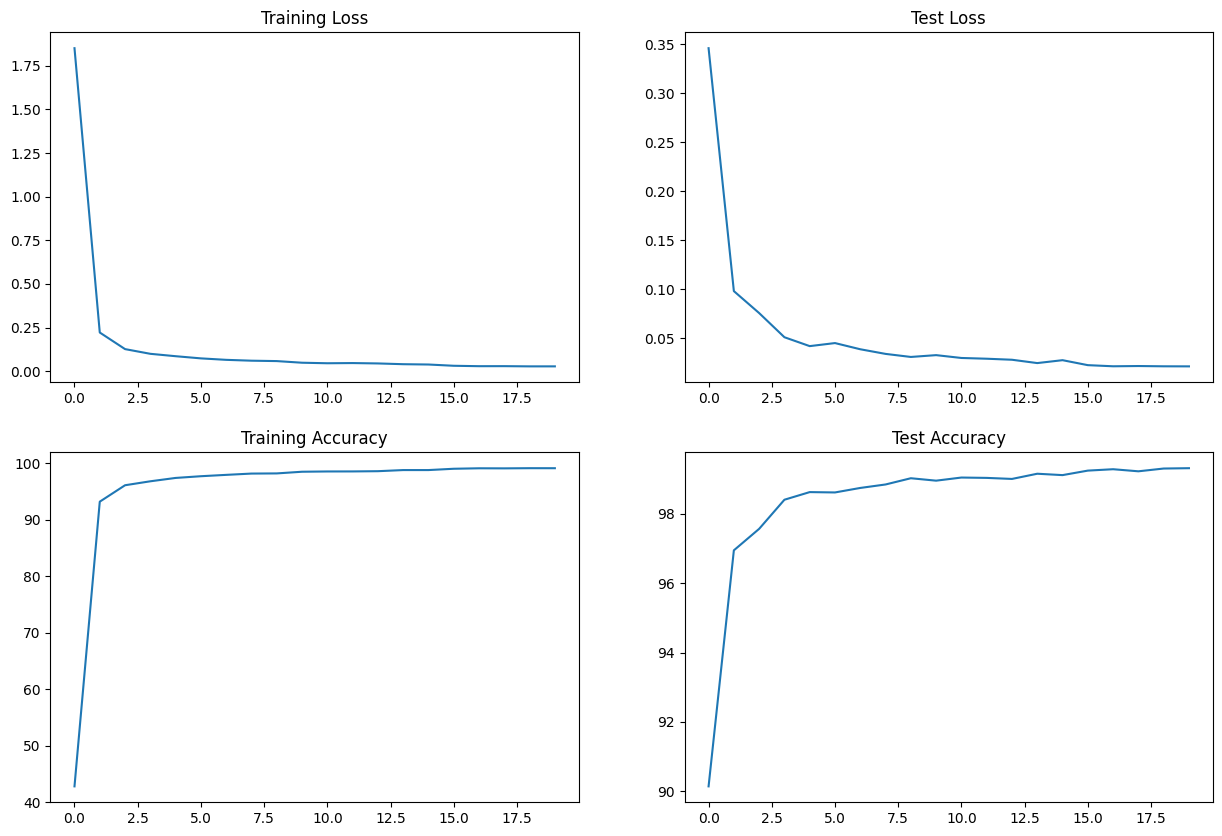

In [15]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")